# データセットの作成

## Settings

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import itertools
import math
from pprint import pprint
plt.rcParams['font.family'] = 'Hiragino Maru Gothic Pro'

In [2]:
# JCT token setting
jct_tokenId = '0x4a43540000000000000000000000000000000000000000000000000000000000'
jct_price = 1.0e+5

In [3]:
# Relative path to save data
data_relative_path = '../data/data202212/'

## Sample csv format

In [4]:
sample_create_token_df = pd.read_csv('../data/sample/csv/createToken_decode.csv')
sample_create_token_df

FileNotFoundError: [Errno 2] No such file or directory: '../../data/sample/csv/createToken_decode.csv'

In [276]:
sample_create_trading_df = pd.read_csv('../../data/sample/csv/createTrading_decode.csv')
sample_create_trading_df

,tradingId,lender,borrowerTokenIds,lenderTokenIds,borrowerTokenAmounts,lenderTokenAmounts,startTime,finishTime,rate,adjustmentToken
0,0x20221110132540000000000000000000000000000000...,0x00000000000000000000000000000000000000000000...,['0x4a4354000000000000000000000000000000000000...,['0x202211101321520000000000000000000000000000...,[10000000000],"[33333333, 33333333, 33333333]",1668054340,1668057940,100,0x4a435400000000000000000000000000000000000000...
1,0x20221110132540000000000000000000000000000000...,0x00000000000000000000000000000000000000000000...,['0x4a4354000000000000000000000000000000000000...,['0x202211101321520000000000000000000000000000...,[10000000000],"[33333333, 33333333, 33333333]",1668054340,1668057940,100,0x4a435400000000000000000000000000000000000000...
2,0x20221110132540000000000000000000000000000000...,0x00000000000000000000000000000000000000000000...,['0x4a4354000000000000000000000000000000000000...,['0x202211101321520000000000000000000000000000...,[10000000000],"[33333333, 33333333, 33333333]",1668054340,1668057940,100,0x4a435400000000000000000000000000000000000000...
3,0x20221110132540000000000000000000000000000000...,0x00000000000000000000000000000000000000000000...,['0x4a4354000000000000000000000000000000000000...,['0x202211101321520000000000000000000000000000...,[10000000000],"[33333333, 33333333, 33333333]",1668054340,1668057940,100,0x4a435400000000000000000000000000000000000000...
4,0x20221110132540000000000000000000000000000000...,0x00000000000000000000000000000000000000000000...,['0x4a4354000000000000000000000000000000000000...,['0x202211101321520000000000000000000000000000...,[10000000000],"[33333333, 33333333, 33333333]",1668054340,1668057940,100,0x4a435400000000000000000000000000000000000000...
...,...,...,...,...,...,...,...,...,...,...
8662,0x20221110132540000000000000000000000000000000...,0x00000000000000000000000000000000000000000000...,['0x4a4354000000000000000000000000000000000000...,['0x202211101321520000000000000000000000000000...,[10000000000],"[33333333, 33333333, 33333333]",1668054340,1668057940,100,0x4a435400000000000000000000000000000000000000...
8663,0x20221110132540000000000000000000000000000000...,0x00000000000000000000000000000000000000000000...,['0x4a4354000000000000000000000000000000000000...,['0x202211101321520000000000000000000000000000...,[10000000000],"[33333333, 33333333, 33333333]",1668054340,1668057940,100,0x4a435400000000000000000000000000000000000000...
8664,0x20221110132540000000000000000000000000000000...,0x00000000000000000000000000000000000000000000...,['0x4a4354000000000000000000000000000000000000...,['0x202211101321520000000000000000000000000000...,[10000000000],"[33333333, 33333333, 33333333]",1668054340,1668057940,100,0x4a435400000000000000000000000000000000000000...
8665,0x20221110132540000000000000000000000000000000...,0x00000000000000000000000000000000000000000000...,['0x4a4354000000000000000000000000000000000000...,['0x202211101321520000000000000000000000000000...,[10000000000],"[33333333, 33333333, 33333333]",1668054340,1668057940,100,0x4a435400000000000000000000000000000000000000...


In [277]:
sample_update_token_df = pd.read_csv('../../data/sample/csv/updateToken_decode.csv')
sample_update_token_df

,tokenId,price,updateTime
0,0x20221110132152000000000000000000000000000000...,9000000,1668054263
1,0x20221110132152000000000000000000000000000000...,9000000,1668054263
2,0x20221110132152000000000000000000000000000000...,9000000,1668054263
3,0x20221110132152000000000000000000000000000000...,9000000,1668054263
4,0x20221110132152000000000000000000000000000000...,9000000,1668054263
...,...,...,...
351,0x20221110132152000000000000000000000000000000...,9000000,1668054263
352,0x20221110132152000000000000000000000000000000...,9000000,1668054263
353,0x20221110132152000000000000000000000000000000...,9000000,1668054263
354,0x20221110132152000000000000000000000000000000...,9000000,1668054263


## Mock data distributions

### Number of Trade

In [349]:
ave_gc_trade_num = 438
ave_sc_trade_num = 2833
ave_bond_trade_num = 8667

stock_trade_term_list = [1, 5, 19, 60, 180, 2]
bond_trade_term_list = [1, 5, 19, 60, 180]
stock_trade_term_percent_list = [0.24, 0.38, 0.07, 0.02, 0.05, 0.24]
bond_trade_term_percent_list = [0.37, 0.15, 0.29, 0.16, 0.04]

max_gc_trade_num = math.ceil(np.dot(np.array(stock_trade_term_list), np.array(stock_trade_term_percent_list)) * ave_gc_trade_num)
max_sc_trade_num = math.ceil(np.dot(np.array(stock_trade_term_list), np.array(stock_trade_term_percent_list)) * ave_sc_trade_num)
max_bond_trade_num = math.ceil(np.dot(np.array(bond_trade_term_list), np.array(bond_trade_term_percent_list)) * ave_bond_trade_num)
print('max gc num: ', max_gc_trade_num)
print('max sc num: ', max_sc_trade_num)
print('max bond num: ', max_bond_trade_num)


max gc num:  6198
max sc num:  40087
max bond num:  203068


In [498]:
trade_nums = [
    {
        'gc': 438,
        'sc': 2833,
        'bond': 8667,
    },
    {
        'gc': 1000,
        'sc': 7500,
        'bond': 25000,
    },
    {
        'gc': 2500,
        'sc': 20000,
        'bond': 75000,
    },
    {
        'gc': 6500,
        'sc': 41000,
        'bond': 204000,
    },
]

### Price

#### 株レポGC取引

株レポGC取引: 
             10億円以内         10億円超        100億円超        500億円超
ratio  1.500000e-01  6.000000e-01  2.000000e-01  5.000000e-02
min    1.000000e+08  1.000000e+09  1.000000e+10  5.000000e+10
max    1.000000e+09  1.000000e+10  5.000000e+10  1.000000e+11


<AxesSubplot:title={'center':'株レポGC取引: 概観'}>

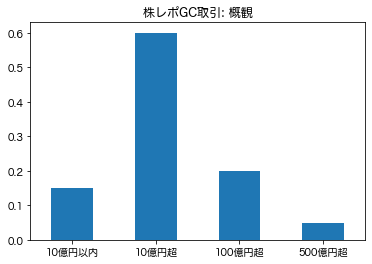

In [278]:
gc_price_column_labels = ['10億円以内', '10億円超', '100億円超', '500億円超']
gc_price_dist = pd.DataFrame([[0.15, 0.6, 0.2, 0.05], [1.0e+8, 1.0e+9, 1.0e+10, 5.0e+10], [1.0e+9, 1.0e+10, 5.0e+10, 1.0e+11]],
                             columns=gc_price_column_labels,
                             index=['ratio', 'min', 'max'])
gc_price_ave = 81.5e+8
print('株レポGC取引: ')
pprint(gc_price_dist)
print('='*50)

plt.title('株レポGC取引: 概観')
gc_price_dist.T['ratio'].plot(kind='bar', rot=0)

Text(0.5, 1.0, '株レポGC取引: ヒストグラム')

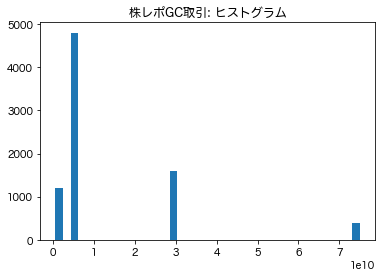

In [279]:
gc_trade_num = 8000
gc_ave_price_list = (gc_price_dist.T['min'] + gc_price_dist.T['max']) / 2
gc_sample = [[ave]*int(gc_price_dist.T['ratio'][index] * gc_trade_num)  for (index, ave) in enumerate(gc_ave_price_list)]

plt.hist(list(itertools.chain.from_iterable(gc_sample)), bins=40)
plt.title('株レポGC取引: ヒストグラム')

In [606]:
def get_gc_price_df(trade_num):
    gc_price_max = gc_price_dist['500億円超']['max']
    gc_price_min = gc_price_dist['10億円以内']['min']
    mock_gc_price_df = pd.DataFrame(np.random.triangular(gc_price_min, gc_price_ave, gc_price_max, trade_num)) * 1.0e+5
    mock_gc_price_df.hist(bins=100, figsize=(30, 20), xlabelsize=20, ylabelsize=20)
    plt.title(f'株レポGC取引: 擬似データ分布（三角分布, {trade_num}件）', fontsize=24)
    return mock_gc_price_df

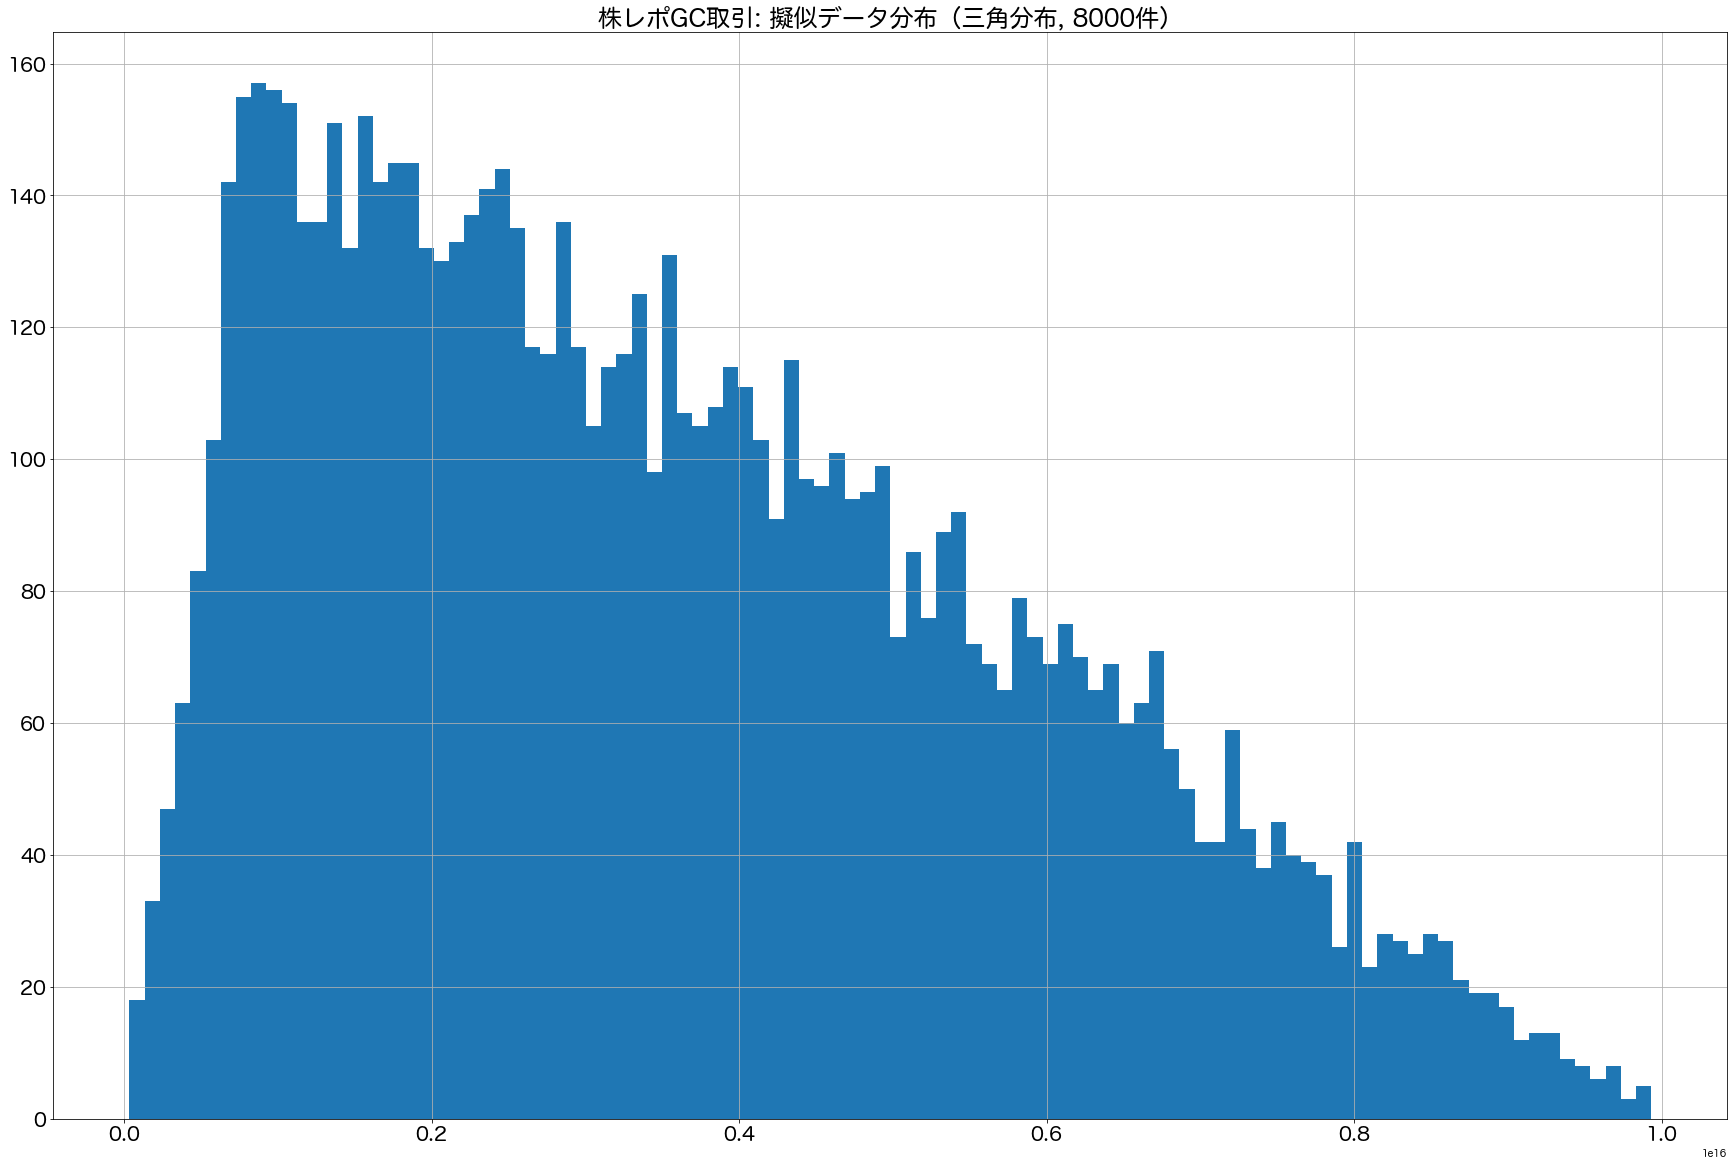

In [607]:
# 三角分布で類似分布を作成
# gc_price_max = gc_price_dist['500億円超']['max']
# gc_price_min = gc_price_dist['10億円以内']['min']
# mock_gc_price_df = pd.DataFrame(np.random.triangular(gc_price_min, gc_price_ave, gc_price_max, gc_trade_num)) * 1.0e+5
# mock_gc_price_df.hist(bins=100, figsize=(30, 20))
# plt.title('株レポGC取引: 擬似データ分布（三角分布）')
mock_gc_trade_8000_df = get_gc_price_df(gc_trade_num)

,0
0,4.047570e+15
1,4.668514e+15
2,3.789219e+15
3,1.655888e+15
4,4.295076e+15
...,...
433,8.478780e+15
434,8.202687e+15
435,1.611131e+15
436,4.533984e+14


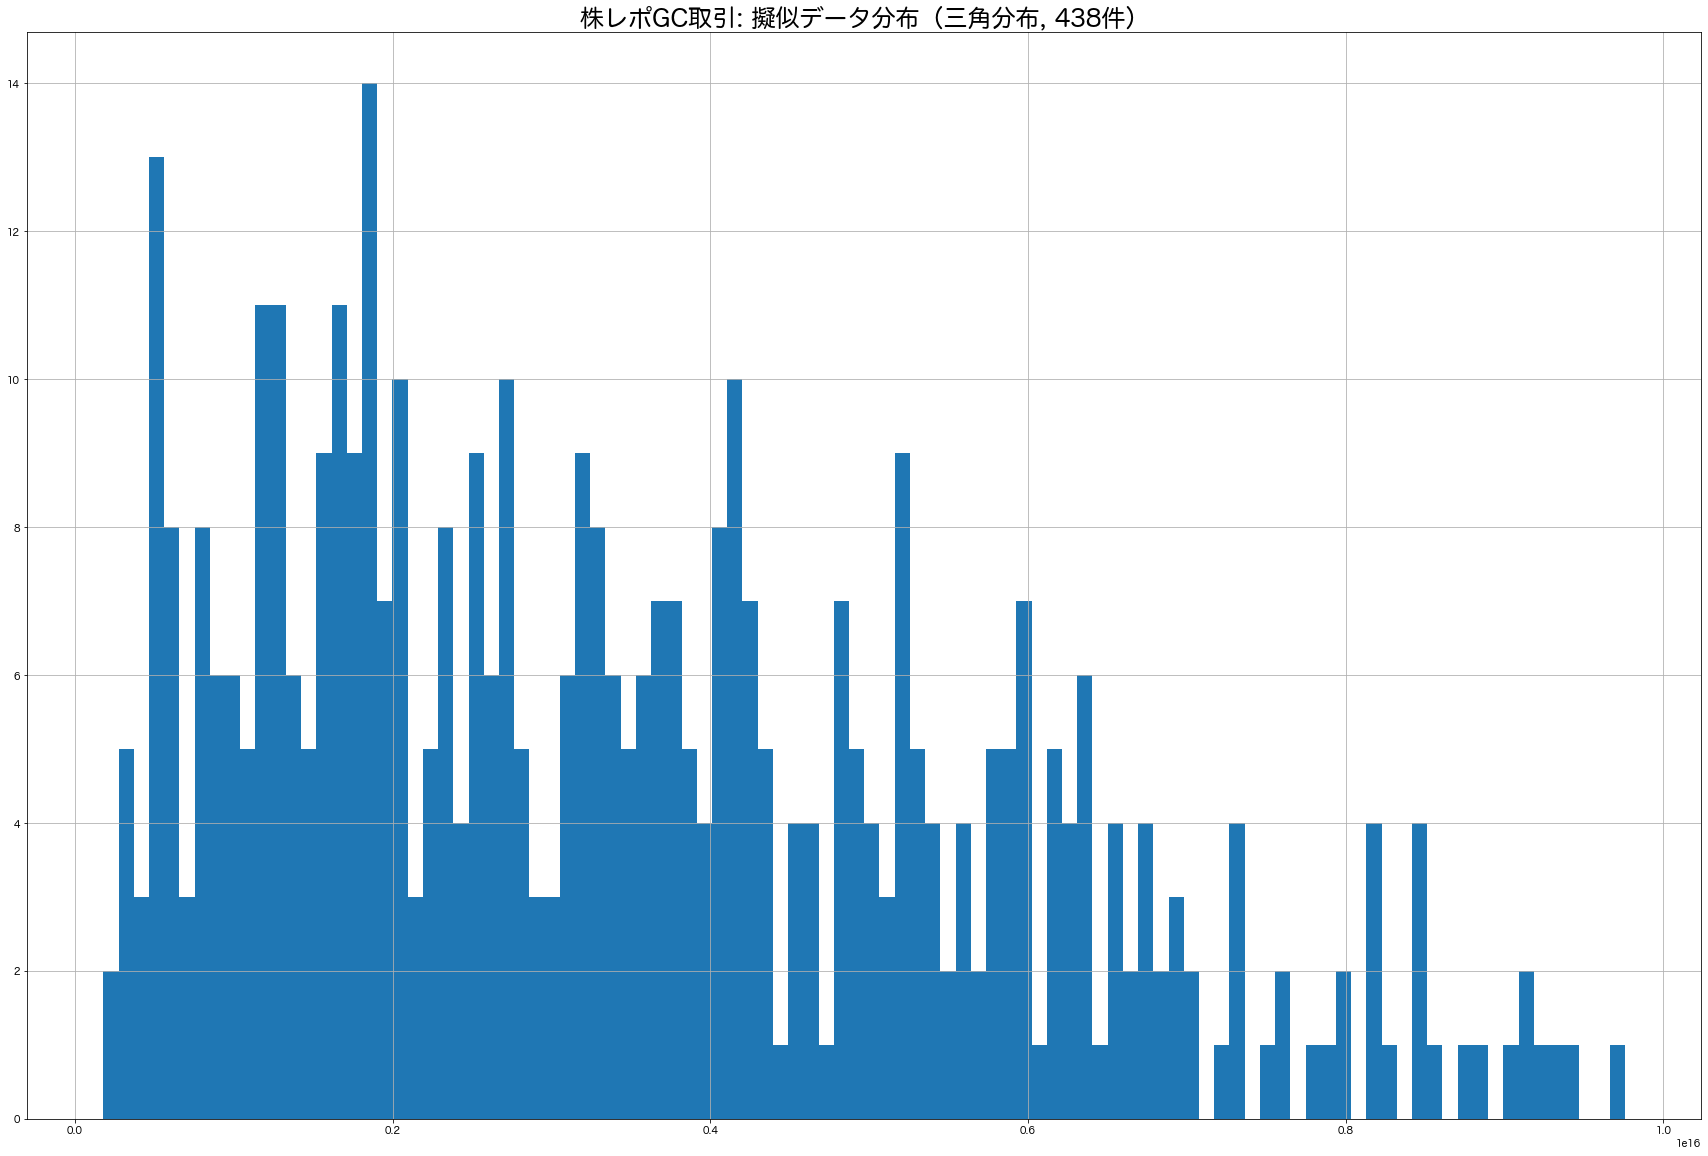

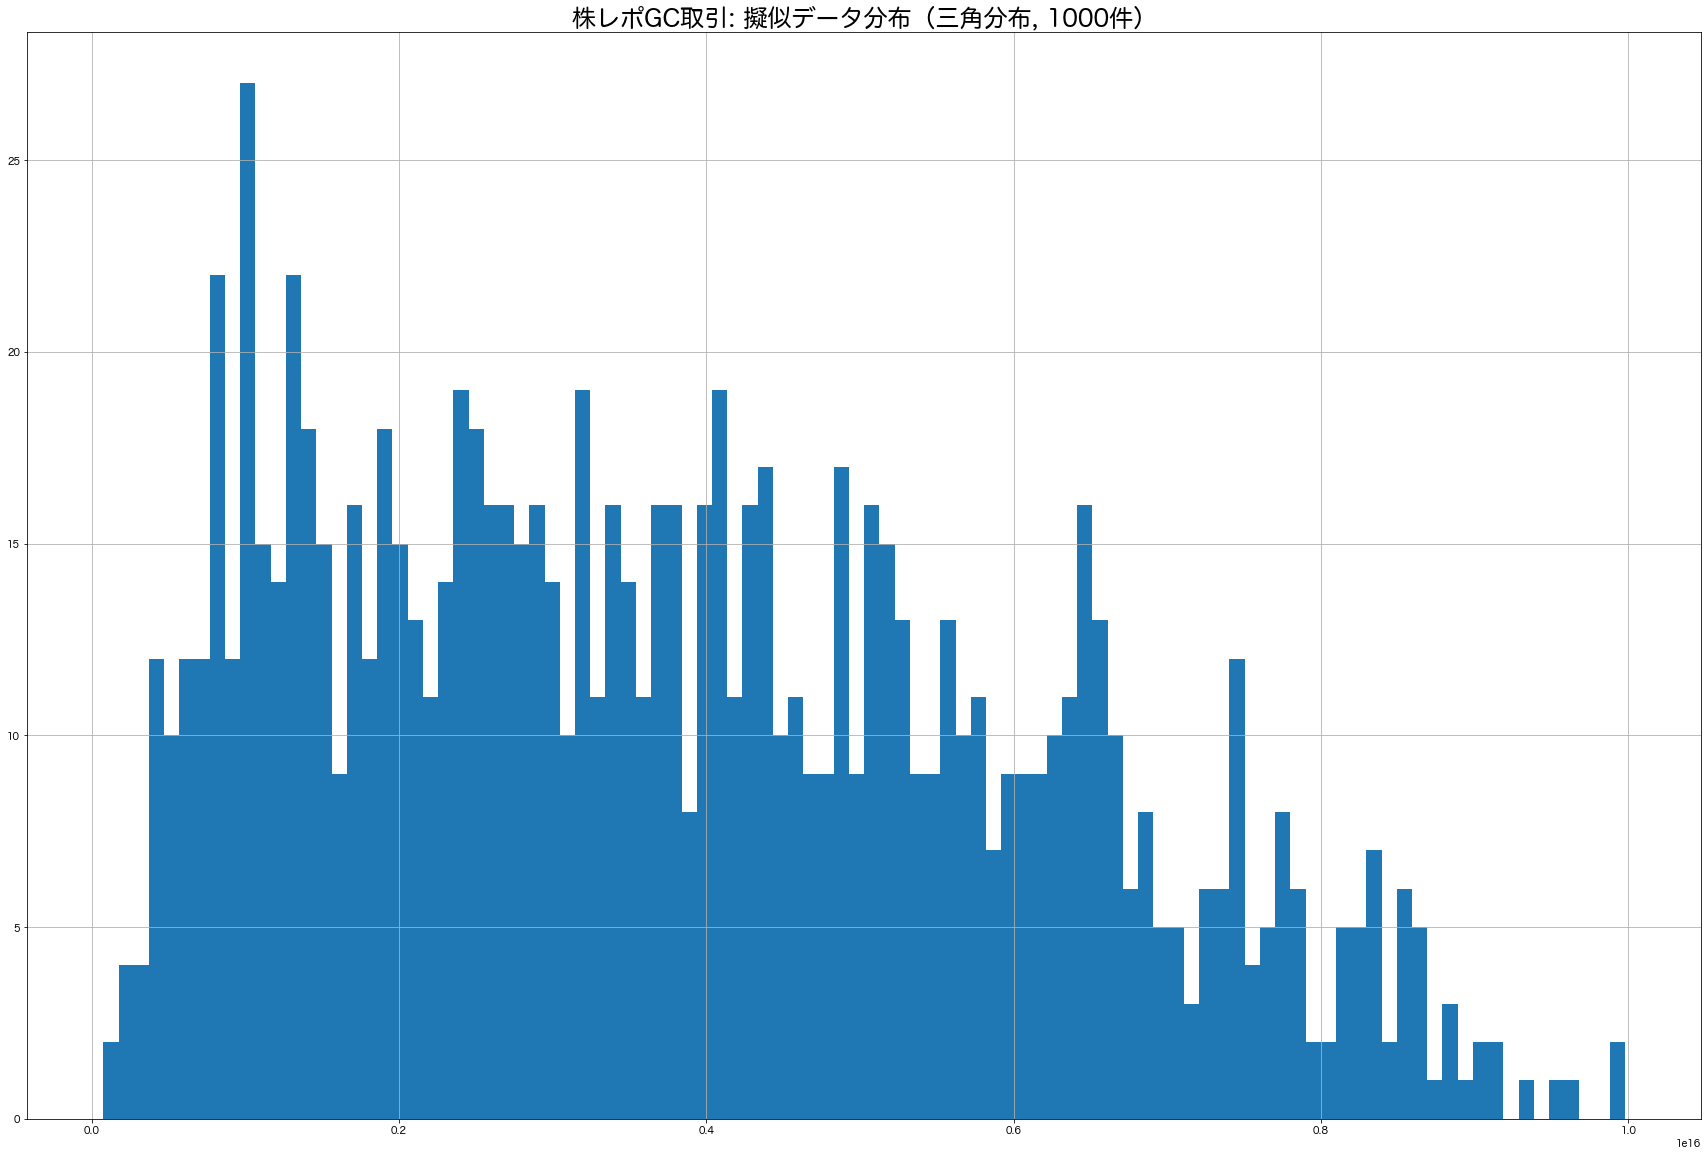

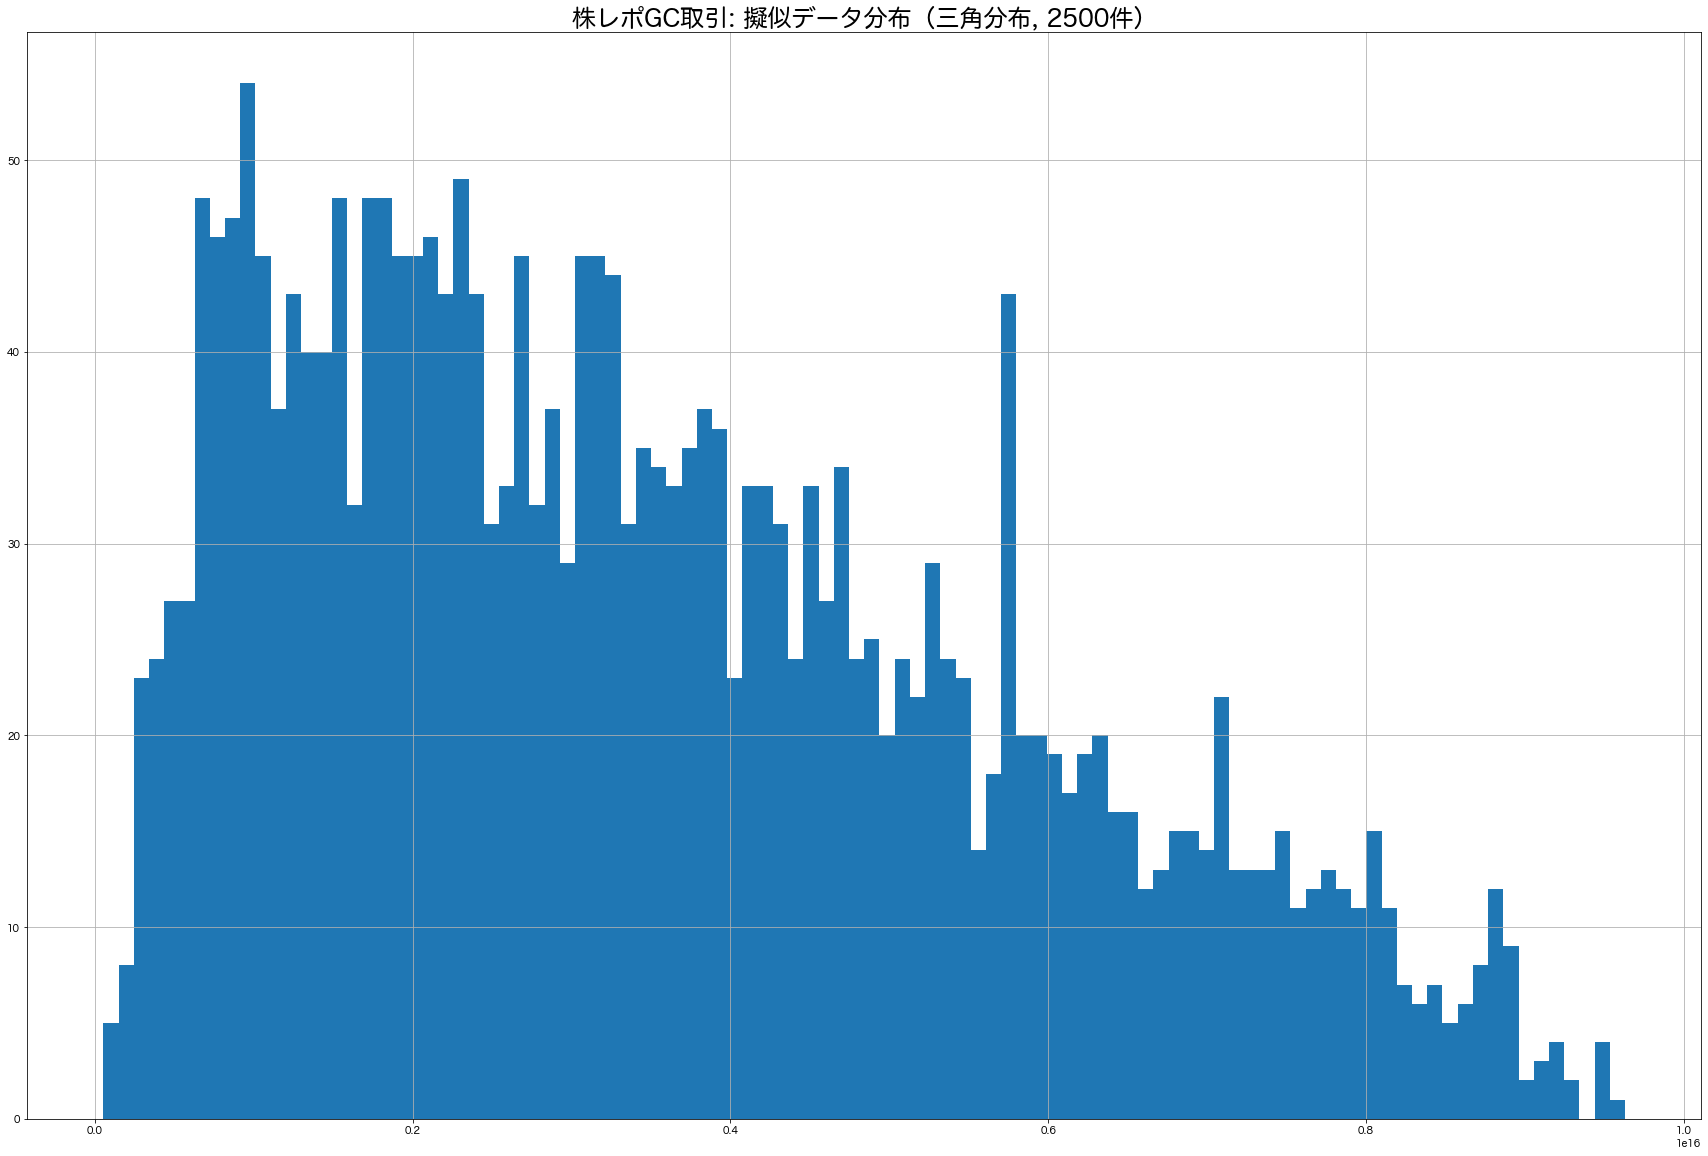

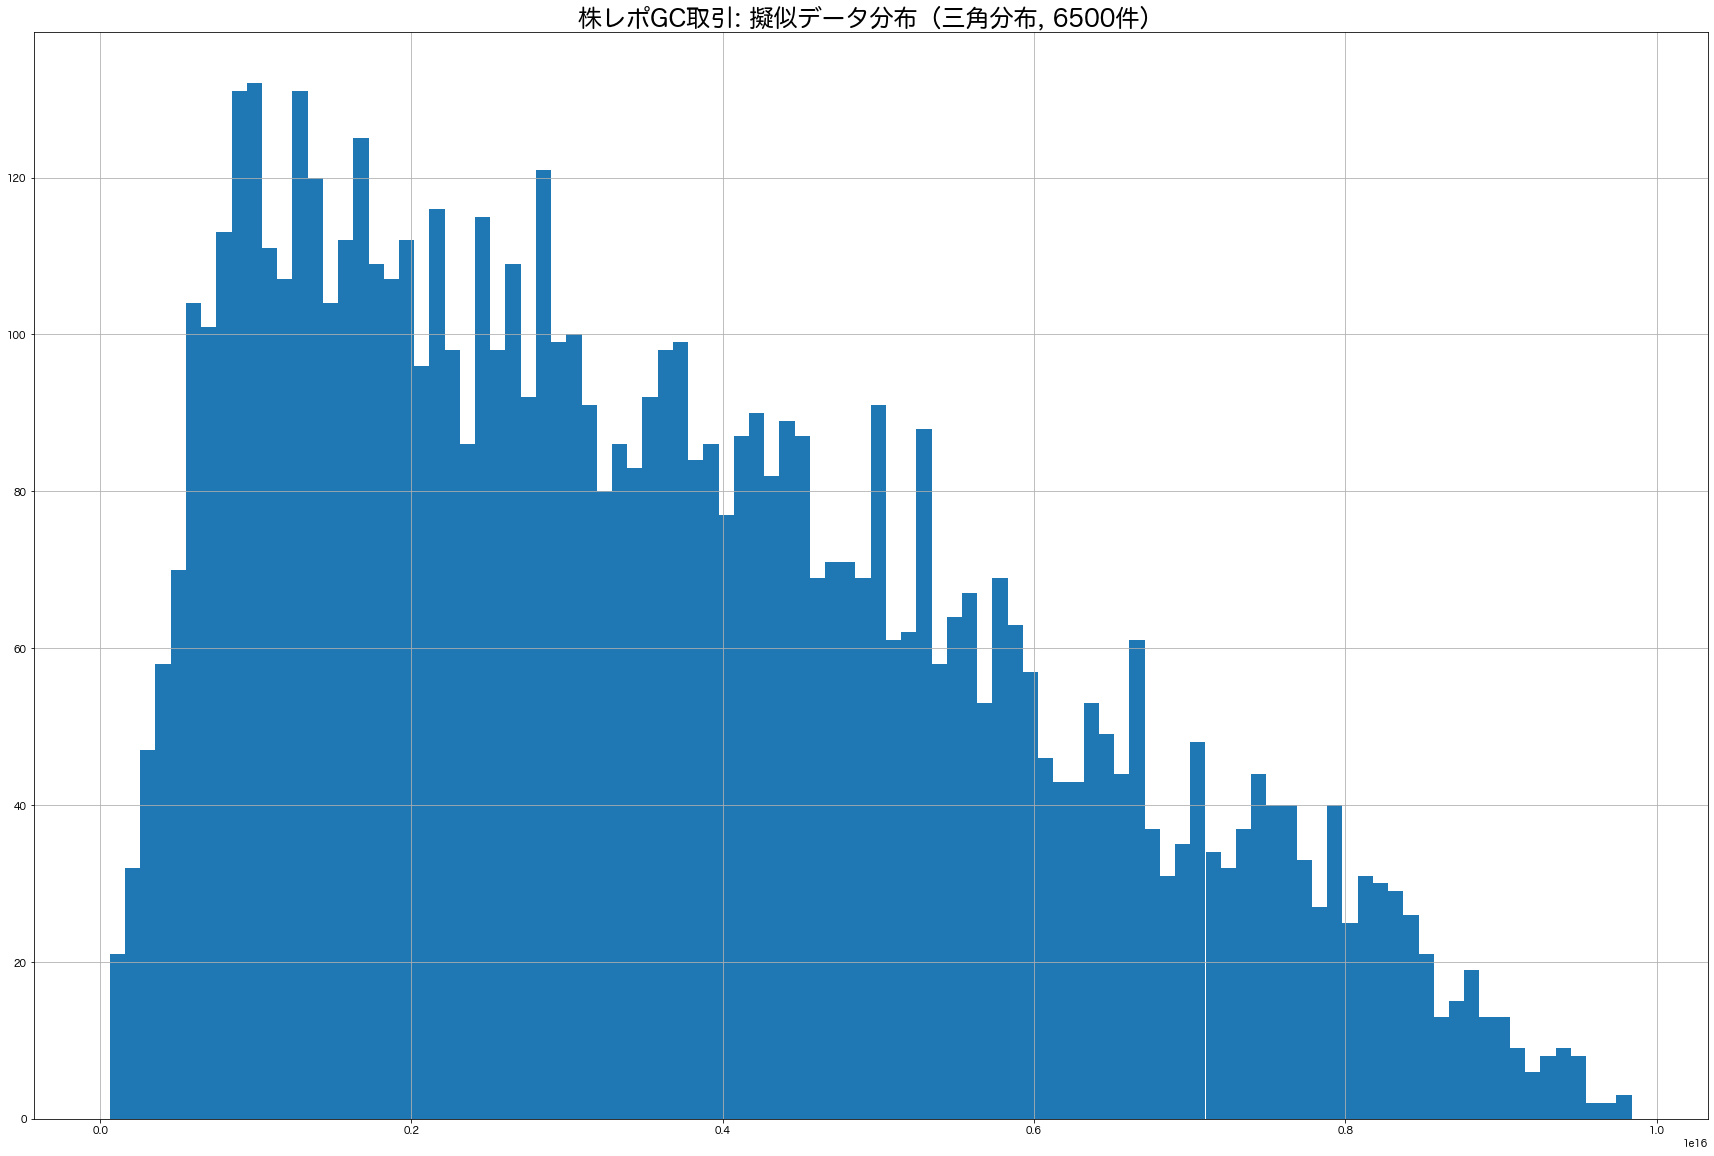

In [495]:
gc_price_dfs = []
for obj in trade_nums:
    _num = obj['gc']
    gc_price_dfs.append(get_gc_price_df(_num))
gc_price_dfs[0]

#### 株レポSC取引

株レポ: SC取引金額
              1億円以内          1億円超          2億円超          5億円超         10億円超
ratio  7.400000e-01  9.000000e-02  1.100000e-01  4.000000e-02  2.000000e-02
min    1.000000e+03  1.000000e+08  2.000000e+08  5.000000e+08  1.000000e+09
max    1.000000e+08  2.000000e+08  5.000000e+08  1.000000e+09  1.000000e+10
株レポ: SC取引金額概観


<AxesSubplot:>

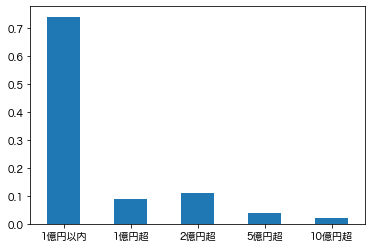

In [364]:
sc_price_column_labels = ['1億円以内', '1億円超', '2億円超', '5億円超', '10億円超']
sc_price_dist = pd.DataFrame([[0.74, 0.09, 0.11, 0.04, 0.02], [1.0e+3, 1.0e+8, 2.0e+8, 5.0e+8, 1.0e+9], [1.0e+8, 2.0e+8, 5.0e+8, 1.0e+9, 1.0e+10]],
                             columns=sc_price_column_labels,
                             index=['ratio', 'min', 'max'])
sc_price_ave = 1.34e+8
print('株レポ: SC取引金額')
pprint(sc_price_dist)
print('='*50)
print('株レポ: SC取引金額概観')
sc_price_dist.T['ratio'].plot(kind='bar', rot=0)

株レポ: SC取引金額ヒストグラム


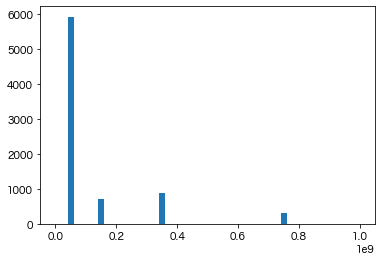

In [283]:
sc_trade_num = 8000
sc_ave_price_list = (sc_price_dist.T['min'] + sc_price_dist.T['max']) / 2
sc_sample = [[ave]*int(sc_price_dist.T['ratio'][index] * sc_trade_num)  for (index, ave) in enumerate(sc_ave_price_list)]
plt.hist(list(itertools.chain.from_iterable(sc_sample)), bins=50, range=(0, 1.0e+9))
print('株レポ: SC取引金額ヒストグラム')

In [365]:
def get_sc_price_df(trade_num):
    sc_price_max = sc_price_dist['10億円超']['max']
    sc_price_min = sc_price_dist['1億円以内']['min']
    mock_sc_price_df = pd.DataFrame(np.random.triangular(sc_price_min, sc_price_ave, sc_price_max, trade_num)) * 1.0e+5
    mock_sc_price_df.hist(bins=100, figsize=(30, 20))
    plt.title(f'株レポSC取引: 擬似データ分布（三角分布, {trade_num}件）', fontsize=24)
    return mock_sc_price_df

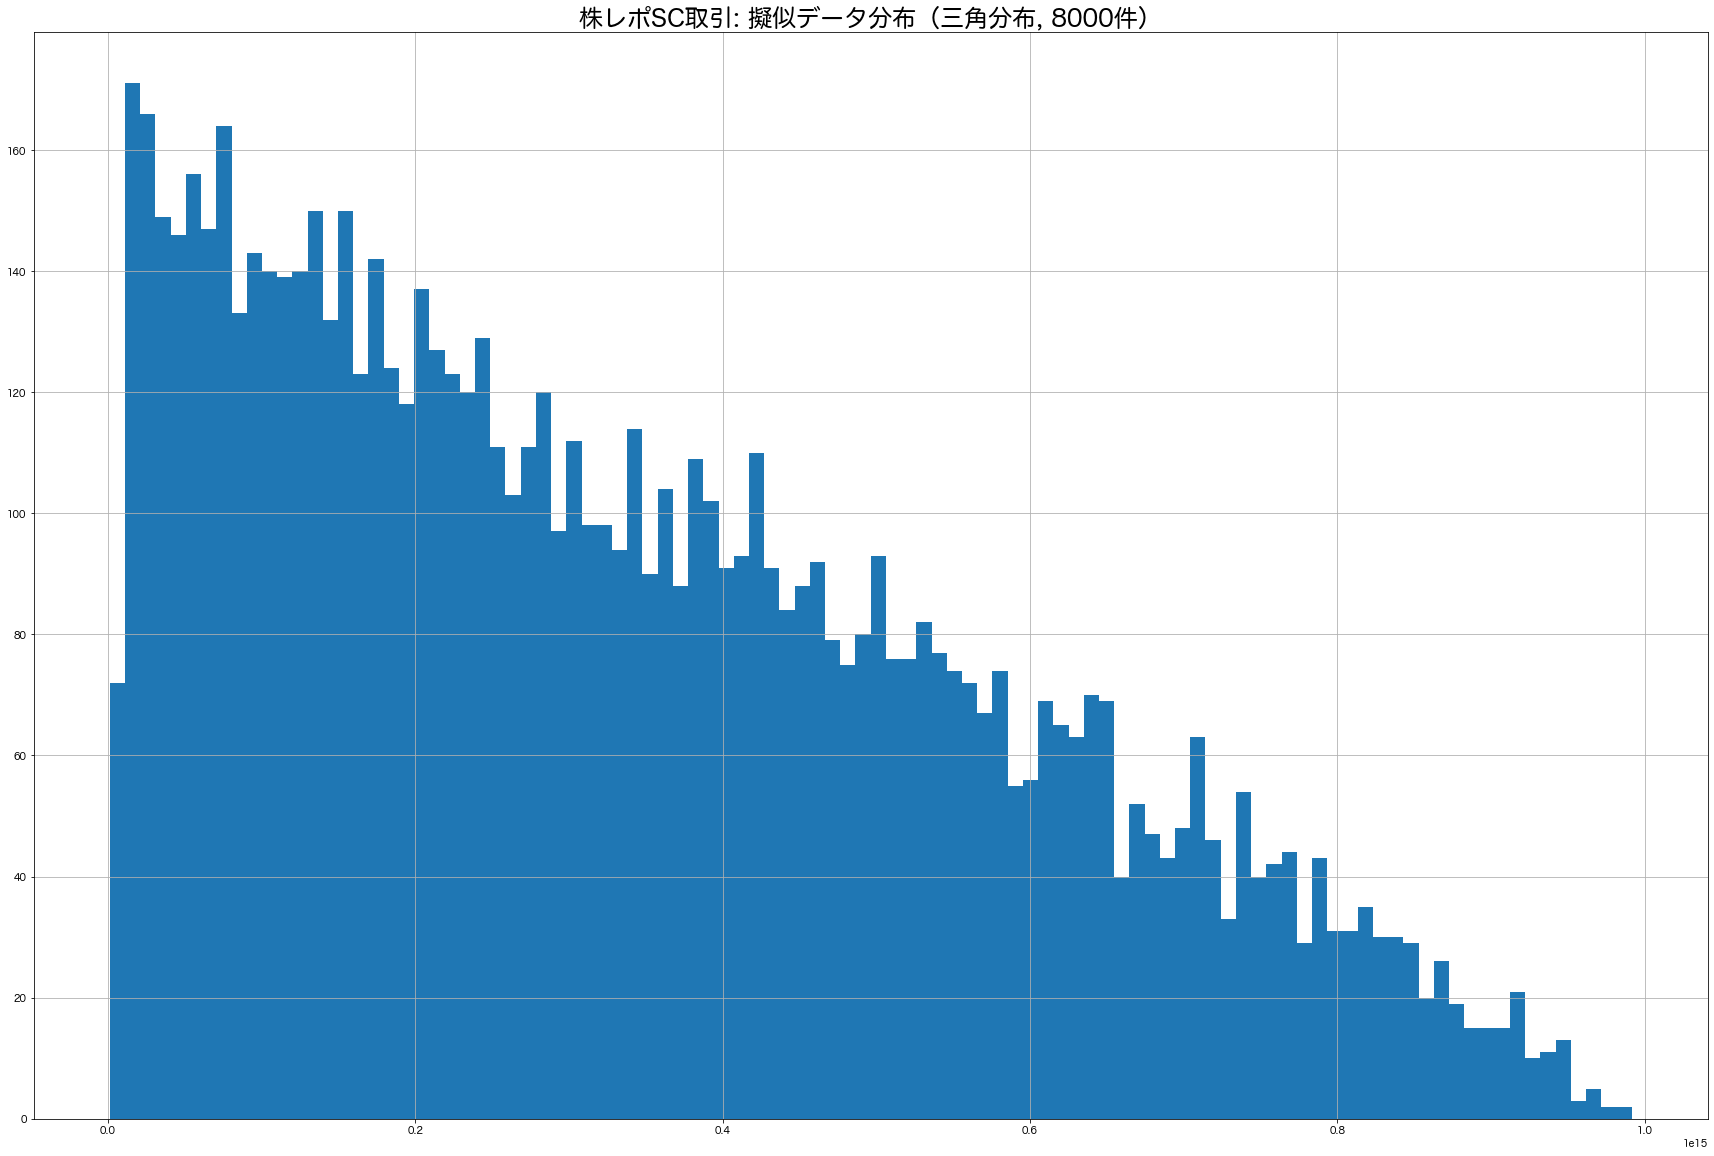

In [367]:
mock_sc_trade_8000_df = get_sc_price_df(sc_trade_num)

,0
0,3.193971e+14
1,2.112846e+14
2,2.421905e+14
3,7.206996e+14
4,1.280579e+14
...,...
2828,1.904751e+14
2829,2.777551e+14
2830,2.508794e+14
2831,3.355579e+14


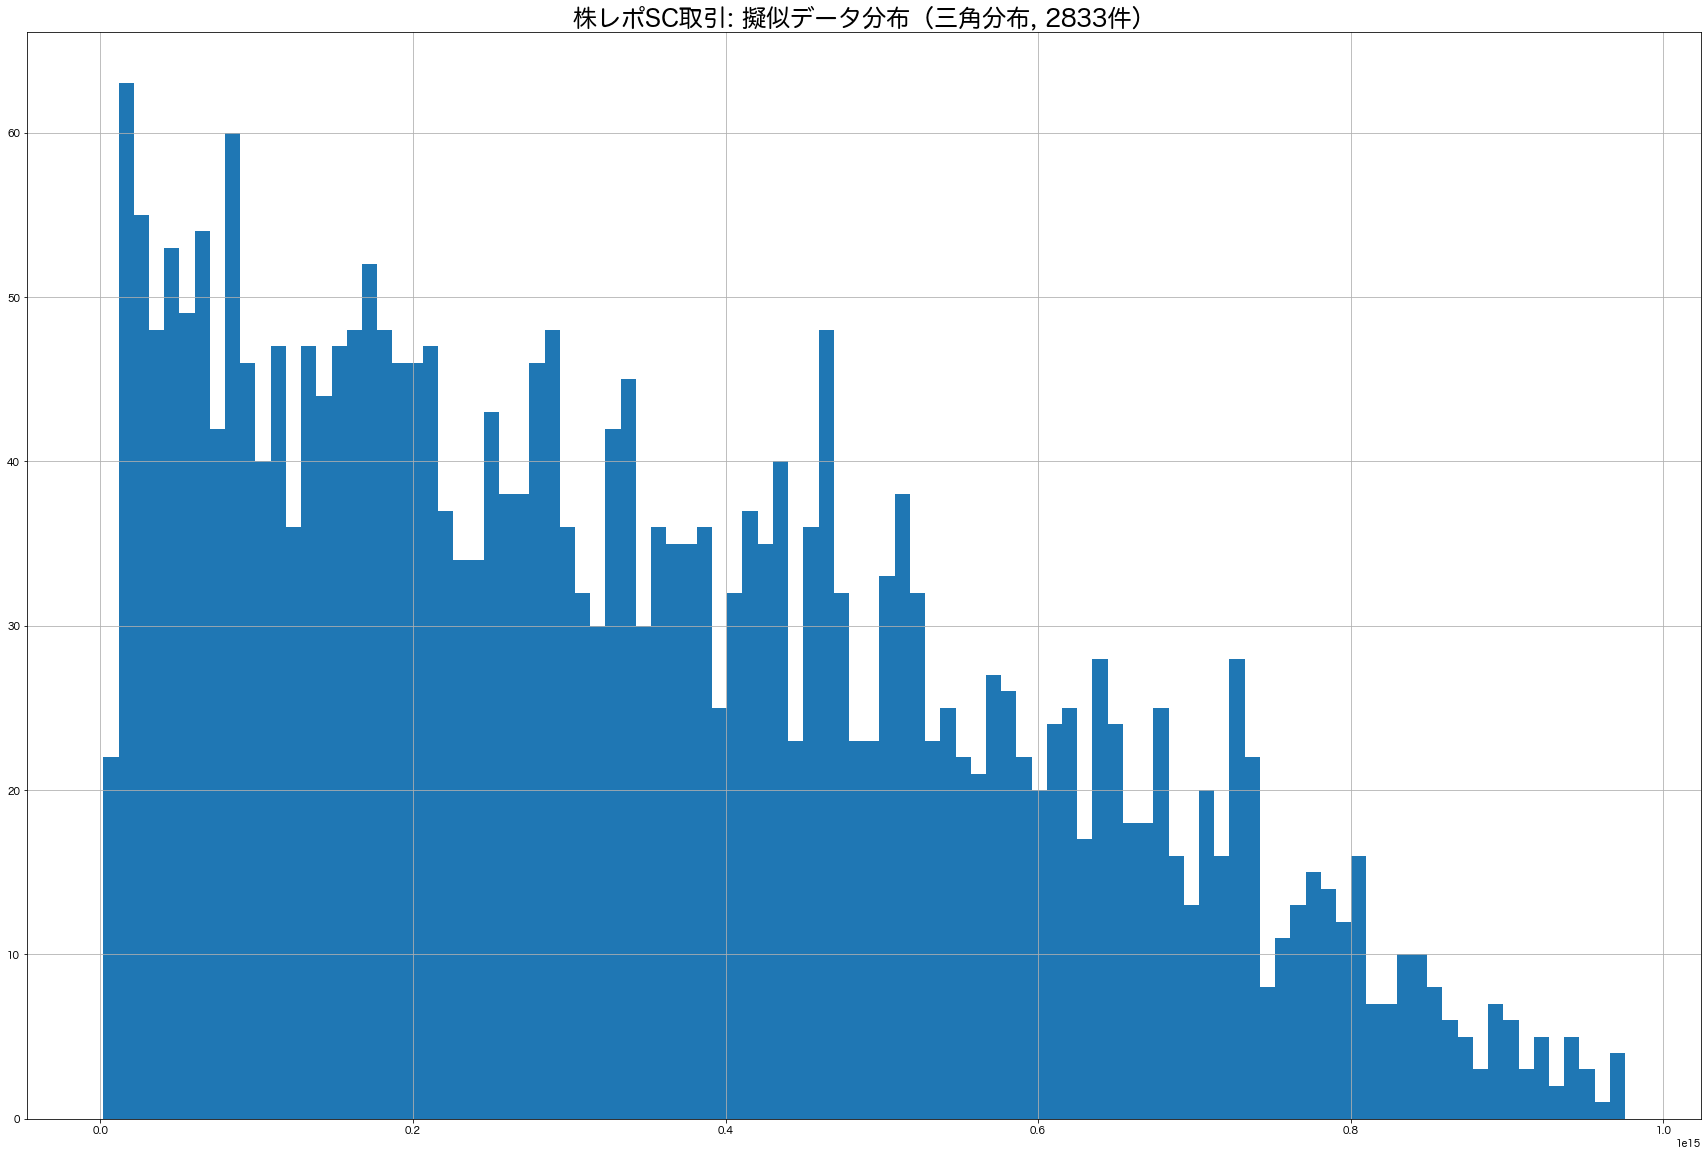

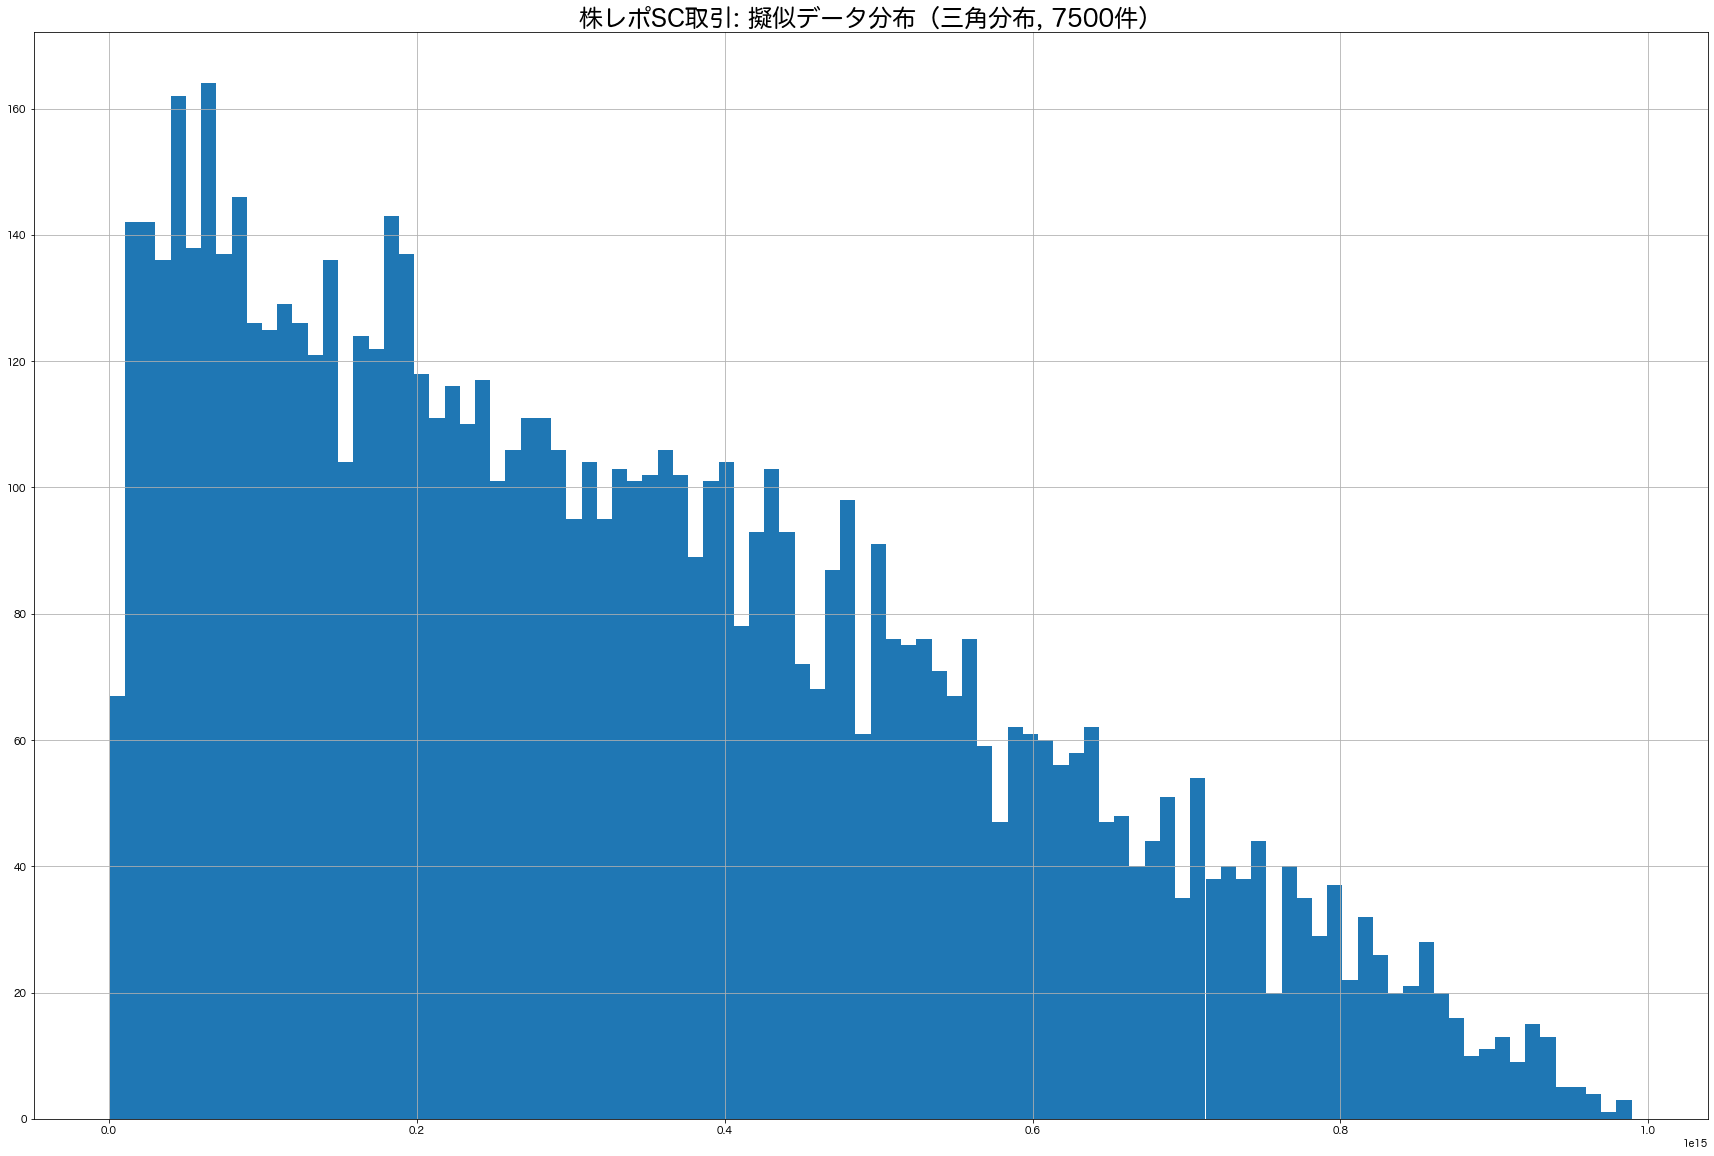

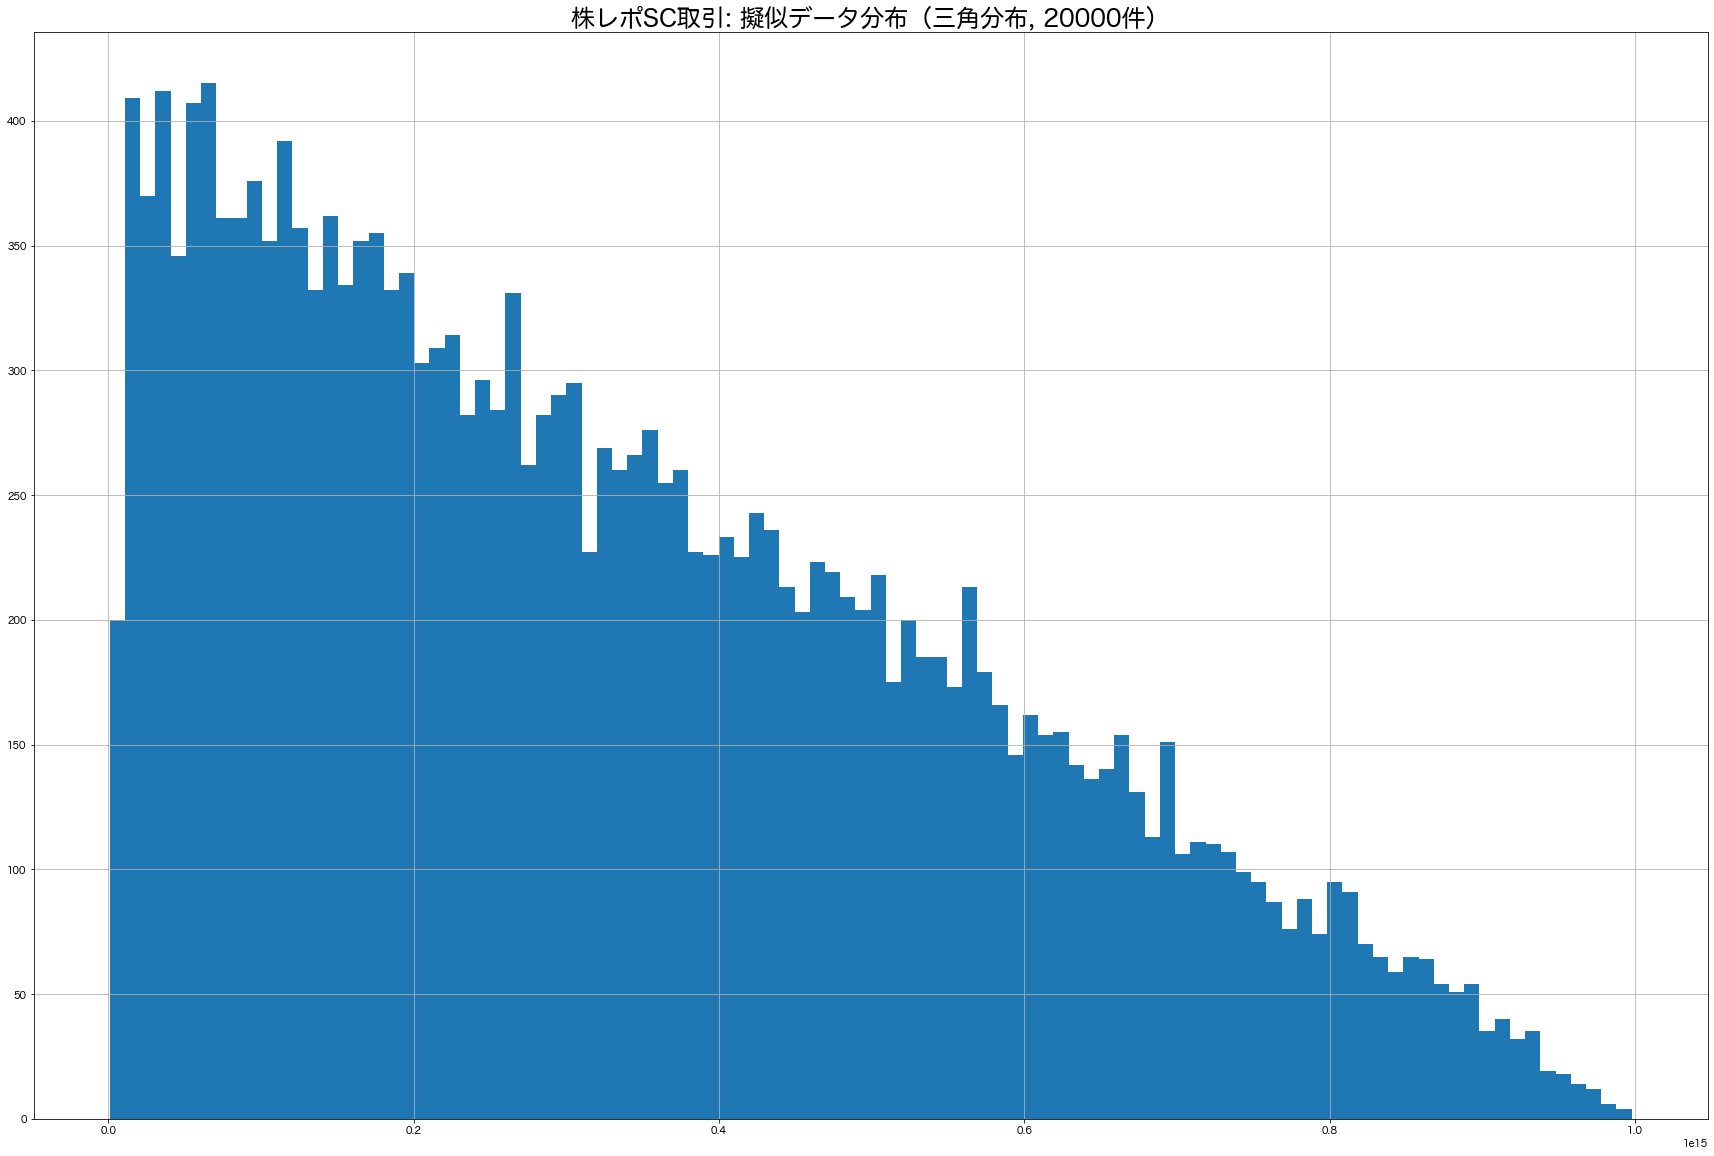

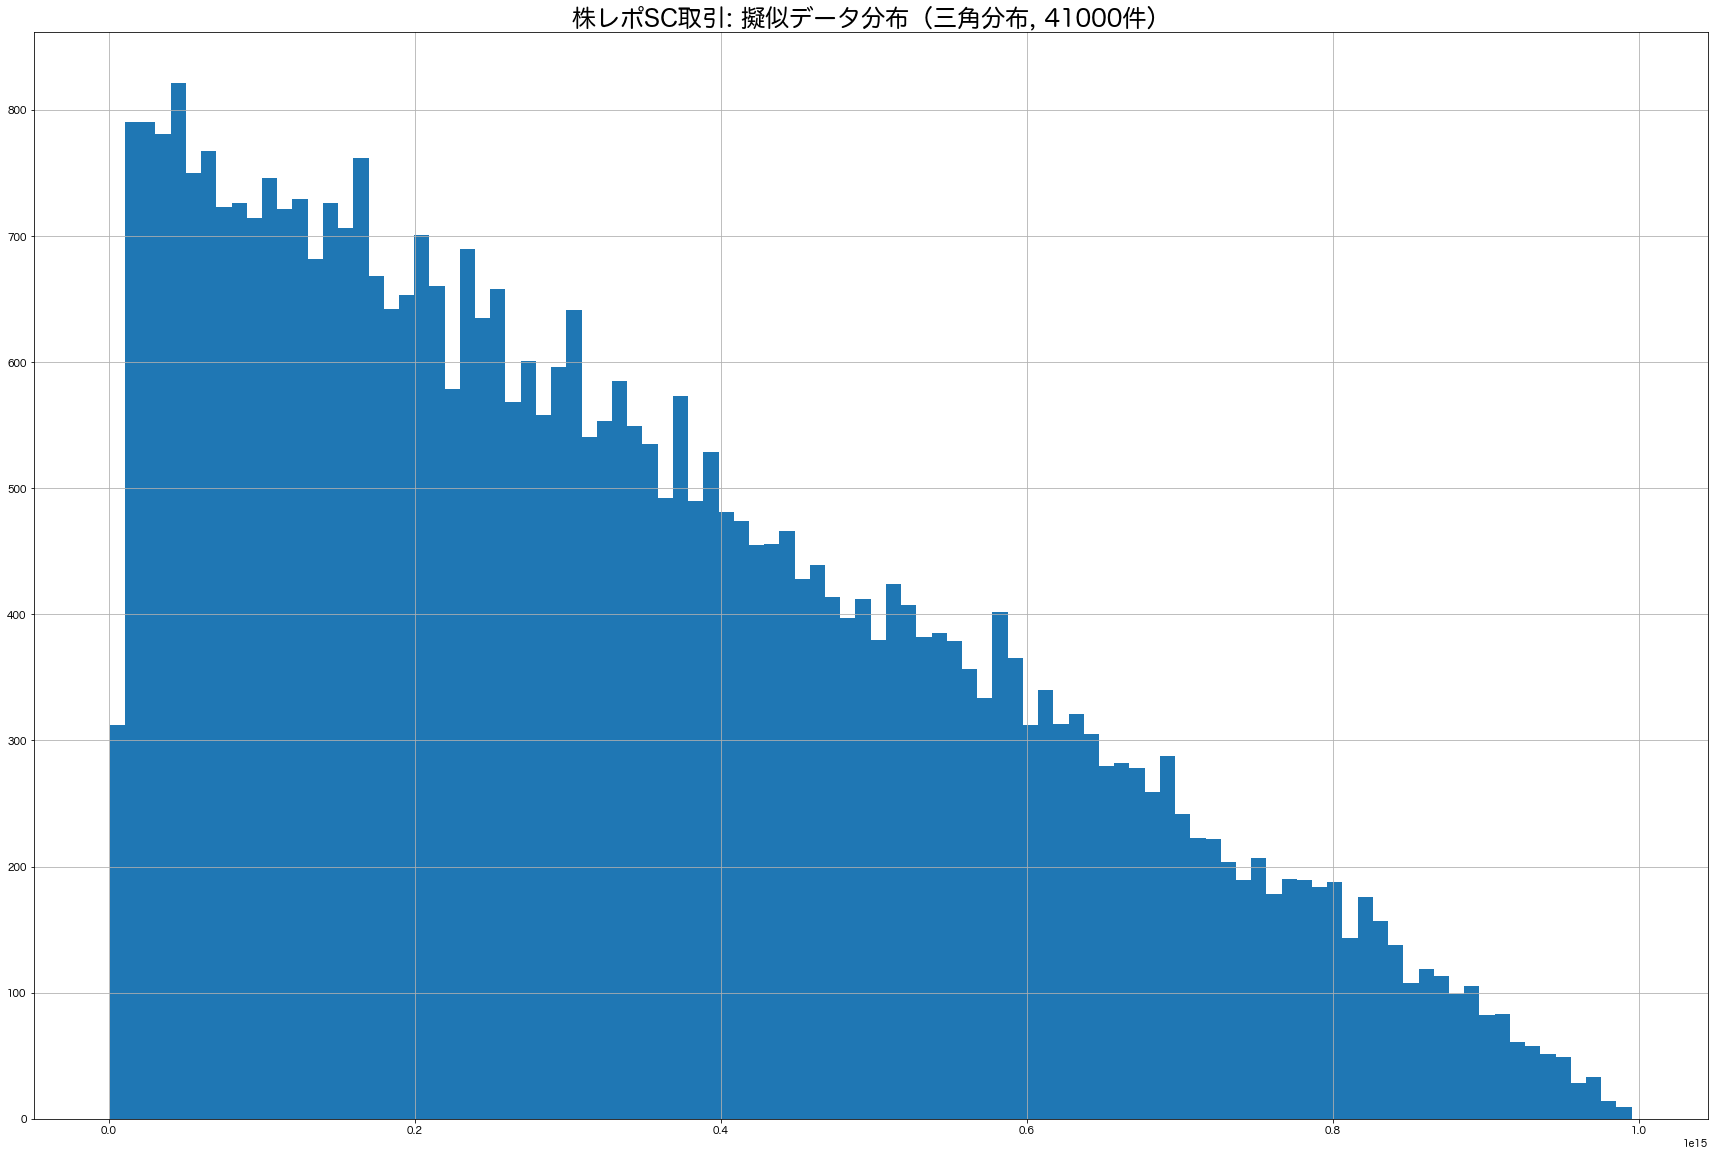

In [496]:
sc_price_dfs = []
for obj in trade_nums:
    _num = obj['sc']
    sc_price_dfs.append(get_sc_price_df(_num))
sc_price_dfs[0]

#### 債券

債券レポ取引: 
             10億円以内         10億円超         50億円超        100億円超        500億円超
ratio  1.200000e-01  3.100000e-01  1.900000e-01  3.100000e-01  7.000000e-02
min    1.000000e+08  1.000000e+09  5.000000e+09  1.000000e+10  5.000000e+10
max    1.000000e+09  5.000000e+09  1.000000e+10  5.000000e+10  5.000000e+11


<AxesSubplot:title={'center':'債券レポ取引: 概観'}>

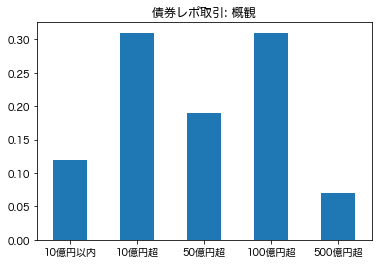

In [337]:
bond_price_column_labels = ['10億円以内', '10億円超', '50億円超', '100億円超', '500億円超']
bond_price_dist = pd.DataFrame([[0.12, 0.31, 0.19, 0.31, 0.07], [1.0e+8, 1.0e+9, 5.0e+9, 1.0e+10, 5.0e+10], [1.0e+9, 5.0e+9, 1.0e+10, 5.0e+10, 5.0e+11]],
                             columns=bond_price_column_labels,
                             index=['ratio', 'min', 'max'])
bond_price_ave = 113.0e+8
print('債券レポ取引: ')
pprint(bond_price_dist)
print('='*50)

plt.title('債券レポ取引: 概観')
bond_price_dist.T['ratio'].plot(kind='bar', rot=0)

債券レポ: 取引金額ヒストグラム


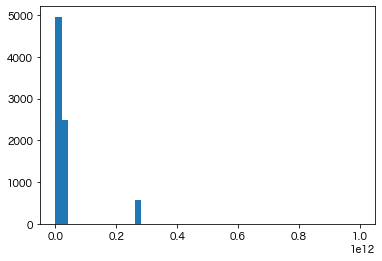

In [372]:
bond_trade_num = 8000
bond_ave_price_list = (bond_price_dist.T['min'] + bond_price_dist.T['max']) / 2
bond_sample = [[ave]*int(bond_price_dist.T['ratio'][index] * bond_trade_num)  for (index, ave) in enumerate(bond_ave_price_list)]
plt.hist(list(itertools.chain.from_iterable(bond_sample)), bins=50, range=(0, 1.0e+12))
print('債券レポ: 取引金額ヒストグラム')

In [373]:
def get_bond_price_df(trade_num):
    bond_price_max = bond_price_dist['500億円超']['max']
    bond_price_min = bond_price_dist['10億円以内']['min']
    mock_bond_price_df = pd.DataFrame(np.random.triangular(bond_price_min, bond_price_ave, bond_price_max, trade_num)) * 1.0e+5
    mock_bond_price_df.hist(bins=100, figsize=(30, 20))
    plt.title(f'債券レポ取引: 擬似データ分布（三角分布, {trade_num}件）', fontsize=24)
    return mock_bond_price_df

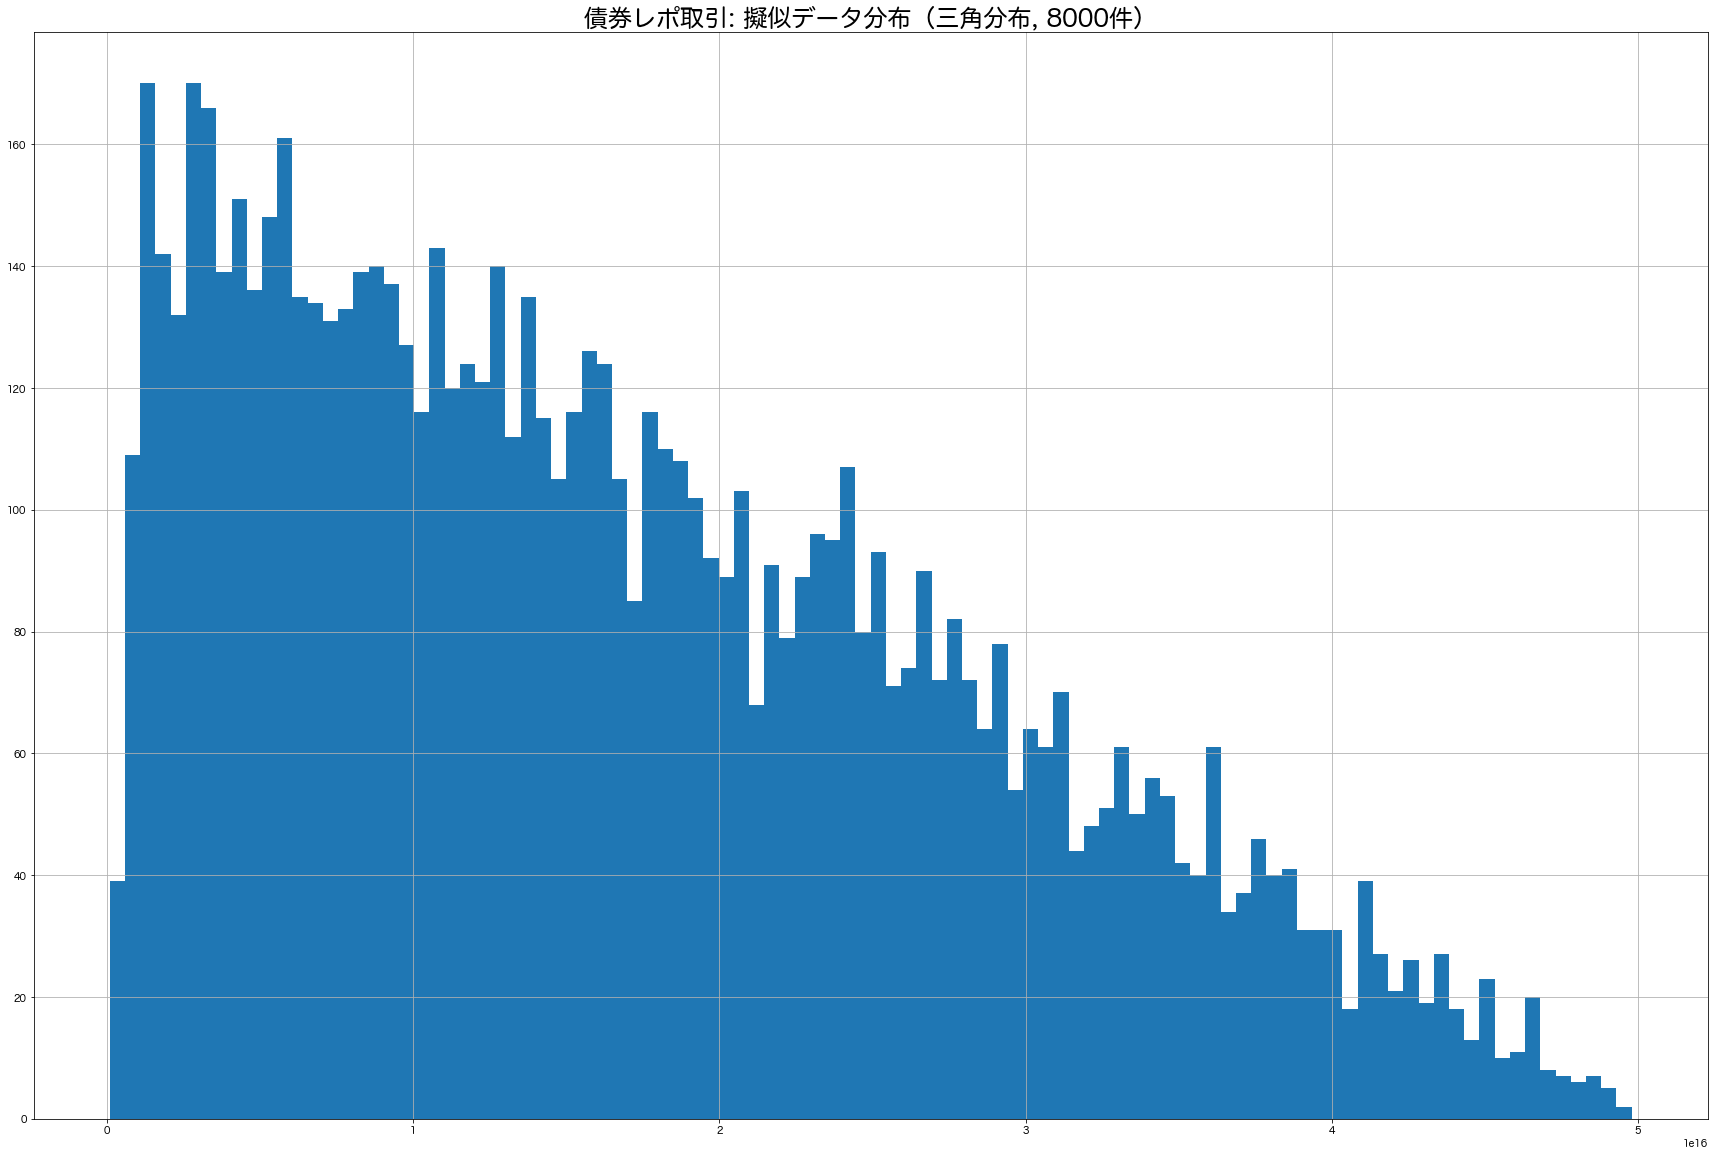

In [374]:
mock_bond_trade_8000_df = get_bond_price_df(bond_trade_num)

,0
0,4.077196e+16
1,7.981446e+15
2,2.309504e+16
3,1.508683e+16
4,3.406734e+15
...,...
8662,1.766645e+16
8663,2.267965e+16
8664,1.108946e+16
8665,2.782007e+16


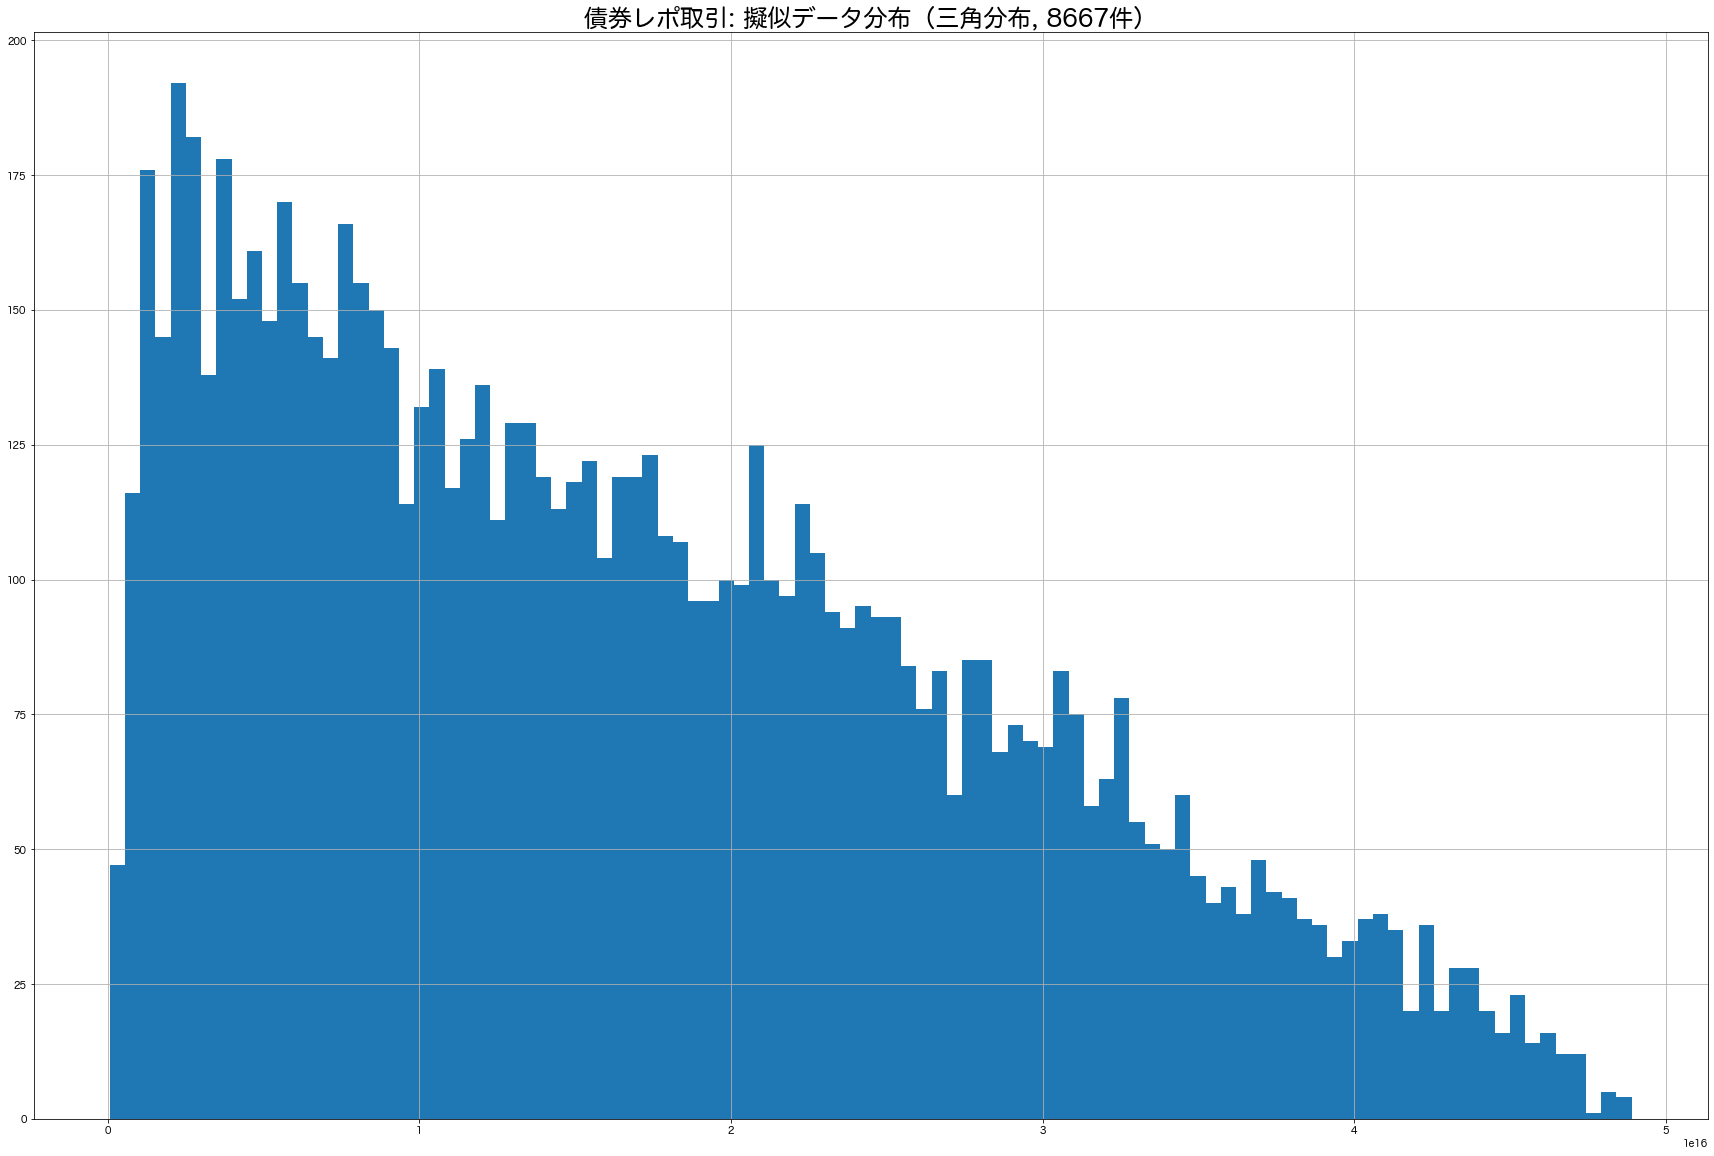

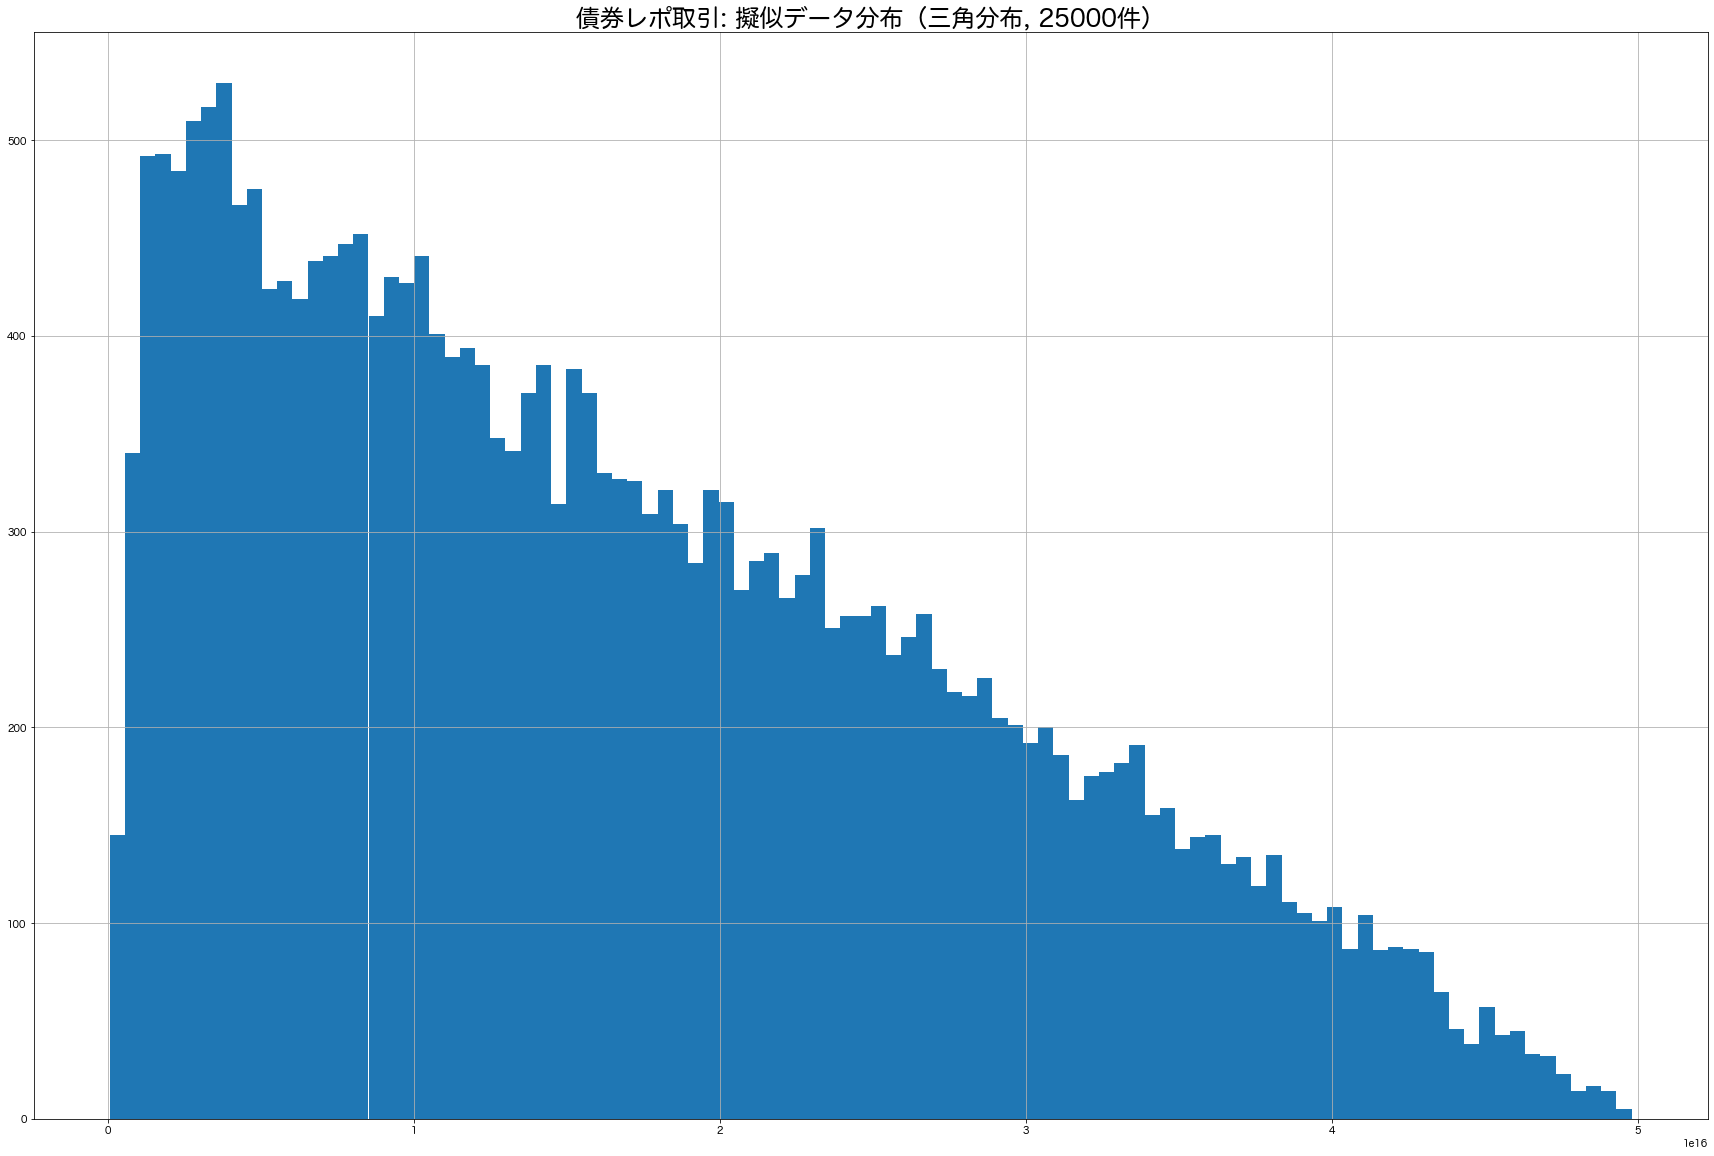

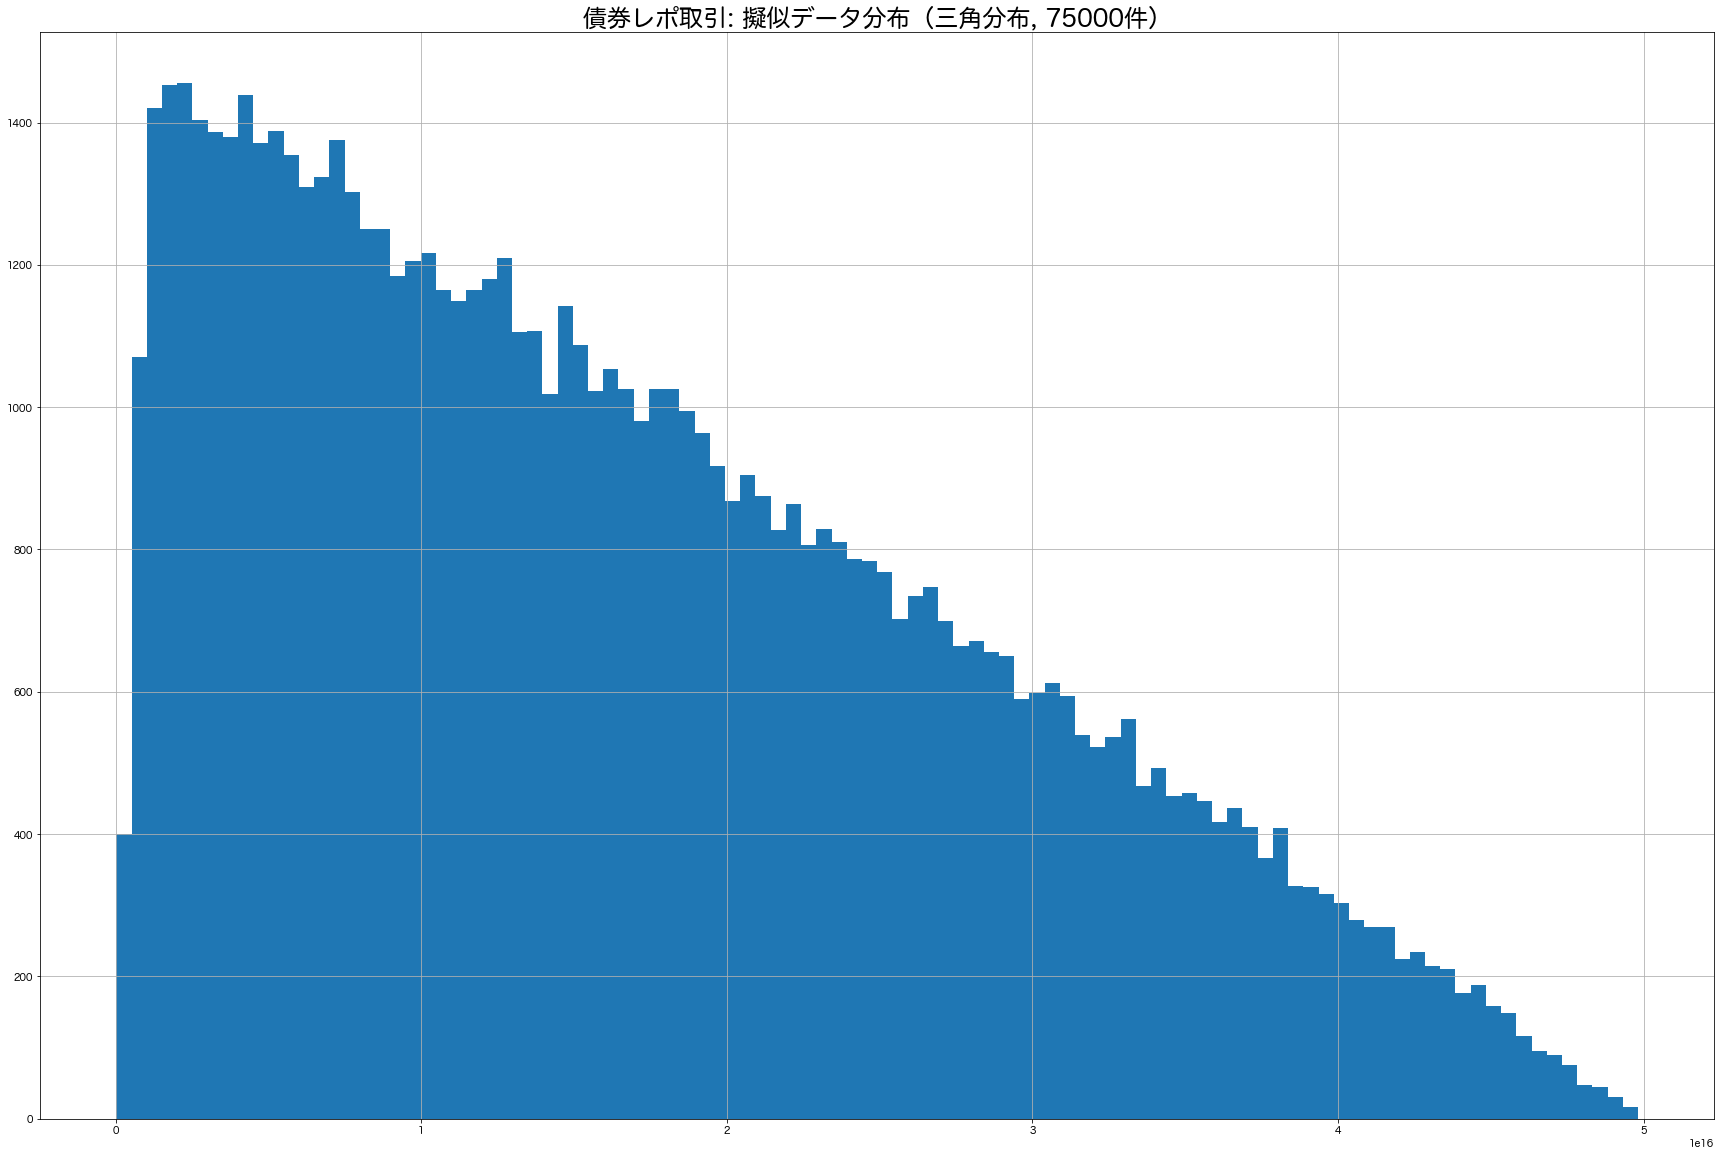

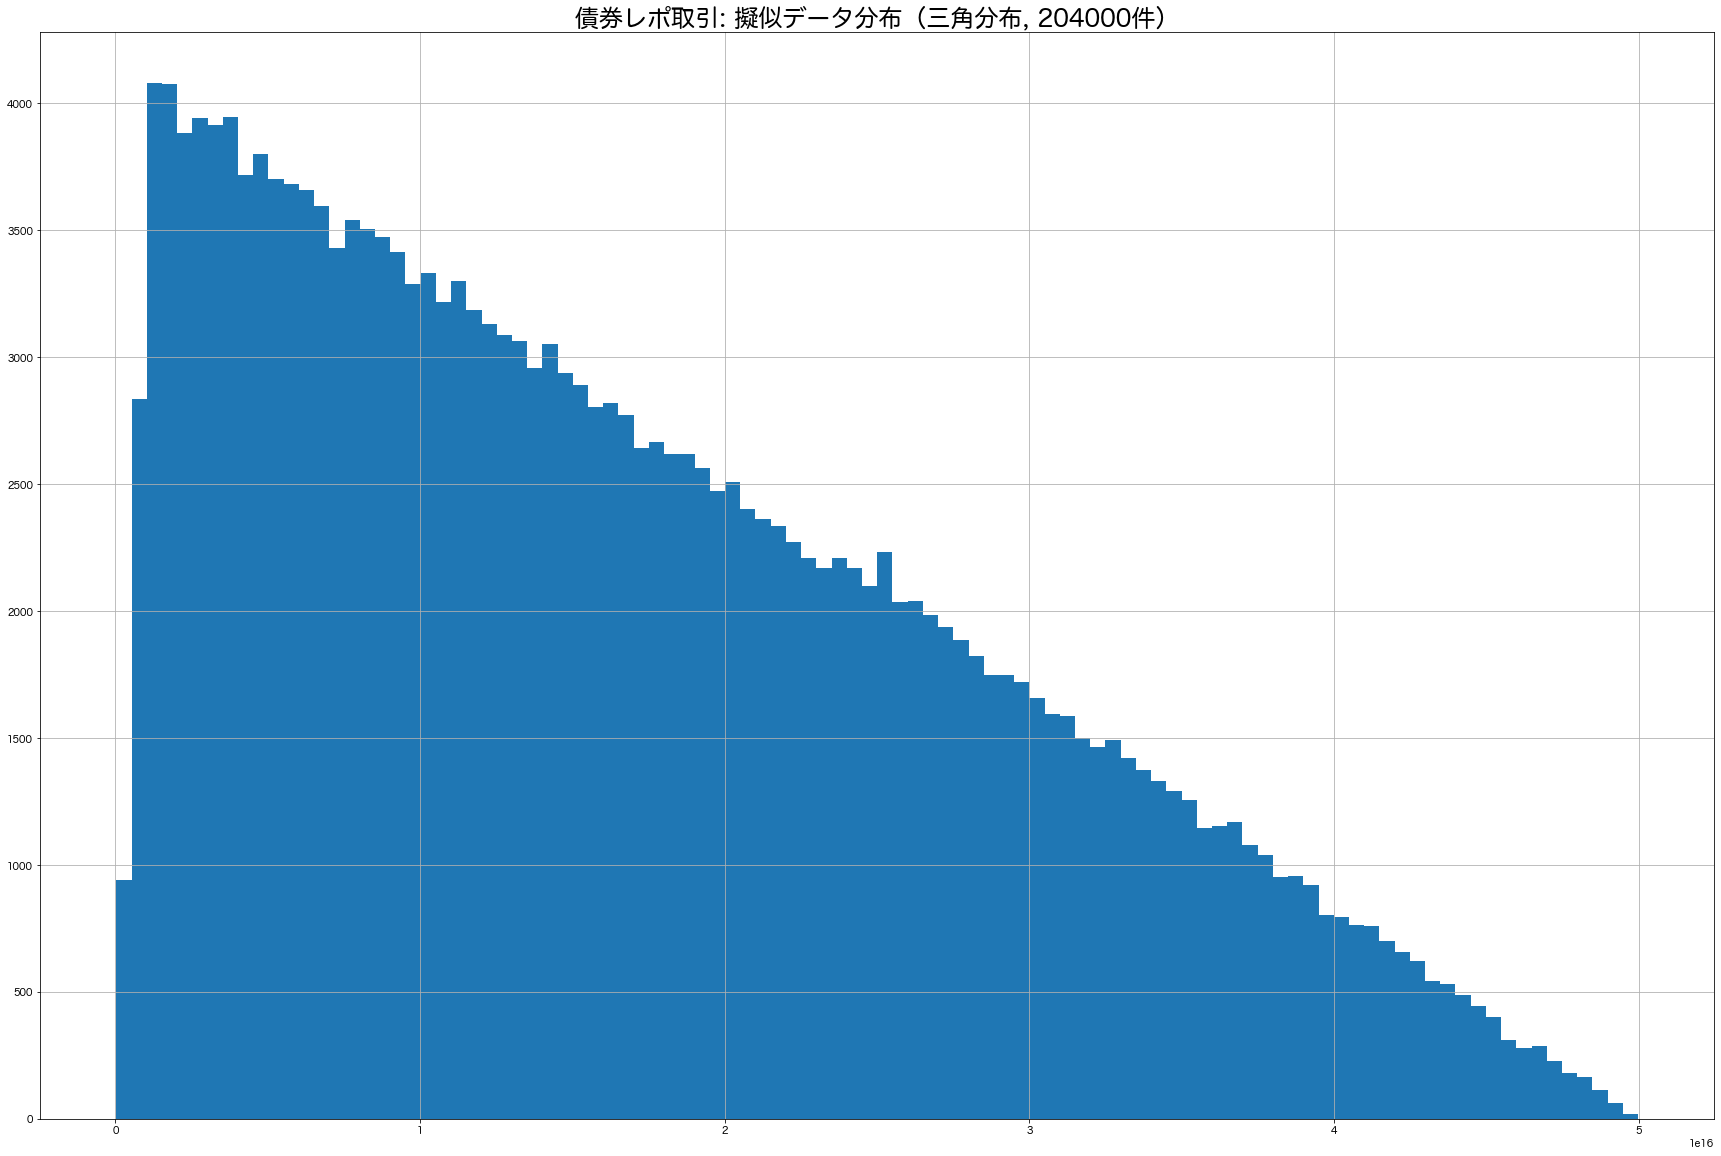

In [499]:
bond_price_dfs = []
for obj in trade_nums:
    _num = obj['bond']
    bond_price_dfs.append(get_bond_price_df(_num))
bond_price_dfs[0]

### Number of securities per trade

#### GC取引

株レポ: GC取引銘柄数
         1   2~10  11~50  51~100    101~
ratio  0.1   0.45    0.3     0.1    0.05
min    1.0   2.00   11.0    51.0  101.00
max    1.0  10.00   50.0   100.0  200.00


Text(0.5, 1.0, '株レポGC取引: 銘柄数')

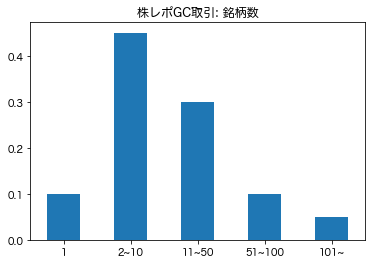

In [284]:
security_num_column_labels = ['1', '2~10', '11~50', '51~100', '101~']
gc_security_num_dist = pd.DataFrame([[0.1, 0.45, 0.3, 0.1, 0.05], [1, 2, 11, 51, 101], [1, 10, 50, 100, 200]],
                             columns=security_num_column_labels,
                             index=['ratio', 'min', 'max'])
gc_security_num_ave = 24.55
print('株レポ: GC取引銘柄数')
pprint(gc_security_num_dist)
print('='*50)

gc_security_num_dist.T['ratio'].plot(kind='bar', rot=0)
plt.title('株レポGC取引: 銘柄数')

Text(0.5, 1.0, '株レポGC取引: ヒストグラム')

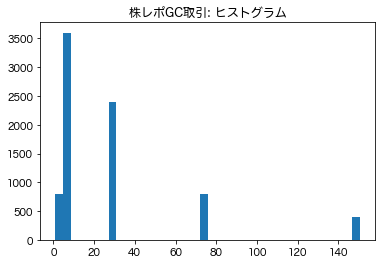

In [285]:
gc_trade_num = 8000
gc_ave_security_num_list = (gc_security_num_dist.T['min'] + gc_security_num_dist.T['max']) / 2
gc_security_num_sample = [[ave]*int(gc_security_num_dist.T['ratio'][index] * gc_trade_num)  for (index, ave) in enumerate(gc_ave_security_num_list)]

plt.hist(list(itertools.chain.from_iterable(gc_security_num_sample)), bins=40)
plt.title('株レポGC取引: ヒストグラム')

In [602]:
def get_gc_num_df(trade_num):
    gc_security_num_max = gc_security_num_dist['101~']['max']
    gc_security_num_min = gc_security_num_dist['1']['min'] - 1
    mock_gc_security_num_df = pd.DataFrame(np.ceil(np.random.triangular(gc_security_num_min, gc_security_num_ave, gc_security_num_max, trade_num)), dtype=int)
    mock_gc_security_num_df.hist(bins=100, figsize=(30, 20), xlabelsize=20, ylabelsize=20)
    plt.title('株レポGC取引: 擬似データ分布（三角分布）')
    return mock_gc_security_num_df

,0
0,102
1,58
2,16
3,42
4,12
...,...
7995,72
7996,16
7997,130
7998,16


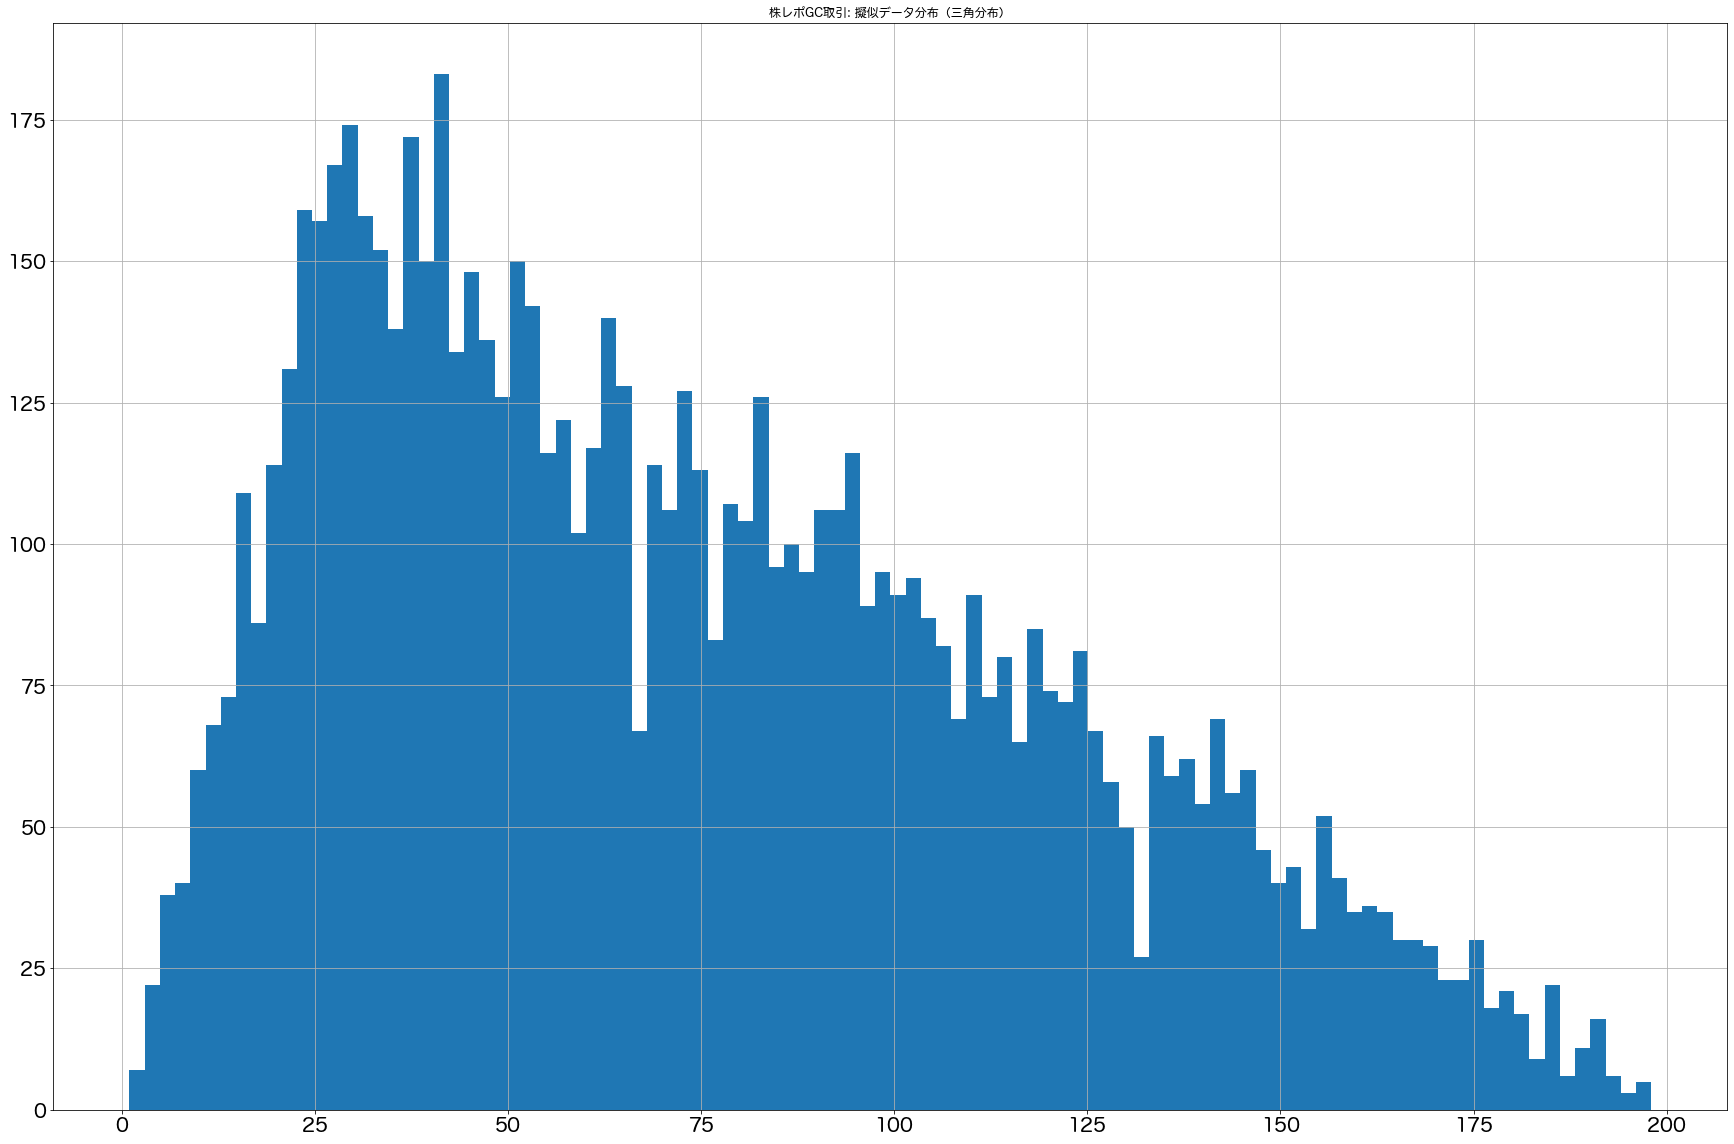

In [603]:
# 三角分布で類似分布を作成
get_gc_num_df(gc_trade_num)

,0
0,137
1,78
2,30
3,32
4,69
...,...
433,186
434,72
435,74
436,72


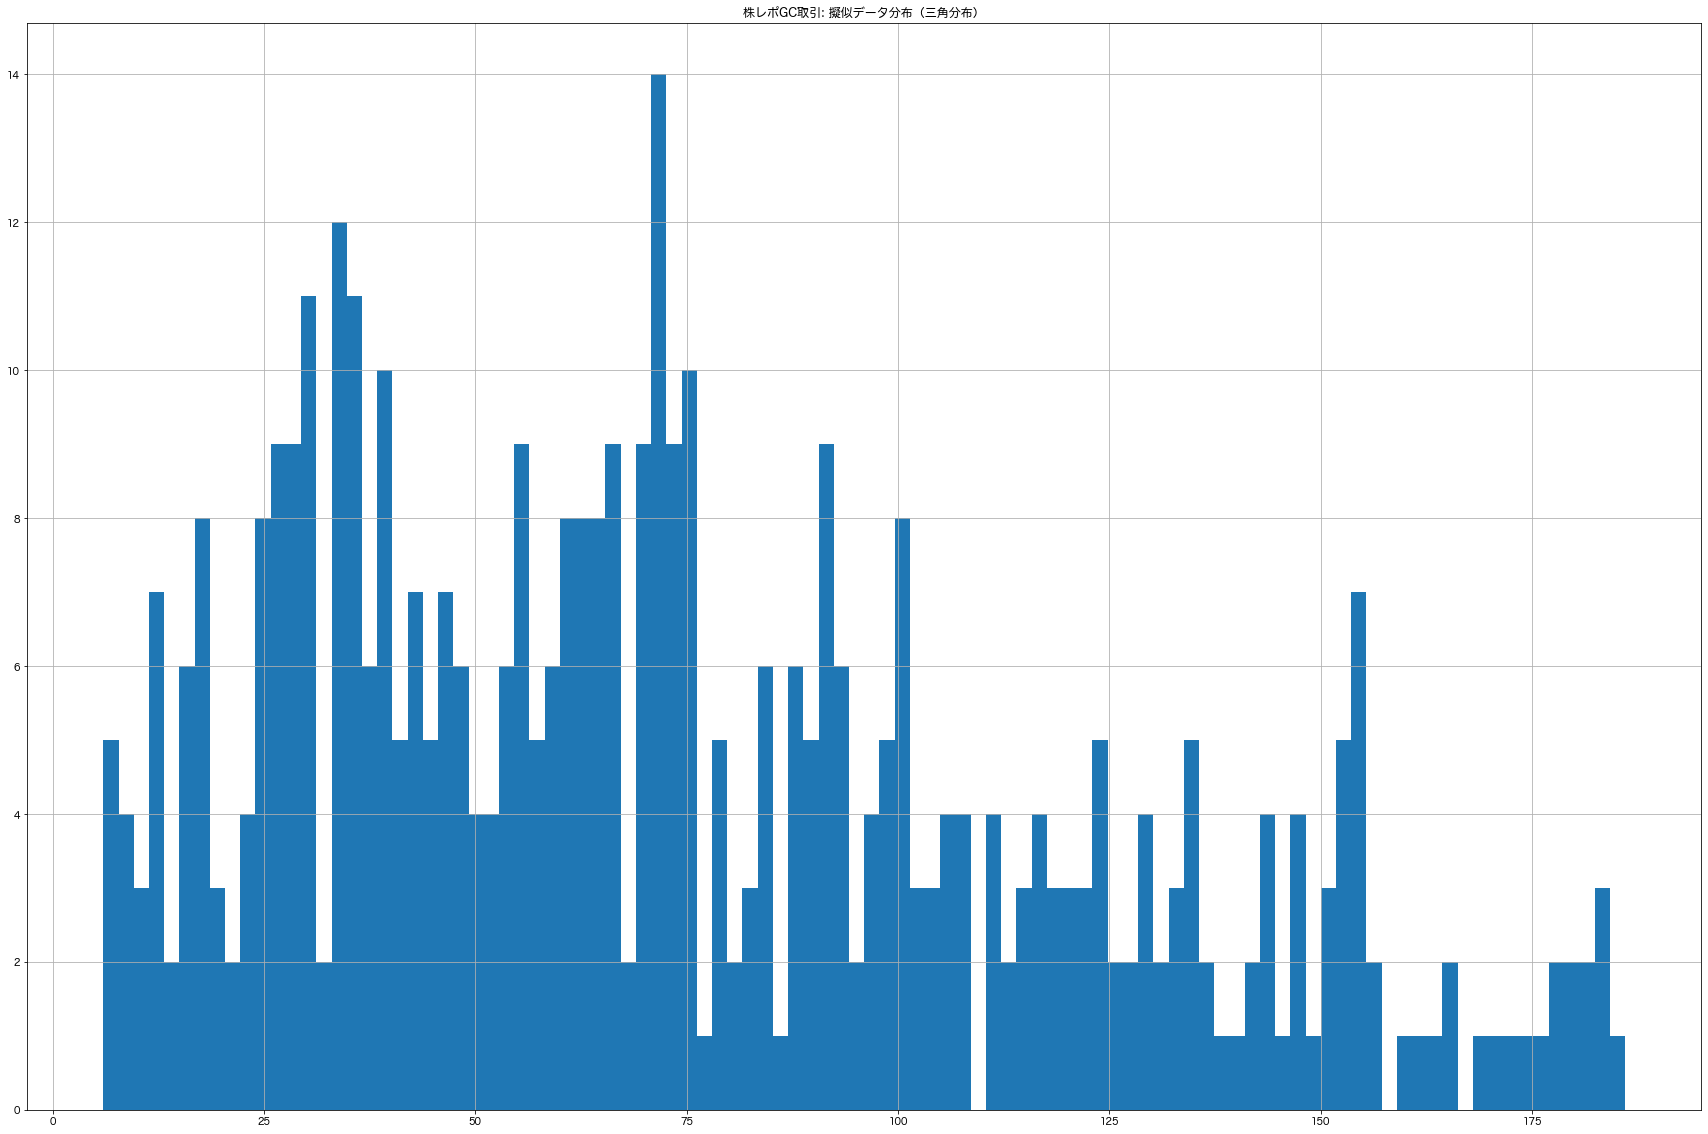

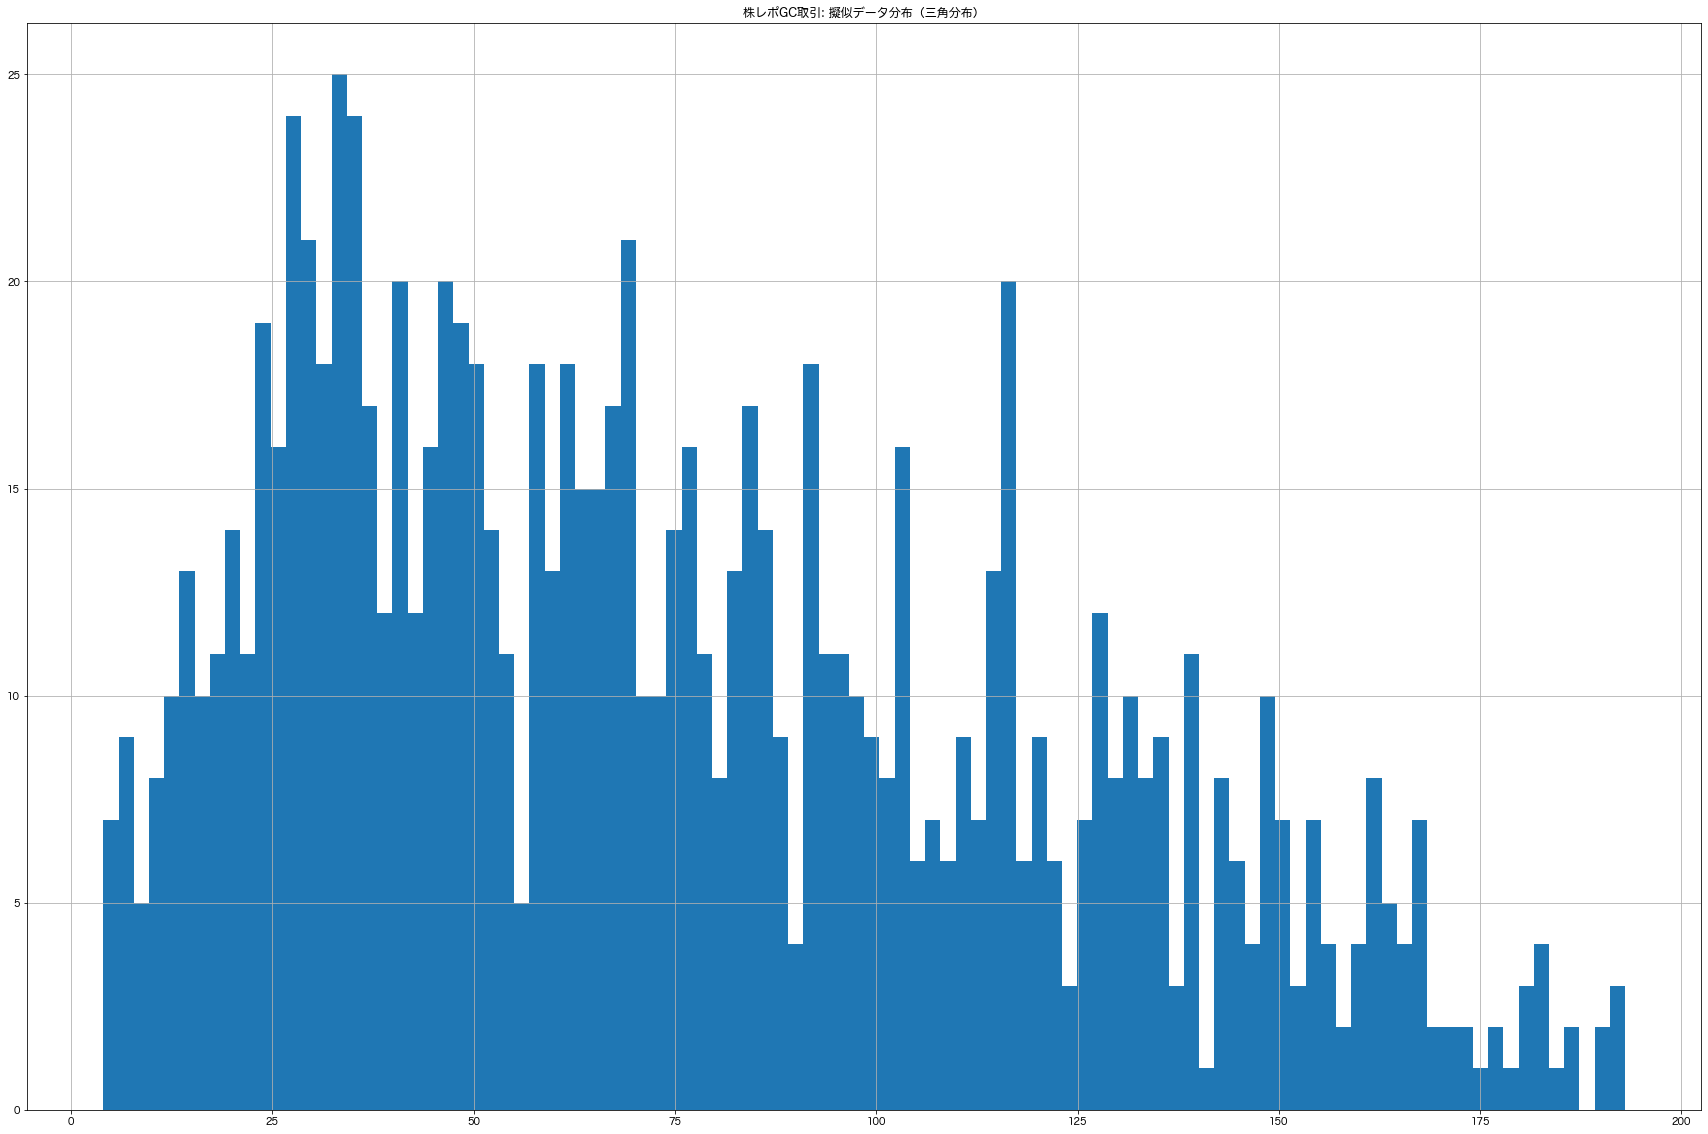

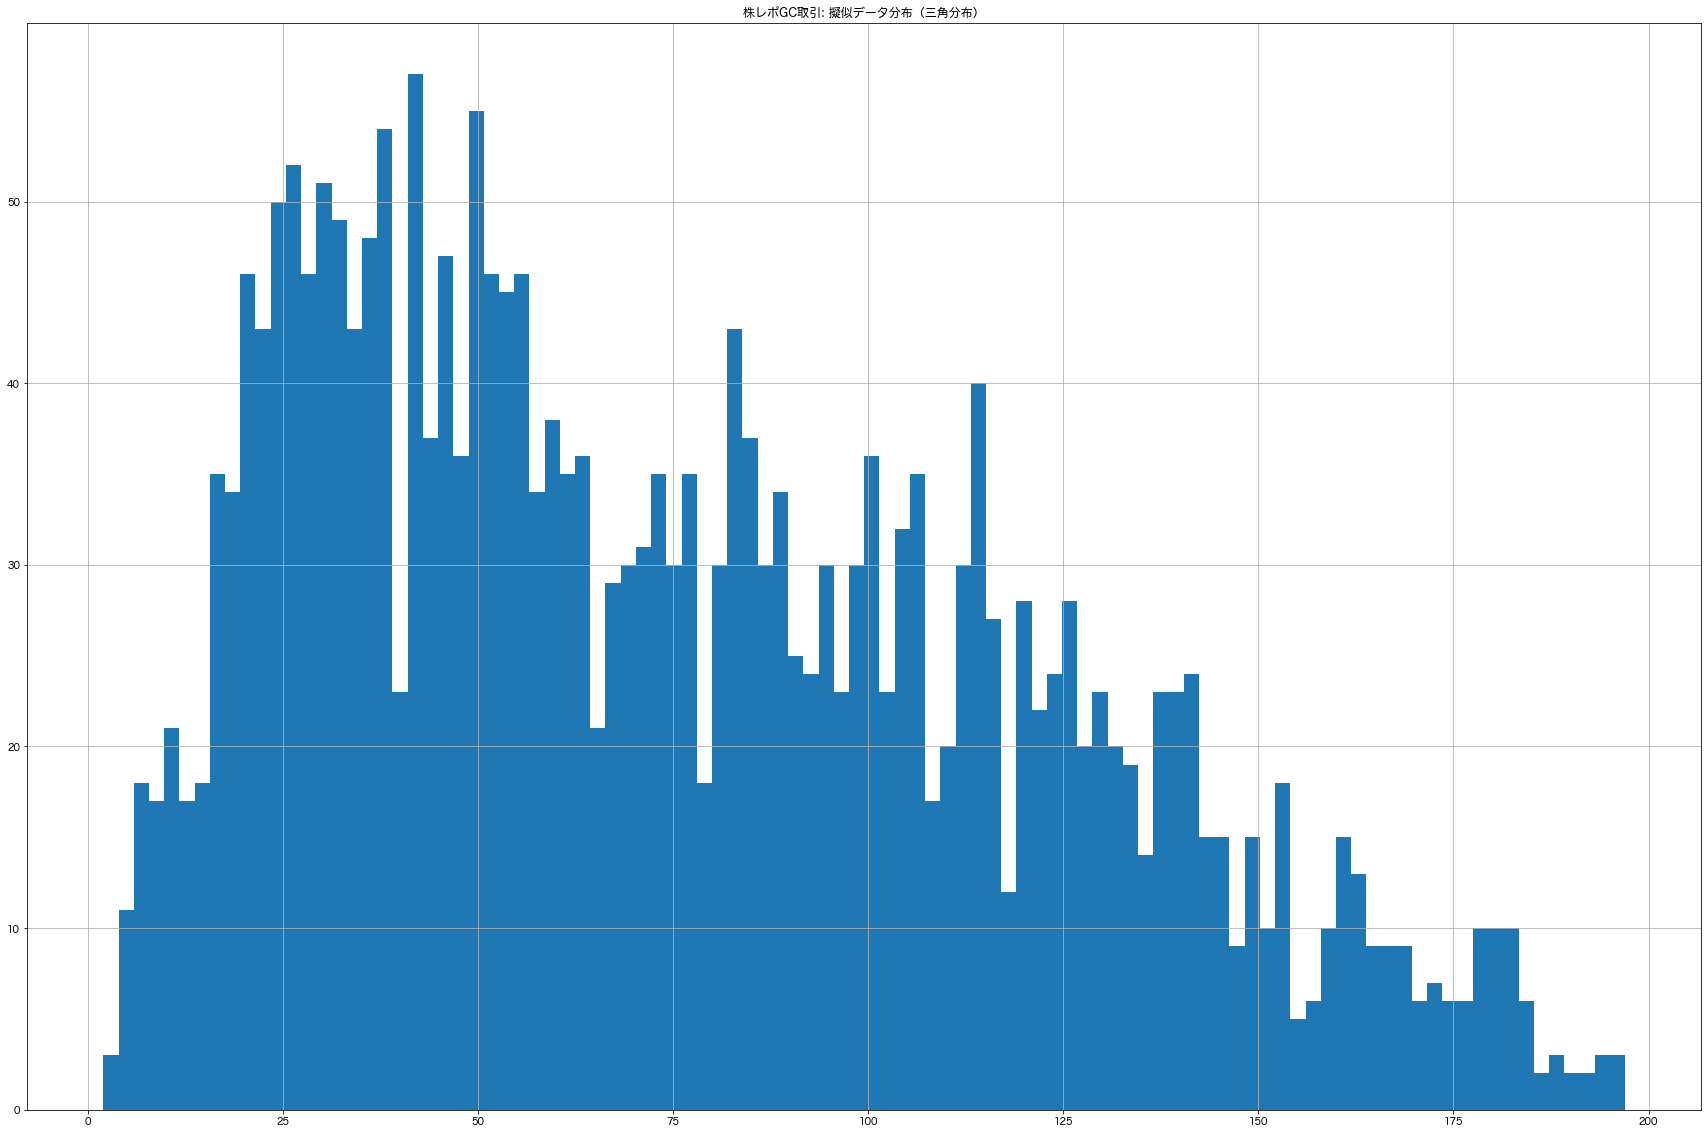

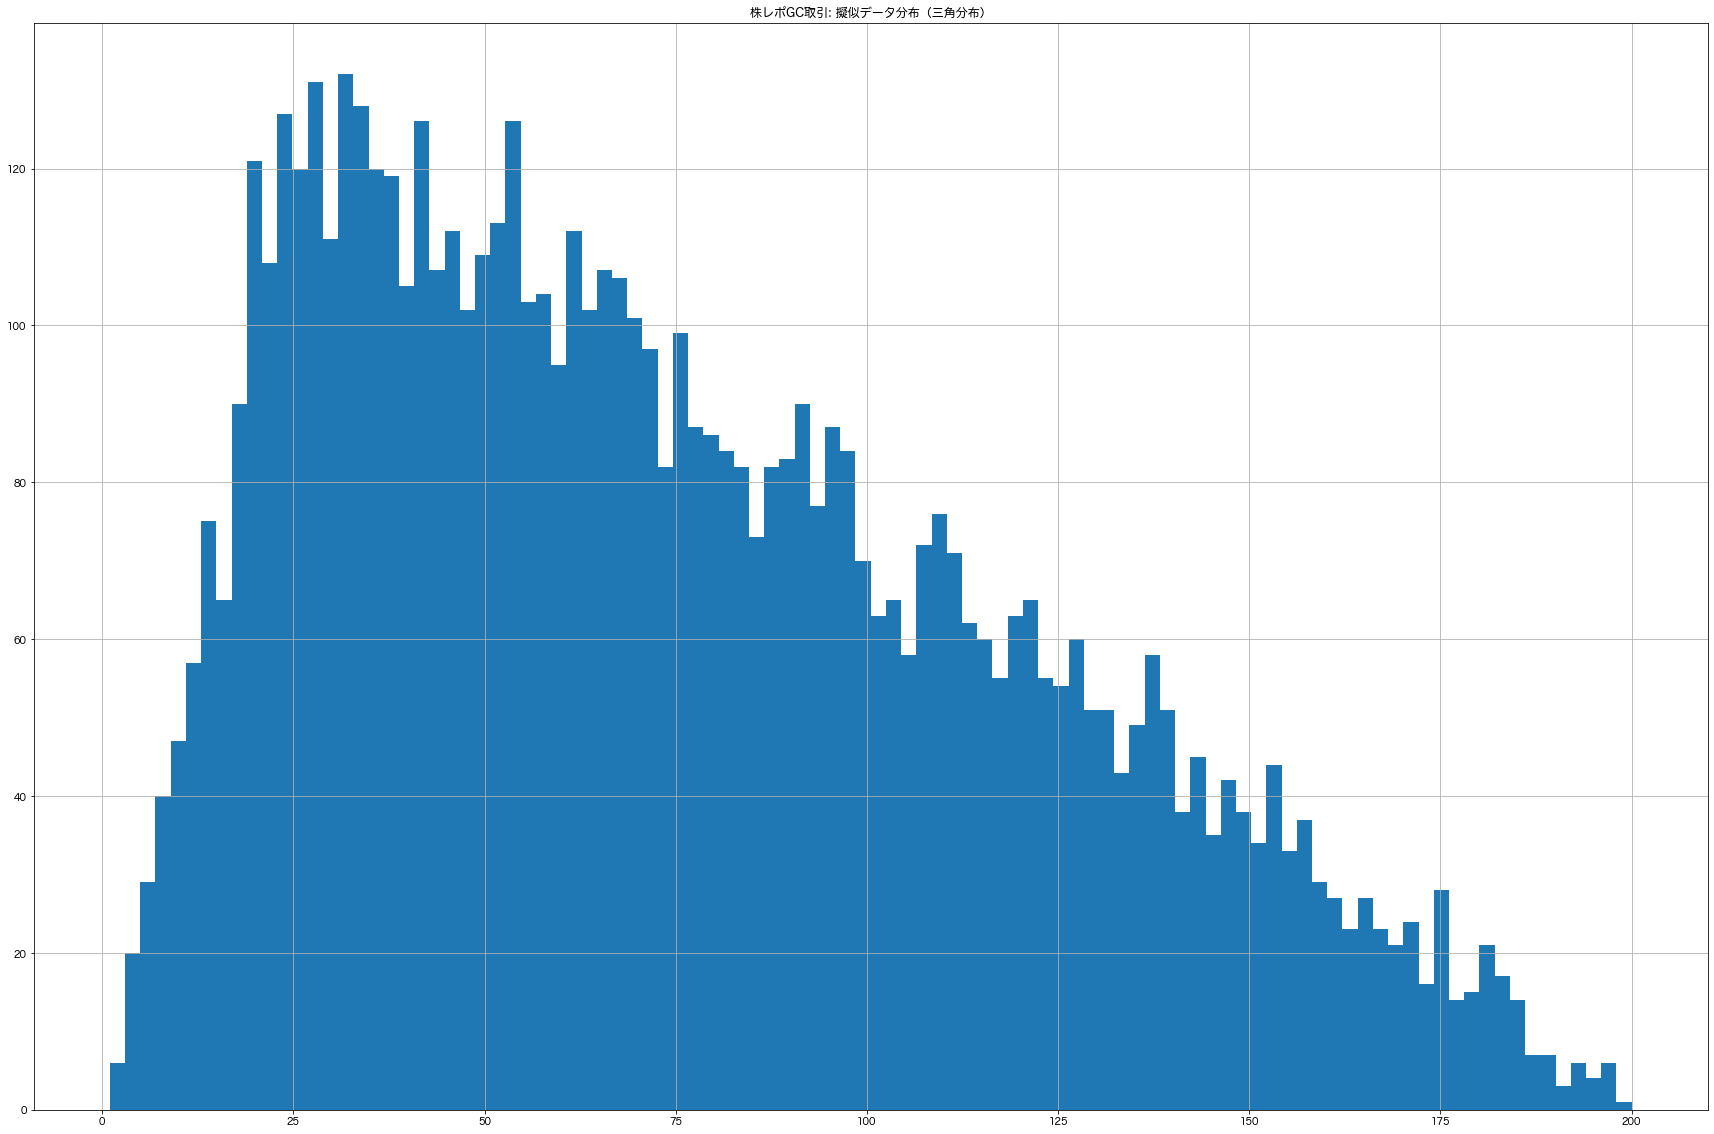

In [501]:
gc_security_num_dfs = []
for obj in trade_nums:
    _num = obj['gc']
    gc_security_num_dfs.append(get_gc_num_df(_num))
gc_security_num_dfs[0]

#### SC取引

株レポ: SC取引銘柄数
          1   2~10  11~50  51~100   101~
ratio  0.54   0.36    0.1       0    0.0
min    1.00   2.00   11.0      51  101.0
max    1.00  10.00   50.0     100  200.0
'=================================================='


Text(0.5, 1.0, '株レポSC取引: 銘柄数')

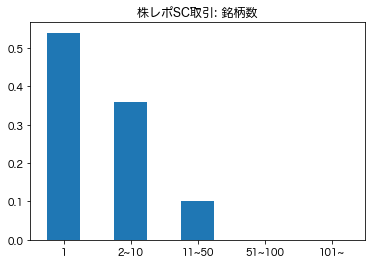

In [451]:
sc_security_num_dist = pd.DataFrame([[0.54, 0.36, 0.1, 0, 0.], [1, 2, 11, 51, 101], [1, 10, 50, 100, 200]],
                             columns=security_num_column_labels,
                             index=['ratio', 'min', 'max'])
sc_security_num_ave = 4.05
print('株レポ: SC取引銘柄数')
pprint(sc_security_num_dist)
pprint('='*50)

sc_security_num_dist.T['ratio'].plot(kind='bar', rot=0)
plt.title('株レポSC取引: 銘柄数')

Text(0.5, 1.0, '株レポSC取引: ヒストグラム')

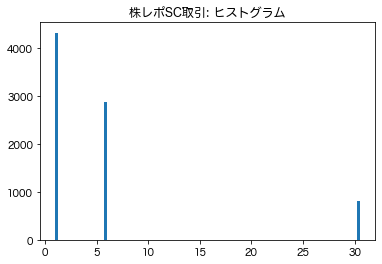

In [387]:
sc_trade_num = 8000
sc_ave_security_num_list = (sc_security_num_dist.T['min'] + sc_security_num_dist.T['max']) / 2
sc_security_num_sample = [[ave]*int(sc_security_num_dist.T['ratio'][index] * sc_trade_num)  for (index, ave) in enumerate(sc_ave_security_num_list)]

plt.hist(list(itertools.chain.from_iterable(sc_security_num_sample)), bins=100)
plt.title('株レポSC取引: ヒストグラム')

In [608]:
def get_sc_num_df(trade_num):
    sc_security_num_max = sc_security_num_dist['101~']['max']
    sc_security_num_min = sc_security_num_dist['1']['min'] - 1
    _nums = []
    for i in range(trade_num):
        _nums.append(np.random.choice(a=[1, np.random.randint(2, 11), np.random.randint(11, 51)],  p=[0.54, 0.36, 0.1]))
       
    mock_sc_security_num_df = pd.DataFrame(_nums, dtype=int)
    mock_sc_security_num_df.hist(bins=100, figsize=(30, 20), xlabelsize=20, ylabelsize=20)
    plt.title('株レポSC取引: 擬似データ分布')
    return mock_sc_security_num_df

,0
0,1
1,5
2,10
3,1
4,6
...,...
7995,1
7996,8
7997,33
7998,1


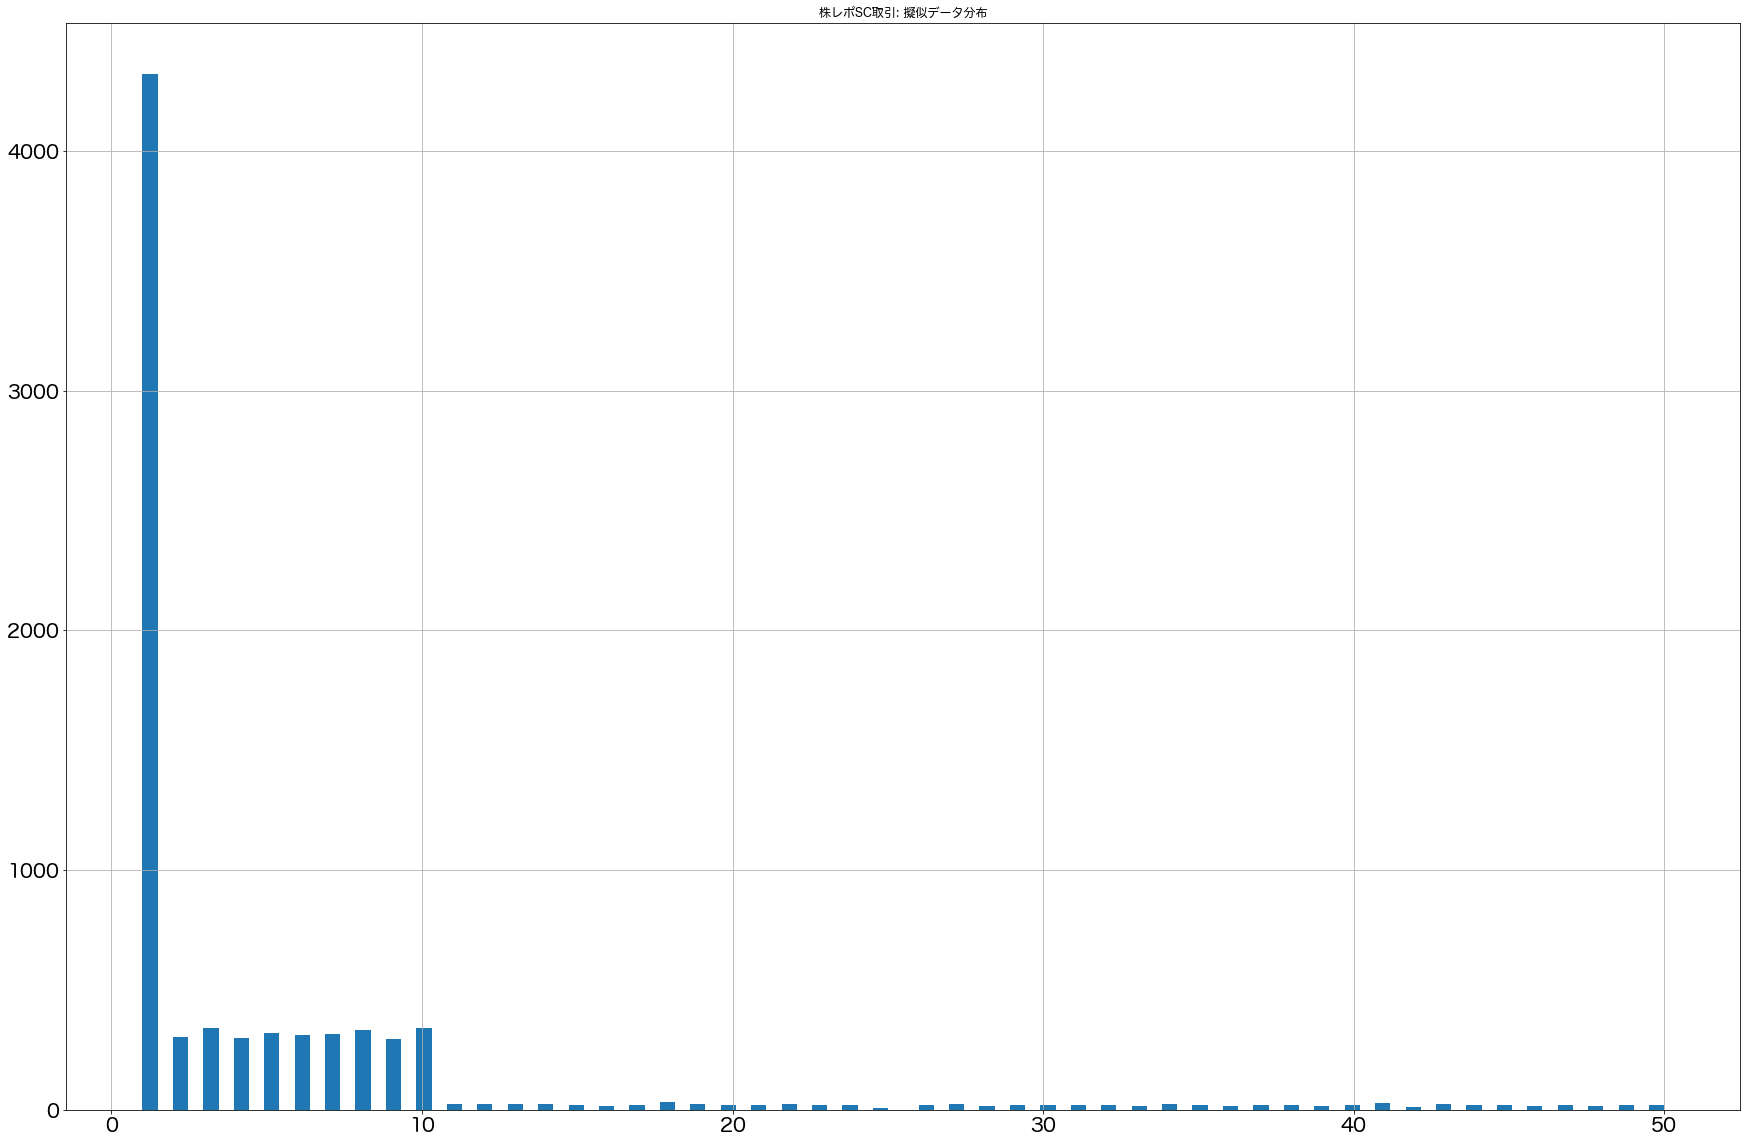

In [609]:
get_sc_num_df(sc_trade_num)

,0
0,1
1,1
2,4
3,1
4,1
...,...
2828,1
2829,5
2830,2
2831,1


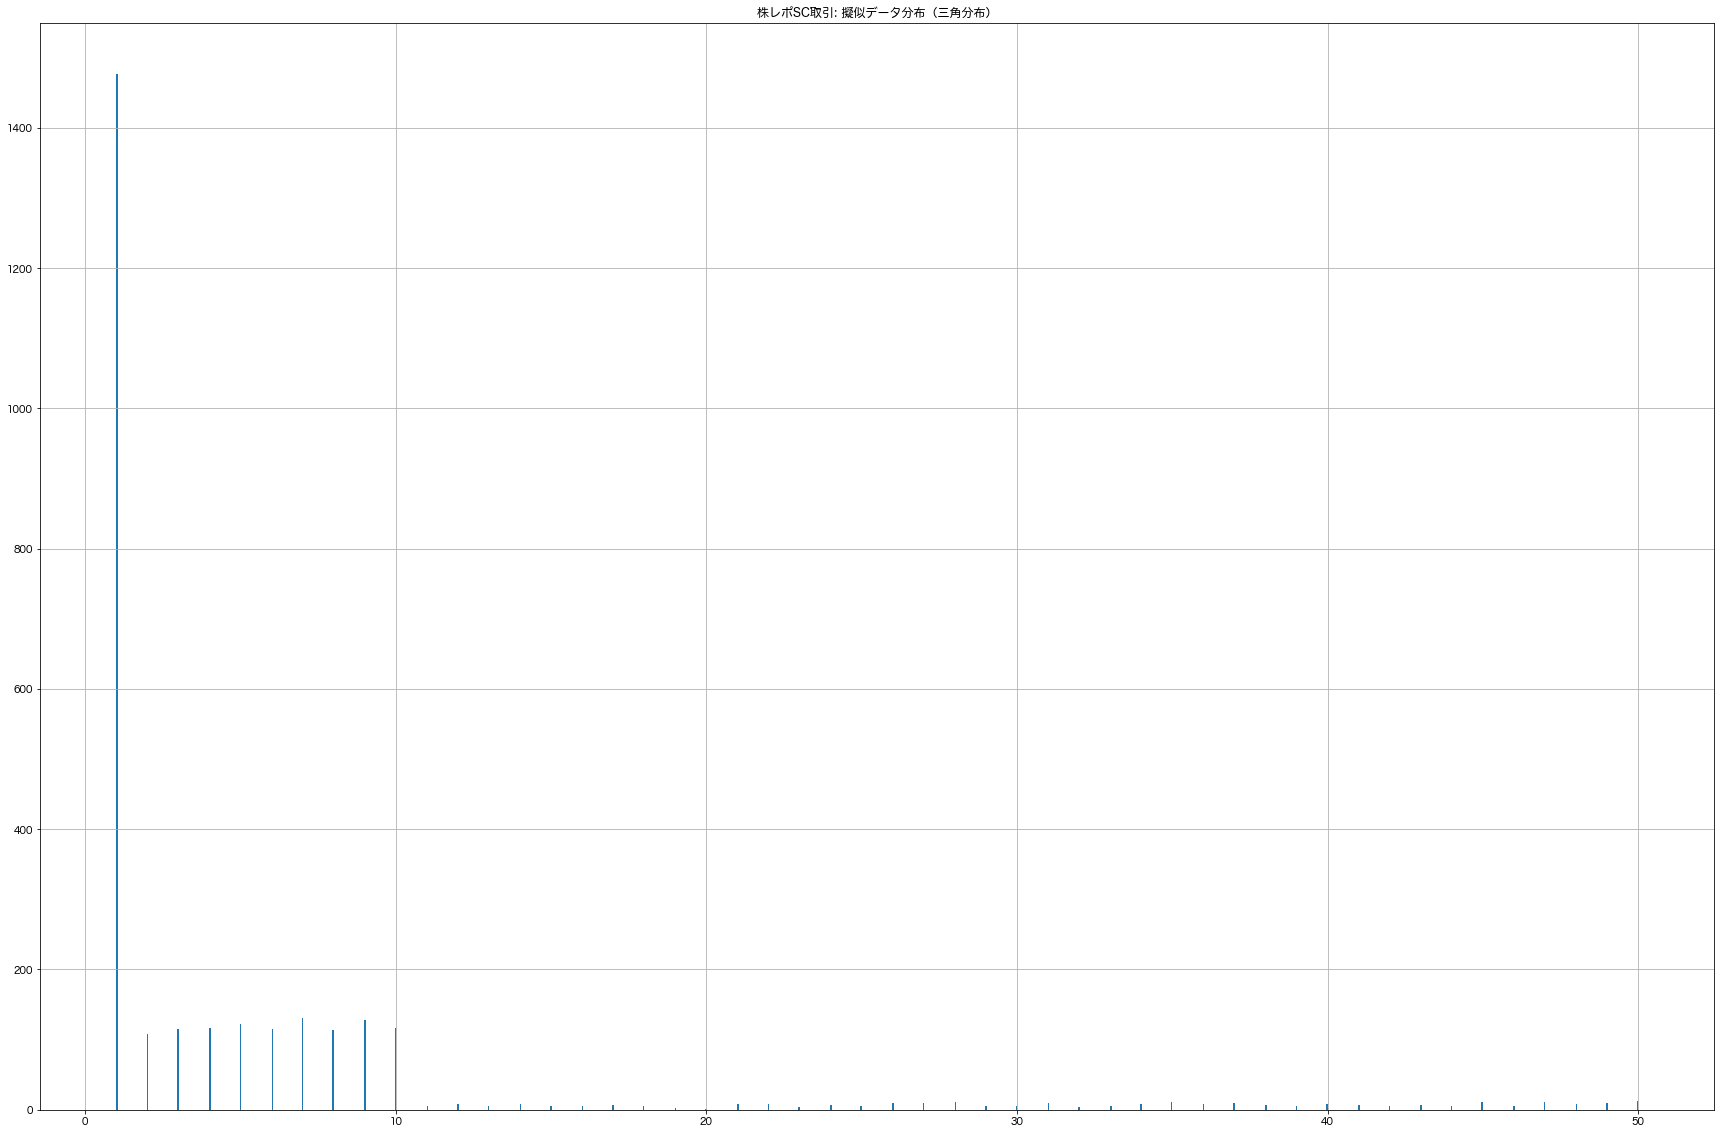

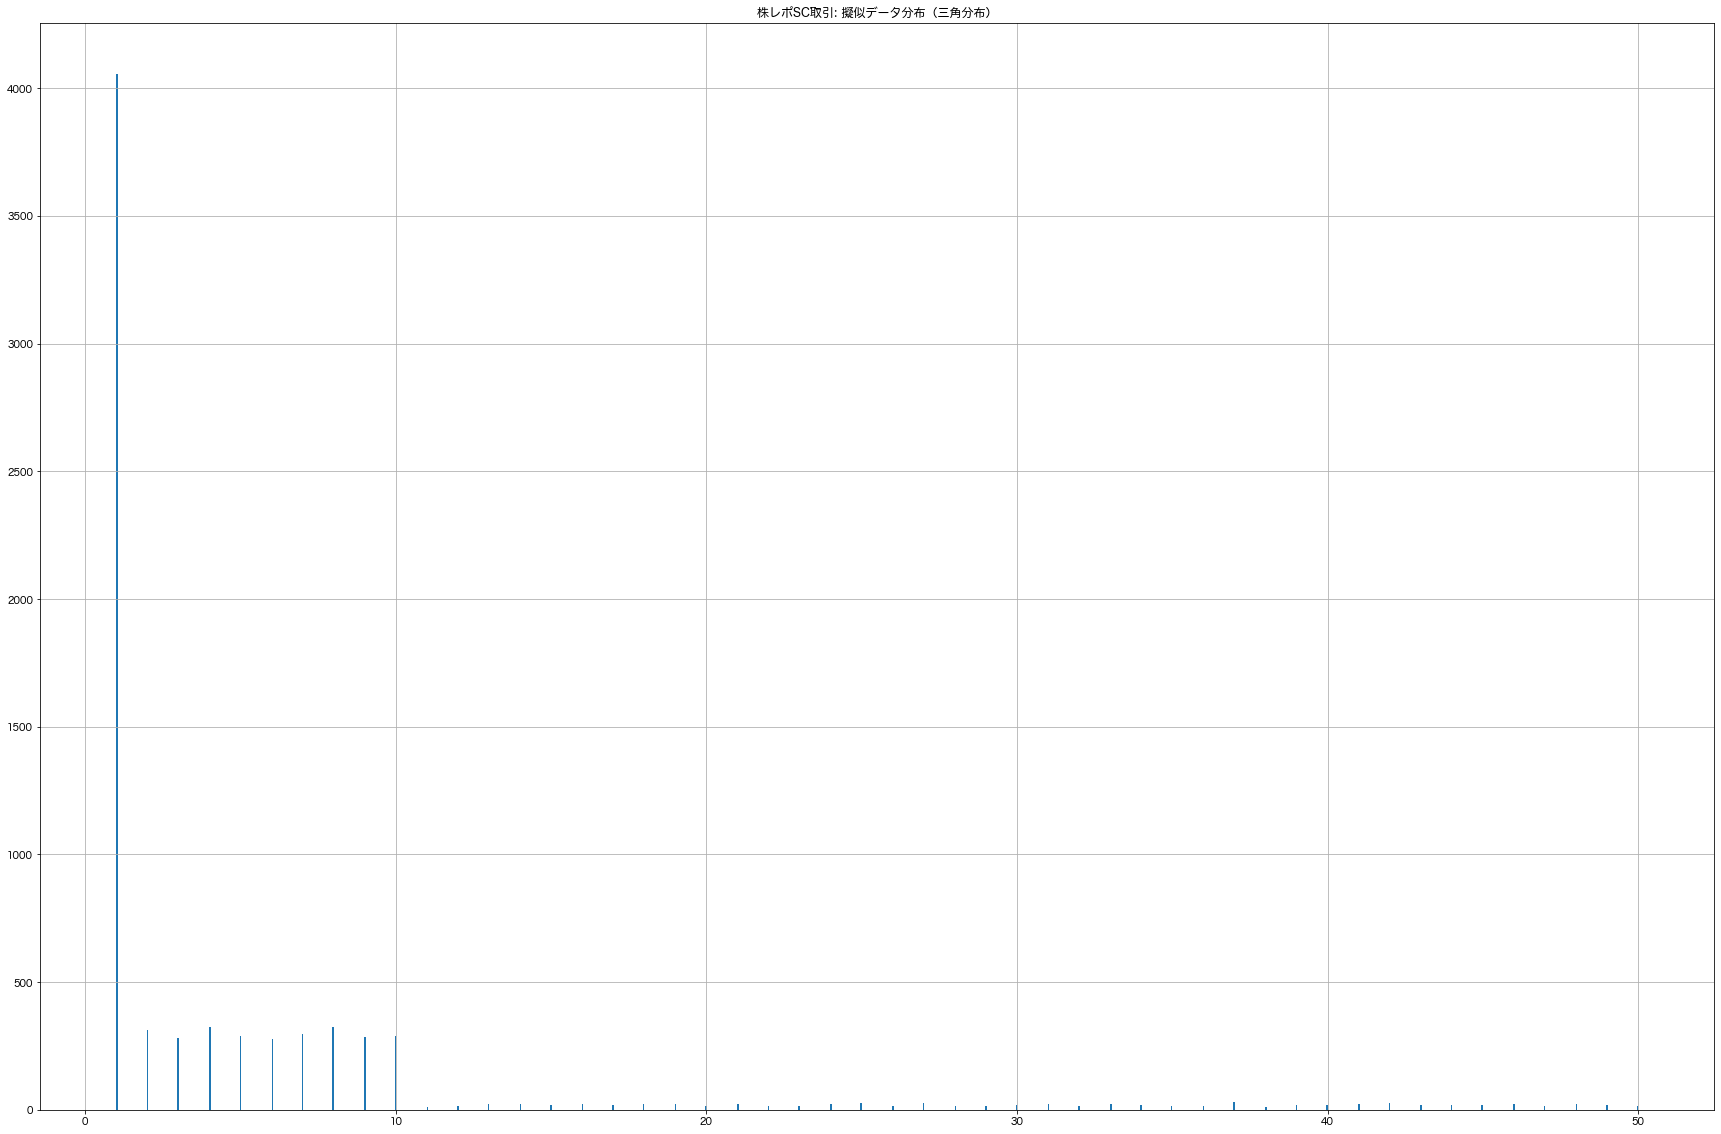

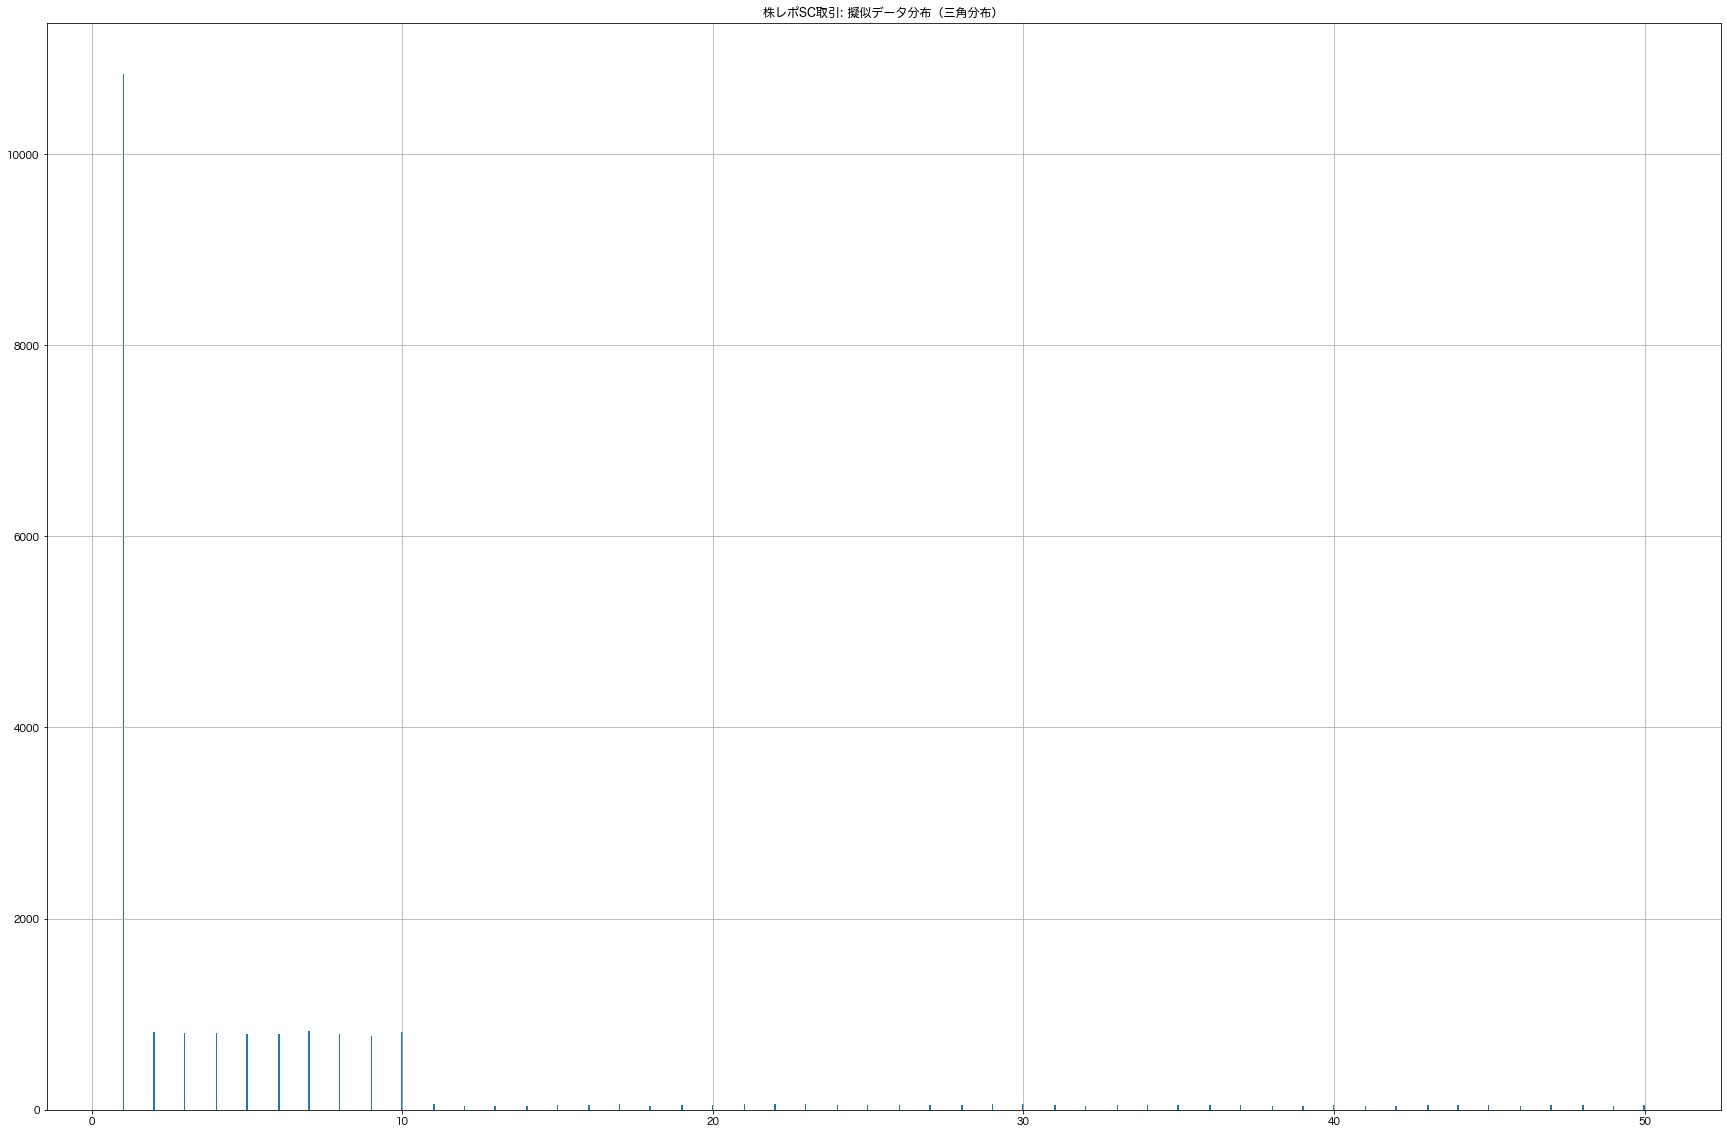

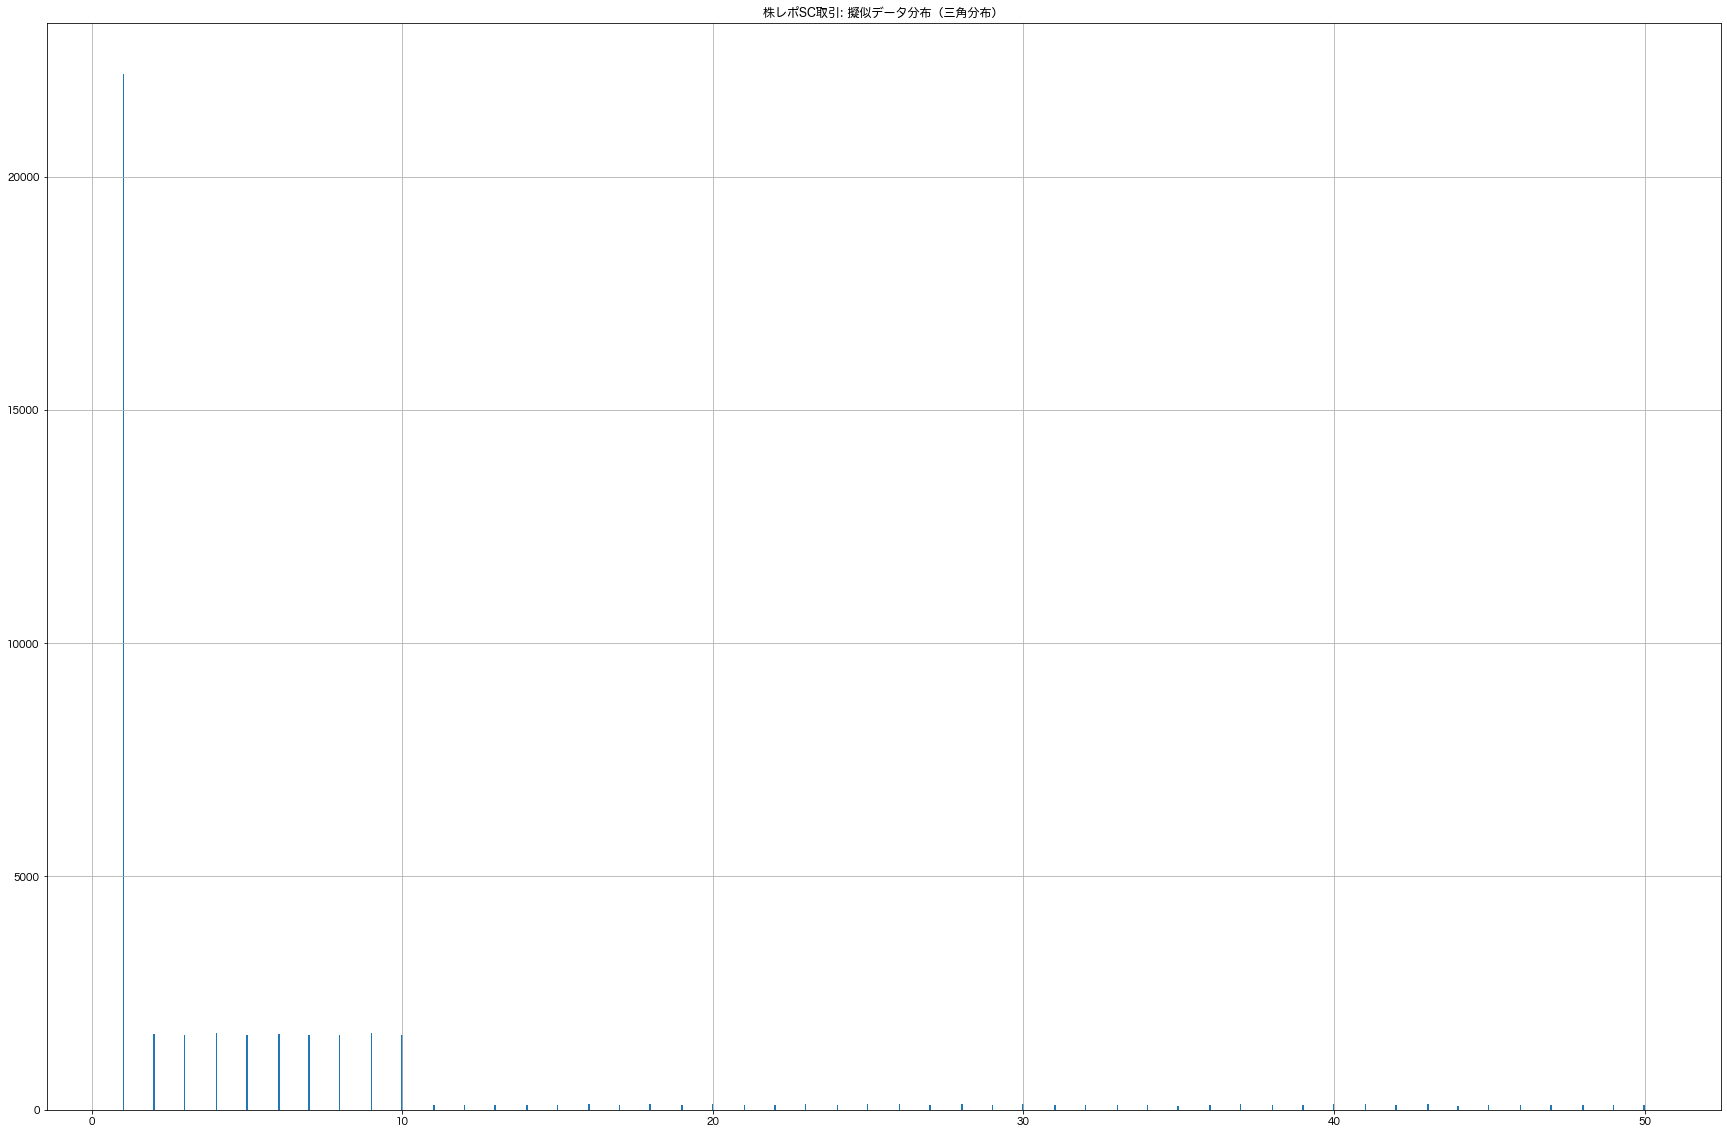

In [502]:
sc_security_num_dfs = []
for obj in trade_nums:
    _num = obj['sc']
    sc_security_num_dfs.append(get_sc_num_df(_num))
sc_security_num_dfs[0]

#### 債券レポ

債券レポ: 取引銘柄数
          1   2-5   6-10  11-50
ratio  0.69  0.27   0.03   0.01
min    1.00  2.00   6.00  11.00
max    1.00  5.00  10.00  30.00
'=================================================='


Text(0.5, 1.0, '債券レポ取引: 銘柄数')

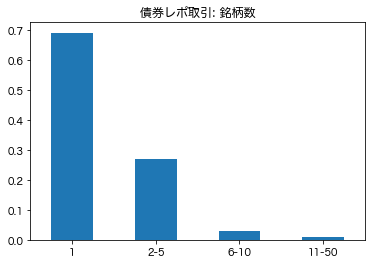

In [452]:
bond_security_num_dist = pd.DataFrame([[0.69, 0.27, 0.03, 0.01], [1, 2, 6, 11], [1, 5, 10, 30]],
                             columns=['1', '2-5', '6-10', '11-50'],
                             index=['ratio', 'min', 'max'])
bond_security_num_ave = 1.87
print('債券レポ: 取引銘柄数')
pprint(bond_security_num_dist)
pprint('='*50)

bond_security_num_dist.T['ratio'].plot(kind='bar', rot=0)
plt.title('債券レポ取引: 銘柄数')

Text(0.5, 1.0, '再建レポ取引: ヒストグラム')

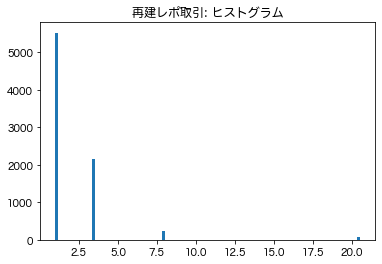

In [453]:
bond_trade_num = 8000
bond_ave_security_num_list = (bond_security_num_dist.T['min'] + bond_security_num_dist.T['max']) / 2
bond_security_num_sample = [[ave]*int(bond_security_num_dist.T['ratio'][index] * bond_trade_num)  for (index, ave) in enumerate(bond_ave_security_num_list)]

plt.hist(list(itertools.chain.from_iterable(bond_security_num_sample)), bins=100)
plt.title('再建レポ取引: ヒストグラム')

In [454]:
def get_bond_num_df(trade_num):
    bond_security_num_max = bond_security_num_dist['11-50']['max']
    bond_security_num_min = bond_security_num_dist['1']['min'] - 1
    _nums = []
    for i in range(trade_num):
        _nums.append(np.random.choice(a=[1, np.random.randint(2, 6), np.random.randint(6, 11), np.random.randint(11, 51)],  p=[0.69, 0.27, 0.03, 0.01]))
       
    mock_bond_security_num_df = pd.DataFrame(_nums, dtype=int)
    mock_bond_security_num_df.hist(bins=1000, figsize=(30, 20))
    plt.title('債券レポ取引: 擬似データ分布（三角分布）')
    return mock_bond_security_num_df

0    50
dtype: int64

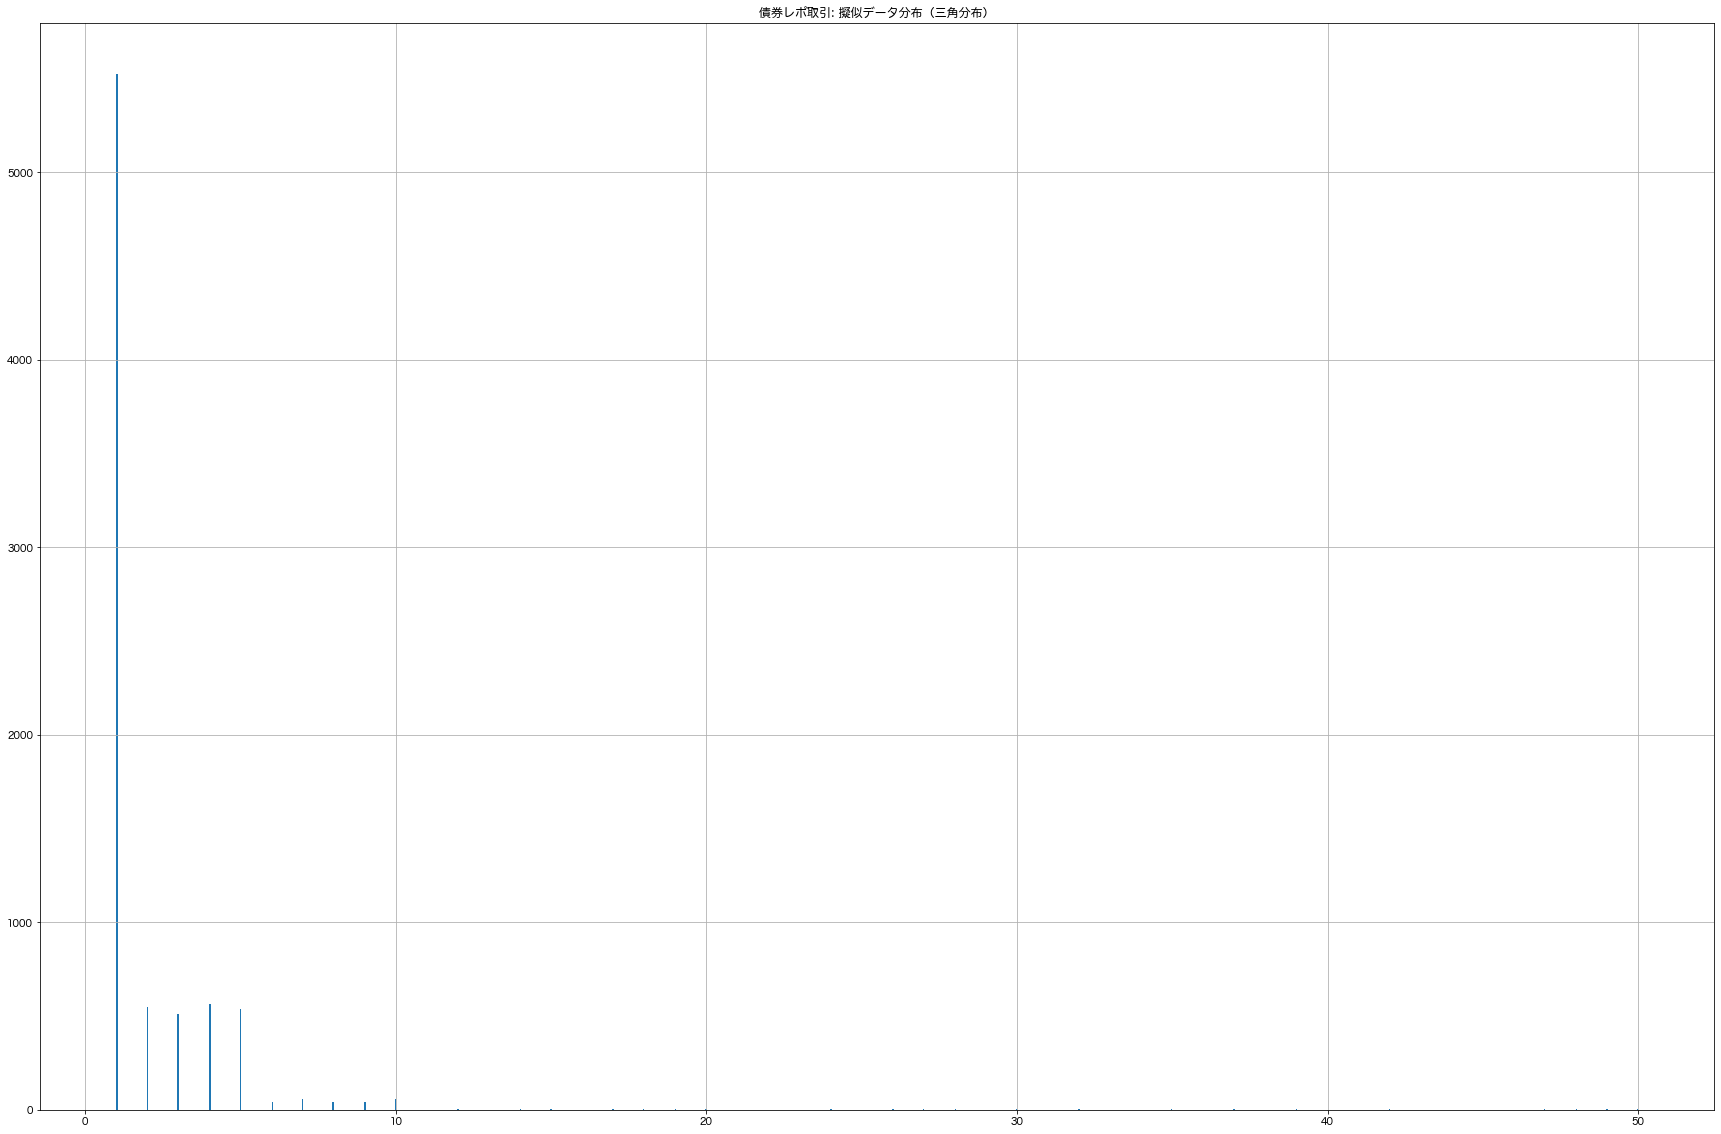

In [456]:
get_bond_num_df(bond_trade_num).max()

,0
0,5
1,1
2,1
3,1
4,1
...,...
8662,1
8663,1
8664,4
8665,1


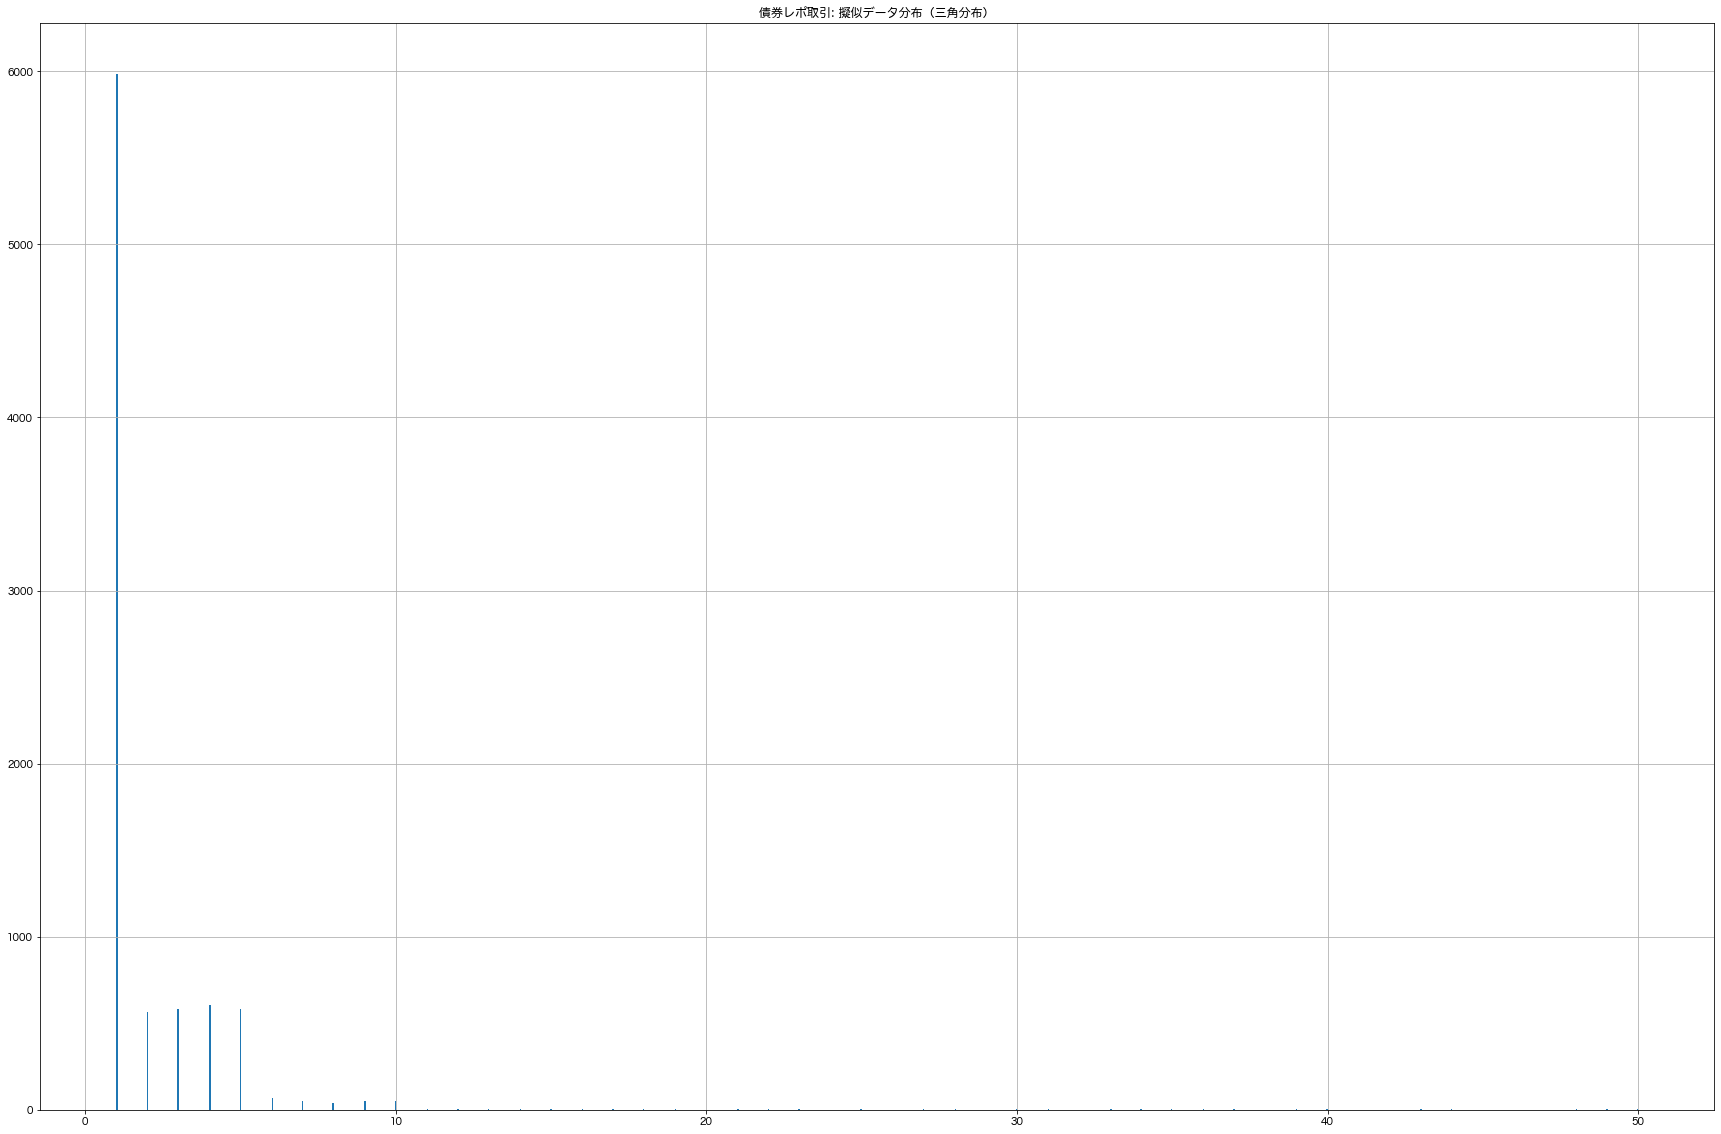

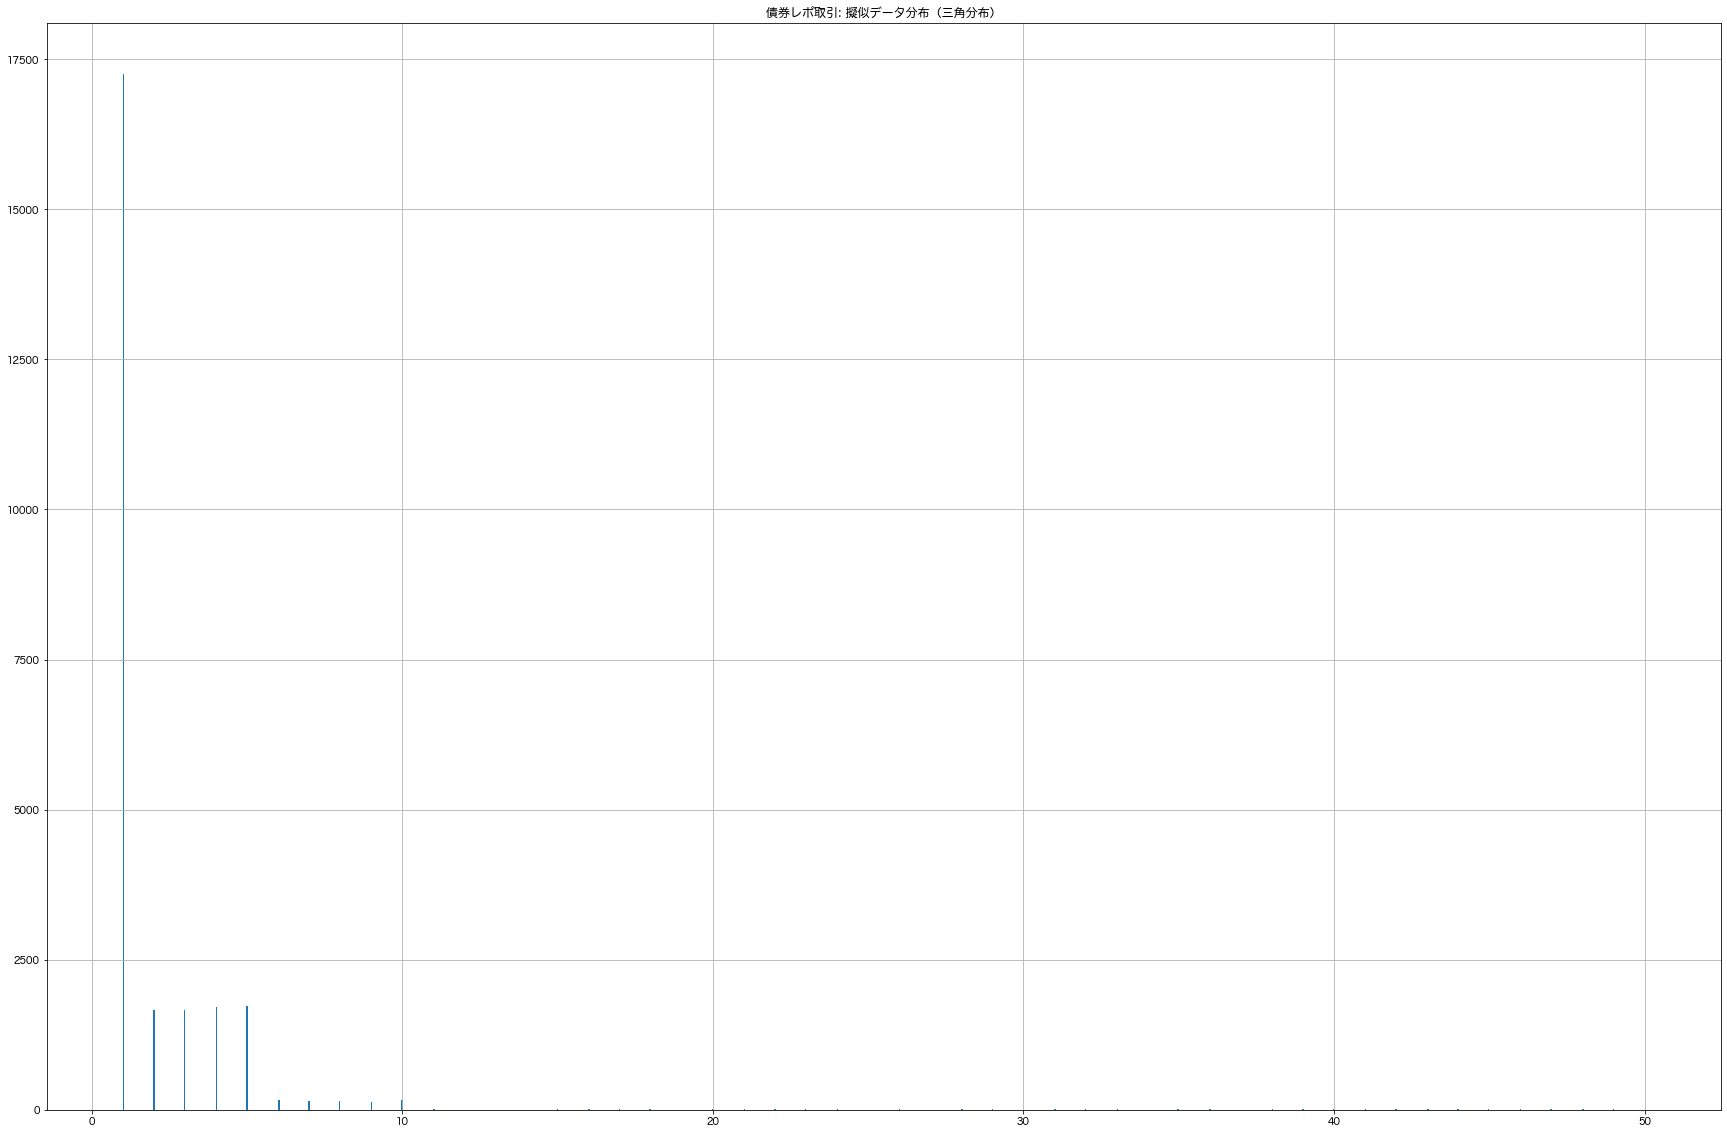

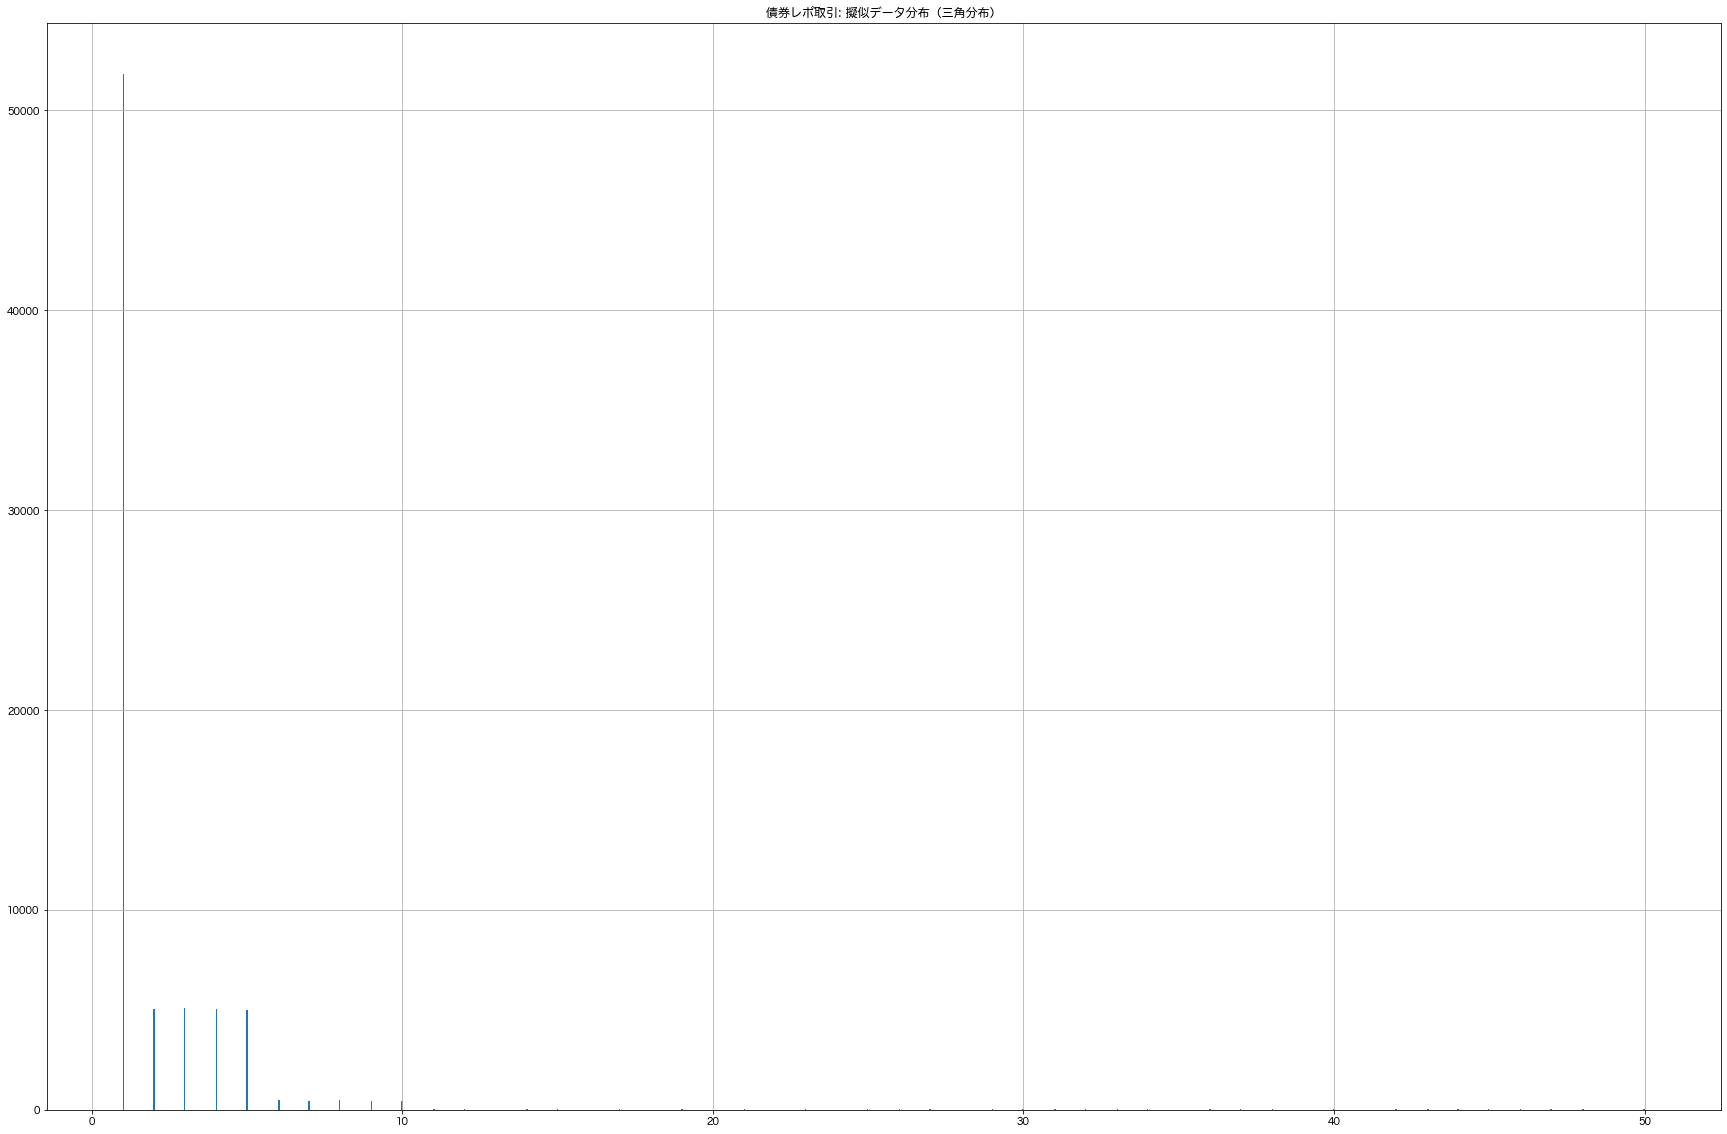

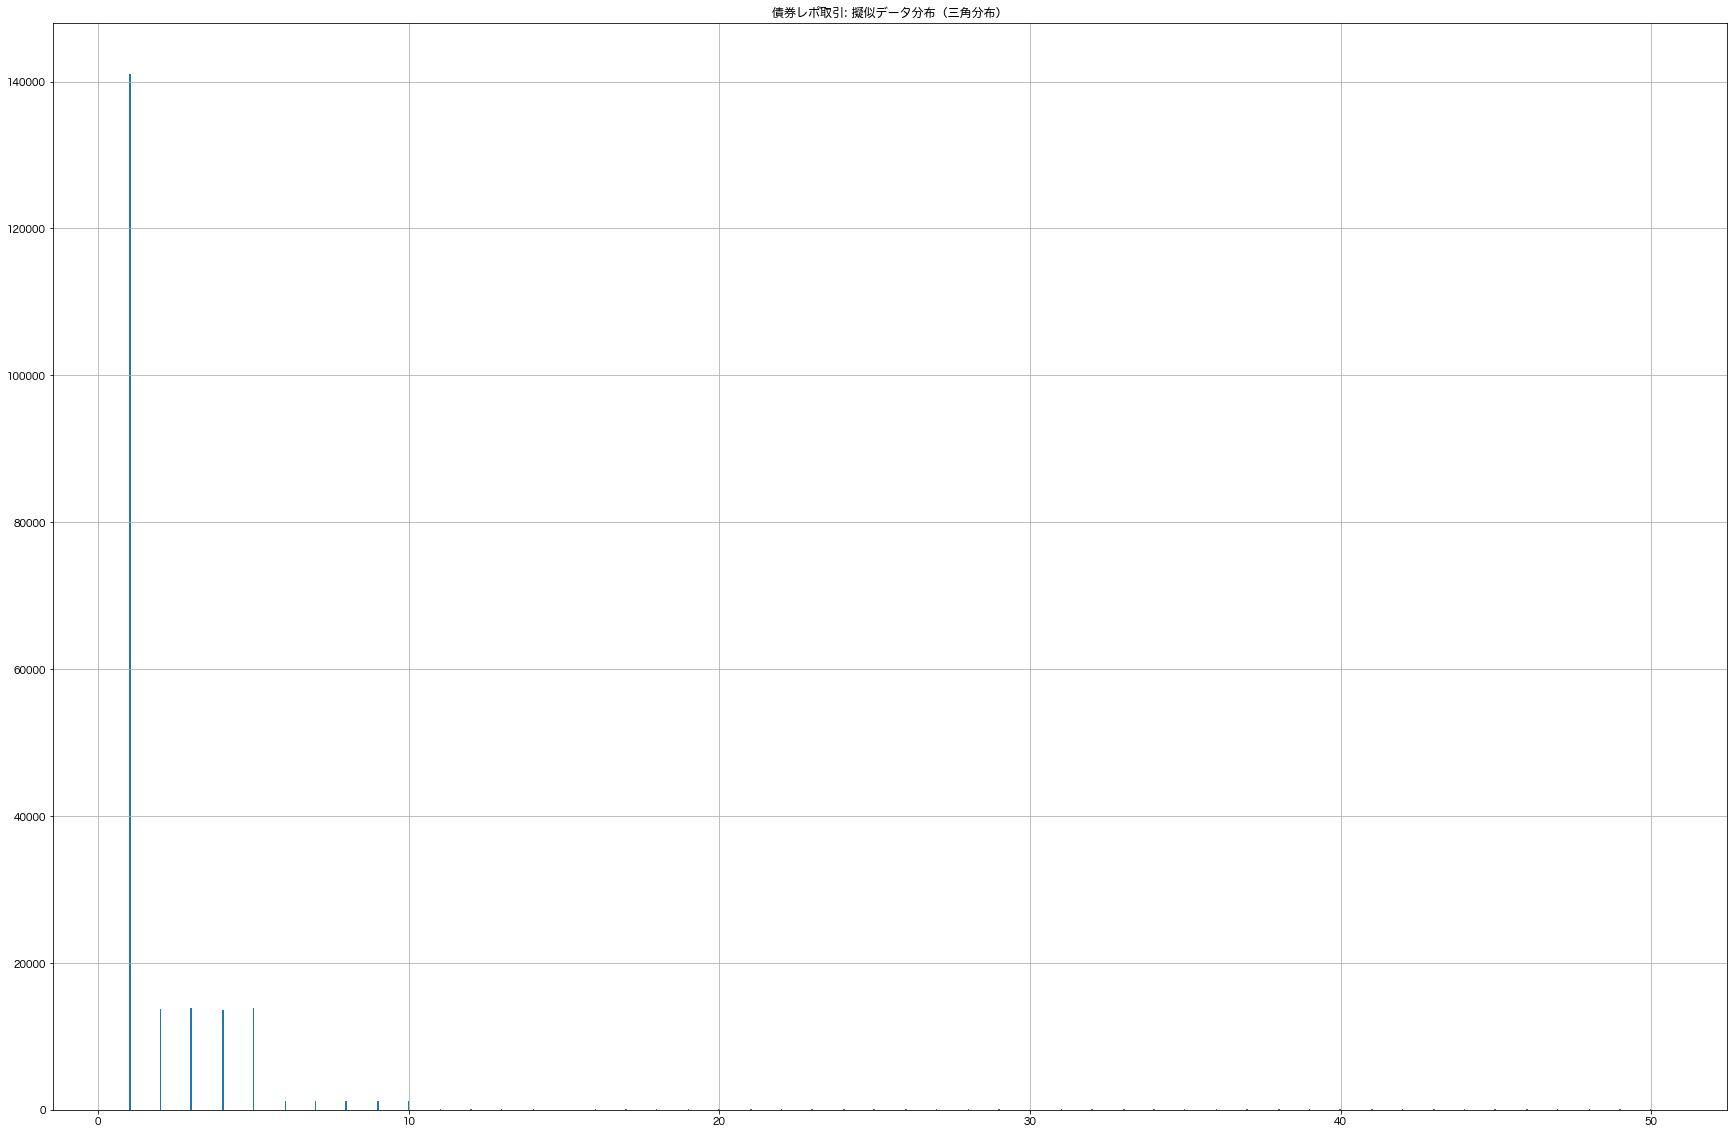

In [503]:
bond_security_num_dfs = []
for obj in trade_nums:
    _num = obj['bond']
    bond_security_num_dfs.append(get_bond_num_df(_num))
bond_security_num_dfs[0]

### 実験用CSV作成

#### 株レポ

##### createToken.csv

In [289]:
mock_gc_df = pd.DataFrame({'price': mock_gc_price_df[0], 'security_num': mock_gc_security_num_df[0]}, dtype=int)
mock_gc_df

,price,security_num
0,3305440700622336,20
1,1707084543796280,123
2,2857011356380073,125
3,5951300355394834,41
4,4908988188072279,73
...,...,...
7995,1298591344343924,115
7996,3502446189053312,8
7997,337791785654147,127
7998,7702685145472458,63


In [461]:
stock_token_num = 2800
bond_token_num = 356

print(eval(sample_create_token_df['tokenId'][0]))
hex(eval(sample_create_token_df['tokenId'][1]))

14534201717928672332366944080943963275581073313804200410876330409119688163329


'0x2022111013215200000000000000000000000000000000000000000000000002'

In [471]:
# tokenId
initial_stock_tokenId = 0x2022113016481000000000000000000000000000000000000000000000000001
stock_tokenId_list = [str(hex(initial_stock_tokenId + i)) for i in range(stock_token_num)]

initial_bond_tokenId = 0x2022120501041000000000000000000000000000000000000000000000000001
bond_tokenId_list = [str(hex(initial_bond_tokenId + i)) for i in range(bond_token_num)]

In [472]:
# tokenName
stock_tokenName_list = [f'ST{str(i).zfill(5)}' for i in range(stock_token_num)]
bond_tokenName_list = [f'ST{str(i).zfill(5)}' for i in range(stock_token_num, stock_token_num + bond_token_num)]

In [541]:
# others
tokenTypeId = sample_create_token_df['tokenTypeId'][0]
stock_tokenTypeId_list = [tokenTypeId] * stock_token_num
bond_tokenTypeId_list = [tokenTypeId] * bond_token_num
updateTime = sample_create_token_df['updateTime'][0]
stock_updateTime_list = [updateTime] * stock_token_num
bond_updateTime_list = [updateTime] * bond_token_num
token_price = 5.0e+7
stock_price_list = [token_price] * stock_token_num
bond_price_list = [token_price] * bond_token_num

In [542]:
stock_create_token_df = pd.DataFrame([stock_tokenId_list, stock_tokenName_list, stock_price_list, stock_tokenTypeId_list, stock_updateTime_list], index=sample_create_token_df.columns).T
stock_create_token_df

,tokenId,tokenName,price,tokenTypeId,updateTime
0,0x20221130164810000000000000000000000000000000...,ST00000,50000000.0,0x30783030303031000000000000000000000000000000...,1668054112
1,0x20221130164810000000000000000000000000000000...,ST00001,50000000.0,0x30783030303031000000000000000000000000000000...,1668054112
2,0x20221130164810000000000000000000000000000000...,ST00002,50000000.0,0x30783030303031000000000000000000000000000000...,1668054112
3,0x20221130164810000000000000000000000000000000...,ST00003,50000000.0,0x30783030303031000000000000000000000000000000...,1668054112
4,0x20221130164810000000000000000000000000000000...,ST00004,50000000.0,0x30783030303031000000000000000000000000000000...,1668054112
...,...,...,...,...,...
2795,0x20221130164810000000000000000000000000000000...,ST02795,50000000.0,0x30783030303031000000000000000000000000000000...,1668054112
2796,0x20221130164810000000000000000000000000000000...,ST02796,50000000.0,0x30783030303031000000000000000000000000000000...,1668054112
2797,0x20221130164810000000000000000000000000000000...,ST02797,50000000.0,0x30783030303031000000000000000000000000000000...,1668054112
2798,0x20221130164810000000000000000000000000000000...,ST02798,50000000.0,0x30783030303031000000000000000000000000000000...,1668054112


In [543]:
bond_create_token_df = pd.DataFrame([bond_tokenId_list, bond_tokenName_list, bond_price_list, bond_tokenTypeId_list, bond_updateTime_list], index=sample_create_token_df.columns).T
bond_create_token_df

,tokenId,tokenName,price,tokenTypeId,updateTime
0,0x20221205010410000000000000000000000000000000...,ST02800,50000000.0,0x30783030303031000000000000000000000000000000...,1668054112
1,0x20221205010410000000000000000000000000000000...,ST02801,50000000.0,0x30783030303031000000000000000000000000000000...,1668054112
2,0x20221205010410000000000000000000000000000000...,ST02802,50000000.0,0x30783030303031000000000000000000000000000000...,1668054112
3,0x20221205010410000000000000000000000000000000...,ST02803,50000000.0,0x30783030303031000000000000000000000000000000...,1668054112
4,0x20221205010410000000000000000000000000000000...,ST02804,50000000.0,0x30783030303031000000000000000000000000000000...,1668054112
...,...,...,...,...,...
351,0x20221205010410000000000000000000000000000000...,ST03151,50000000.0,0x30783030303031000000000000000000000000000000...,1668054112
352,0x20221205010410000000000000000000000000000000...,ST03152,50000000.0,0x30783030303031000000000000000000000000000000...,1668054112
353,0x20221205010410000000000000000000000000000000...,ST03153,50000000.0,0x30783030303031000000000000000000000000000000...,1668054112
354,0x20221205010410000000000000000000000000000000...,ST03154,50000000.0,0x30783030303031000000000000000000000000000000...,1668054112


In [567]:
# JCTの行も追加する
# jct_row = pd.DataFrame({'tokenId': jct_tokenId, 'tokenName': 'JCT00000', 'price': jct_price, 'tokenTypeId': sample_create_token_df['tokenTypeId'][0], 'updateTime': sample_create_token_df['updateTime'][0]}, index=[0])

# total_create_token_df = pd.concat([jct_row, stock_create_token_df, bond_create_token_df], ignore_index=True).reset_index(drop=True)
total_create_token_df = pd.concat([stock_create_token_df, bond_create_token_df], ignore_index=True)
total_create_token_df

,tokenId,tokenName,price,tokenTypeId,updateTime
0,0x20221130164810000000000000000000000000000000...,ST00000,50000000.0,0x30783030303031000000000000000000000000000000...,1668054112
1,0x20221130164810000000000000000000000000000000...,ST00001,50000000.0,0x30783030303031000000000000000000000000000000...,1668054112
2,0x20221130164810000000000000000000000000000000...,ST00002,50000000.0,0x30783030303031000000000000000000000000000000...,1668054112
3,0x20221130164810000000000000000000000000000000...,ST00003,50000000.0,0x30783030303031000000000000000000000000000000...,1668054112
4,0x20221130164810000000000000000000000000000000...,ST00004,50000000.0,0x30783030303031000000000000000000000000000000...,1668054112
...,...,...,...,...,...
3151,0x20221205010410000000000000000000000000000000...,ST03151,50000000.0,0x30783030303031000000000000000000000000000000...,1668054112
3152,0x20221205010410000000000000000000000000000000...,ST03152,50000000.0,0x30783030303031000000000000000000000000000000...,1668054112
3153,0x20221205010410000000000000000000000000000000...,ST03153,50000000.0,0x30783030303031000000000000000000000000000000...,1668054112
3154,0x20221205010410000000000000000000000000000000...,ST03154,50000000.0,0x30783030303031000000000000000000000000000000...,1668054112


In [615]:
total_create_token_df.to_csv(f'{data_relative_path}total_create_token.csv', index=False)

##### createTrade.csv

In [546]:
trade_nums

[{'gc': 438, 'sc': 2833, 'bond': 8667},
 {'gc': 1000, 'sc': 7500, 'bond': 25000},
 {'gc': 2500, 'sc': 20000, 'bond': 75000},
 {'gc': 6500, 'sc': 41000, 'bond': 204000}]

In [592]:
def get_trade_df(trade_num, initial_tradingId,  price_df, security_num_df, create_token_df):
    # tradingId
    tradingId_list = [str(hex(initial_tradingId + i)) for i in range(trade_num)]

    # lenderTokenIds, lenderTokenAmounts
    st_list = create_token_df['tokenId']
    lenderTokenIds_list = [list(st_list.sample(security_num)) for security_num in security_num_df[0]]
    lenderTokenAmounts_list = []
    lender_token_total_price_list = []
    for i in range(trade_num):
        each_num = int(math.ceil((price_df[0][i] / token_price ) / security_num_df[0][i]))
        lenderTokenAmounts_list.append([each_num] * security_num_df[0][i])
        lender_token_total_price_list.append(each_num * security_num_df[0][i] * token_price)
#     print("lender total", lender_token_total_price_list)
    # borrowerTokenAmounts
    borrowerTokenAmounts_list = [[math.ceil(lender_total_price / jct_price)] for lender_total_price in lender_token_total_price_list]
    
    # others
    lender_list = [sample_create_trading_df['lender'][0]] * trade_num
    borrowerTokenIds_list = [sample_create_trading_df['borrowerTokenIds'][0]] * trade_num
    startTime_list = [sample_create_trading_df['startTime'][0]] * trade_num
    finishTime_list = [sample_create_trading_df['finishTime'][0]] * trade_num
    rate_list = [sample_create_trading_df['rate'][0]] * trade_num
    adjustmentToken_list = [sample_create_trading_df['adjustmentToken'][0]] * trade_num
    return pd.DataFrame([tradingId_list, lender_list, borrowerTokenIds_list, lenderTokenIds_list, borrowerTokenAmounts_list, lenderTokenAmounts_list, startTime_list, finishTime_list, rate_list, adjustmentToken_list], index=sample_create_trading_df.columns).T

In [557]:
get_trade_df(trade_nums[0]['gc'], 0x2022113017525000000000000000000000000000000000000000000000000001, gc_price_dfs[0], gc_security_num_dfs[0], stock_create_token_df)

lender total [4047575950000000.0, 4668514500000000.0, 3789220500000000.0, 1655888000000000.0, 4295077500000000.0, 6943325650000000.0, 4273154500000000.0, 3088092550000000.0, 260088800000000.0, 7914632250000000.0, 4352270650000000.0, 7302579200000000.0, 1095060750000000.0, 1579296000000000.0, 767960000000000.0, 1885394400000000.0, 5183246500000000.0, 3404014000000000.0, 3477577100000000.0, 3919057800000000.0, 1871931400000000.0, 5786590200000000.0, 5581216550000000.0, 276541200000000.0, 1199496550000000.0, 3231309900000000.0, 4092514800000000.0, 5633140000000000.0, 7997529600000000.0, 2209488750000000.0, 1432668250000000.0, 3151632500000000.0, 3266221950000000.0, 1934940000000000.0, 524434300000000.0, 4291415700000000.0, 1817407900000000.0, 4066336950000000.0, 2231837300000000.0, 555417600000000.0, 6397864000000000.0, 1019258800000000.0, 1864649200000000.0, 2053625300000000.0, 3438670050000000.0, 3764958150000000.0, 6859563700000000.0, 7272012000000000.0, 1101978150000000.0, 54046152000

,tradingId,lender,borrowerTokenIds,lenderTokenIds,borrowerTokenAmounts,lenderTokenAmounts,startTime,finishTime,rate,adjustmentToken
0,0x20221130175250000000000000000000000000000000...,0x00000000000000000000000000000000000000000000...,['0x4a4354000000000000000000000000000000000000...,[0x2022113016481000000000000000000000000000000...,[40475759500],"[590887, 590887, 590887, 590887, 590887, 59088...",1668054340,1668057940,100,0x4a435400000000000000000000000000000000000000...
1,0x20221130175250000000000000000000000000000000...,0x00000000000000000000000000000000000000000000...,['0x4a4354000000000000000000000000000000000000...,[0x2022113016481000000000000000000000000000000...,[46685145000],"[1197055, 1197055, 1197055, 1197055, 1197055, ...",1668054340,1668057940,100,0x4a435400000000000000000000000000000000000000...
2,0x20221130175250000000000000000000000000000000...,0x00000000000000000000000000000000000000000000...,['0x4a4354000000000000000000000000000000000000...,[0x2022113016481000000000000000000000000000000...,[37892205000],"[2526147, 2526147, 2526147, 2526147, 2526147, ...",1668054340,1668057940,100,0x4a435400000000000000000000000000000000000000...
3,0x20221130175250000000000000000000000000000000...,0x00000000000000000000000000000000000000000000...,['0x4a4354000000000000000000000000000000000000...,[0x2022113016481000000000000000000000000000000...,[16558880000],"[1034930, 1034930, 1034930, 1034930, 1034930, ...",1668054340,1668057940,100,0x4a435400000000000000000000000000000000000000...
4,0x20221130175250000000000000000000000000000000...,0x00000000000000000000000000000000000000000000...,['0x4a4354000000000000000000000000000000000000...,[0x2022113016481000000000000000000000000000000...,[42950775000],"[1244950, 1244950, 1244950, 1244950, 1244950, ...",1668054340,1668057940,100,0x4a435400000000000000000000000000000000000000...
...,...,...,...,...,...,...,...,...,...,...
433,0x20221130175250000000000000000000000000000000...,0x00000000000000000000000000000000000000000000...,['0x4a4354000000000000000000000000000000000000...,[0x2022113016481000000000000000000000000000000...,[84787821000],"[911697, 911697, 911697, 911697, 911697, 91169...",1668054340,1668057940,100,0x4a435400000000000000000000000000000000000000...
434,0x20221130175250000000000000000000000000000000...,0x00000000000000000000000000000000000000000000...,['0x4a4354000000000000000000000000000000000000...,[0x2022113016481000000000000000000000000000000...,[82026900000],"[2278525, 2278525, 2278525, 2278525, 2278525, ...",1668054340,1668057940,100,0x4a435400000000000000000000000000000000000000...
435,0x20221130175250000000000000000000000000000000...,0x00000000000000000000000000000000000000000000...,['0x4a4354000000000000000000000000000000000000...,[0x2022113016481000000000000000000000000000000...,[16111317000],"[435441, 435441, 435441, 435441, 435441, 43544...",1668054340,1668057940,100,0x4a435400000000000000000000000000000000000000...
436,0x20221130175250000000000000000000000000000000...,0x00000000000000000000000000000000000000000000...,['0x4a4354000000000000000000000000000000000000...,[0x2022113016481000000000000000000000000000000...,[4534020000],"[125945, 125945, 125945, 125945, 125945, 12594...",1668054340,1668057940,100,0x4a435400000000000000000000000000000000000000...


In [552]:
# price, security_numのdfをtype毎にobjに格納
all_price_dfs = []
all_security_num_dfs = []
for i in range(len(trade_nums)):
    all_price_dfs.append({
        'gc': gc_price_dfs[i],
        'sc': sc_price_dfs[i],
        'bond': bond_price_dfs[i]
    })
    all_security_num_dfs.append({
        'gc': gc_security_num_dfs[i],
        'sc': sc_security_num_dfs[i],
        'bond': bond_security_num_dfs[i]
    })

In [616]:
# trade_num毎に各種create_trade_dfを作成し結合、csv形式で出力
initial_tradingIds = {
    'gc': 0x2022120717010000000000000000000000000000000000000000000000000001,
    'sc': 0x2022120717011000000000000000000000000000000000000000000000000001,
    'bond': 0x2022120717012000000000000000000000000000000000000000000000000001,
}

for index, obj in enumerate(trade_nums):
    print(index, ':', obj)
    file_name = ''
    create_trade_df_list = []
    for _type, _num in obj.items():
        _initial_tradingId = initial_tradingIds[_type]
        _create_token_df = stock_create_token_df if _type == 'gc' or _type == 'sc' else bond_create_token_df
        create_trade_df_list.append(get_trade_df(_num, _initial_tradingId, all_price_dfs[index][_type], all_security_num_dfs[index][_type], _create_token_df))
    pd.concat(create_trade_df_list, ignore_index=True).to_csv(f'{data_relative_path}create_trade_{index + 1}.csv', index=False)

0 : {'gc': 438, 'sc': 2833, 'bond': 8667}
1 : {'gc': 1000, 'sc': 7500, 'bond': 25000}
2 : {'gc': 2500, 'sc': 20000, 'bond': 75000}
3 : {'gc': 6500, 'sc': 41000, 'bond': 204000}


In [617]:
for obj in trade_nums:
    print(sum(obj.values()))

11938
33500
97500
251500


In [558]:
1911038 * 10 * 500

9555190000

In [ ]:
# tradingId
initial_tradingId = 0x2022113017525000000000000000000000000000000000000000000000000001
tradingId_list = [str(hex(initial_tradingId + i)) for i in range(gc_trade_num)]

# borrowerTokenAmounts
jct_tokenId = '0x4a43540000000000000000000000000000000000000000000000000000000000'
jct_price = 1.0
borrowerTokenAmounts_list = [[math.ceil(trade_price / jct_price)] for trade_price in mock_gc_price_df[0]]

# lenderTokenIds, lenderTokenAmounts
st_list = gc_create_token_df['tokenId']
lenderTokenIds_list = [list(st_list.sample(security_num)) for security_num in mock_gc_security_num_df[0]]
lenderTokenAmounts_list = []
for index, row in mock_gc_df.iterrows():
    each_num = int(math.ceil((row['price'] / price ) / row['security_num']))
    lenderTokenAmounts_list.append([each_num] * row['security_num'])

# others
lender_list = [sample_create_trading_df['lender'][0]] * gc_trade_num
borrowerTokenIds_list = [sample_create_trading_df['borrowerTokenIds'][0]] * gc_trade_num
# borrowerTokenAmounts_list = [sample_create_trading_df['borrowerTokenAmounts'][0]] * gc_trade_num
startTime_list = [sample_create_trading_df['startTime'][0]] * gc_trade_num
finishTime_list = [sample_create_trading_df['finishTime'][0]] * gc_trade_num
rate_list = [sample_create_trading_df['rate'][0]] * gc_trade_num
adjustmentToken_list = [sample_create_trading_df['adjustmentToken'][0]] * gc_trade_num

In [485]:
gc_create_trade_df = pd.DataFrame([tradingId_list, lender_list, borrowerTokenIds_list, lenderTokenIds_list, borrowerTokenAmounts_list, lenderTokenAmounts_list, startTime_list, finishTime_list, rate_list, adjustmentToken_list], index=sample_create_trading_df.columns).T
gc_create_trade_df

,tradingId,lender,borrowerTokenIds,lenderTokenIds,borrowerTokenAmounts,lenderTokenAmounts,startTime,finishTime,rate,adjustmentToken
0,0x20221130175250000000000000000000000000000000...,0x00000000000000000000000000000000000000000000...,['0x4a4354000000000000000000000000000000000000...,[0x2022113016481000000000000000000000000000000...,[6841855550531458],"[3305441, 3305441, 3305441, 3305441, 3305441, ...",1668054340,1668057940,100,0x4a435400000000000000000000000000000000000000...
1,0x20221130175250000000000000000000000000000000...,0x00000000000000000000000000000000000000000000...,['0x4a4354000000000000000000000000000000000000...,[0x2022113016481000000000000000000000000000000...,[1088318823542685],"[277575, 277575, 277575, 277575, 277575, 27757...",1668054340,1668057940,100,0x4a435400000000000000000000000000000000000000...
2,0x20221130175250000000000000000000000000000000...,0x00000000000000000000000000000000000000000000...,['0x4a4354000000000000000000000000000000000000...,[0x2022113016481000000000000000000000000000000...,[5303882909760499],"[457122, 457122, 457122, 457122, 457122, 45712...",1668054340,1668057940,100,0x4a435400000000000000000000000000000000000000...
3,0x20221130175250000000000000000000000000000000...,0x00000000000000000000000000000000000000000000...,['0x4a4354000000000000000000000000000000000000...,[0x2022113016481000000000000000000000000000000...,[4220204279986067],"[2903074, 2903074, 2903074, 2903074, 2903074, ...",1668054340,1668057940,100,0x4a435400000000000000000000000000000000000000...
4,0x20221130175250000000000000000000000000000000...,0x00000000000000000000000000000000000000000000...,['0x4a4354000000000000000000000000000000000000...,[0x2022113016481000000000000000000000000000000...,[2202103141042908],"[1344929, 1344929, 1344929, 1344929, 1344929, ...",1668054340,1668057940,100,0x4a435400000000000000000000000000000000000000...
...,...,...,...,...,...,...,...,...,...,...
7995,0x20221130175250000000000000000000000000000000...,0x00000000000000000000000000000000000000000000...,['0x4a4354000000000000000000000000000000000000...,[0x2022113016481000000000000000000000000000000...,[3220190214825367],"[225842, 225842, 225842, 225842, 225842, 22584...",1668054340,1668057940,100,0x4a435400000000000000000000000000000000000000...
7996,0x20221130175250000000000000000000000000000000...,0x00000000000000000000000000000000000000000000...,['0x4a4354000000000000000000000000000000000000...,[0x2022113016481000000000000000000000000000000...,[5861147684984174],"[8756116, 8756116, 8756116, 8756116, 8756116, ...",1668054340,1668057940,100,0x4a435400000000000000000000000000000000000000...
7997,0x20221130175250000000000000000000000000000000...,0x00000000000000000000000000000000000000000000...,['0x4a4354000000000000000000000000000000000000...,[0x2022113016481000000000000000000000000000000...,[3800840235764882],"[53196, 53196, 53196, 53196, 53196, 53196, 531...",1668054340,1668057940,100,0x4a435400000000000000000000000000000000000000...
7998,0x20221130175250000000000000000000000000000000...,0x00000000000000000000000000000000000000000000...,['0x4a4354000000000000000000000000000000000000...,[0x2022113016481000000000000000000000000000000...,[1516916194807341],"[2445297, 2445297, 2445297, 2445297, 2445297, ...",1668054340,1668057940,100,0x4a435400000000000000000000000000000000000000...


In [612]:
gc_create_trade_df.to_csv(f'{data_relative_path}gc_create_trade_8000.csv', index=False)

##### updateToken

In [569]:
sample_update_token_df

,tokenId,price,updateTime
0,0x20221110132152000000000000000000000000000000...,9000000,1668054263
1,0x20221110132152000000000000000000000000000000...,9000000,1668054263
2,0x20221110132152000000000000000000000000000000...,9000000,1668054263
3,0x20221110132152000000000000000000000000000000...,9000000,1668054263
4,0x20221110132152000000000000000000000000000000...,9000000,1668054263
...,...,...,...
351,0x20221110132152000000000000000000000000000000...,9000000,1668054263
352,0x20221110132152000000000000000000000000000000...,9000000,1668054263
353,0x20221110132152000000000000000000000000000000...,9000000,1668054263
354,0x20221110132152000000000000000000000000000000...,9000000,1668054263


In [582]:
total_update_token_df = total_create_token_df.copy()
total_update_token_df.drop(labels=['tokenName', 'tokenTypeId'], axis=1)

,tokenId,price,updateTime
0,0x20221130164810000000000000000000000000000000...,50000000.0,1668054112
1,0x20221130164810000000000000000000000000000000...,50000000.0,1668054112
2,0x20221130164810000000000000000000000000000000...,50000000.0,1668054112
3,0x20221130164810000000000000000000000000000000...,50000000.0,1668054112
4,0x20221130164810000000000000000000000000000000...,50000000.0,1668054112
...,...,...,...
3151,0x20221205010410000000000000000000000000000000...,50000000.0,1668054112
3152,0x20221205010410000000000000000000000000000000...,50000000.0,1668054112
3153,0x20221205010410000000000000000000000000000000...,50000000.0,1668054112
3154,0x20221205010410000000000000000000000000000000...,50000000.0,1668054112


In [578]:
# 日々の価格変化率をランダムで割り当てる
min_daily_change = -0.12
max_daily_change = 0.15
price_change_list = []
for i in range(stock_token_num + bond_token_num):
    price_change_list.append(1 + min_daily_change + np.random.rand() * (max_daily_change - min_daily_change))
price_change_list

[1.0004647974241971,
 1.0447232305488536,
 1.0816706749567955,
 1.0118257125638568,
 1.0853718867627749,
 1.044594523547851,
 1.1451443195476512,
 1.1326408298934871,
 0.9156853549813188,
 0.8844450514348952,
 0.9853537204518795,
 1.010381136767575,
 0.9271358584851765,
 1.1314058078181413,
 0.9850906107615868,
 0.9997436288385373,
 0.9382747695412352,
 0.957491792022991,
 0.985757231061997,
 0.8936977433991607,
 1.0265768921296945,
 1.0541843244428837,
 1.137659297724497,
 0.9339281154980873,
 0.88633559402022,
 1.1355801896408821,
 1.0006727672300513,
 1.0547436422198764,
 0.9932130646624229,
 1.0295206778313346,
 1.0061287384077768,
 1.1222640480754986,
 1.0590733684923759,
 1.1470041771410733,
 1.016825394963041,
 1.0343038347144904,
 1.0758371576773933,
 0.9231407659487335,
 1.1102728258587191,
 1.024020941405813,
 0.9917651564760893,
 1.1096049888068436,
 1.1359725772888856,
 1.1381712083767601,
 0.9997127573923754,
 1.0165592114933426,
 1.116737637866126,
 0.9268188985975846,
 1

In [588]:
new_price_list = total_update_token_df['price'] * price_change_list
total_update_token_df['price'] = new_price_list.astype('int')

In [589]:
total_update_token_df

,tokenId,tokenName,price,tokenTypeId,updateTime
0,0x20221130164810000000000000000000000000000000...,ST00000,50023239,0x30783030303031000000000000000000000000000000...,1668054112
1,0x20221130164810000000000000000000000000000000...,ST00001,52236161,0x30783030303031000000000000000000000000000000...,1668054112
2,0x20221130164810000000000000000000000000000000...,ST00002,54083533,0x30783030303031000000000000000000000000000000...,1668054112
3,0x20221130164810000000000000000000000000000000...,ST00003,50591285,0x30783030303031000000000000000000000000000000...,1668054112
4,0x20221130164810000000000000000000000000000000...,ST00004,54268594,0x30783030303031000000000000000000000000000000...,1668054112
...,...,...,...,...,...
3151,0x20221205010410000000000000000000000000000000...,ST03151,51391228,0x30783030303031000000000000000000000000000000...,1668054112
3152,0x20221205010410000000000000000000000000000000...,ST03152,50744059,0x30783030303031000000000000000000000000000000...,1668054112
3153,0x20221205010410000000000000000000000000000000...,ST03153,54969386,0x30783030303031000000000000000000000000000000...,1668054112
3154,0x20221205010410000000000000000000000000000000...,ST03154,46870719,0x30783030303031000000000000000000000000000000...,1668054112


In [613]:
total_update_token_df.to_csv(f'{data_relative_path}total_update_token.csv', index=False)

## 相談事項

- ### 分布


- ### 銘柄種類


- ### 取引種類の統合


- ### price, update

## その他